In [1]:
#import all required library
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
recipe = pd.read_csv('D:/IIITD/Mansi_Thesis_Research/Foodprint/Carbon_Footprint_July23/Data/RecipeCF/Cutoff10_Recipe_CF_Region_sm.csv')
mapped_cf = pd.read_csv('D:/IIITD/Mansi_Thesis_Research/Foodprint/Carbon_Footprint_July23/Data/Mapped/Recipedb_mapped_ing_CF_count.csv')

In [3]:
base_recipe = pd.read_csv('D:/IIITD/Mansi_Thesis_Research/Foodprint/Carbon_Footprint_July23/Data/RecipeDB_combined.csv')
base_recipe

ID                              title  \
0         2610               Egyptian Lentil Soup   
1         2611  Egyptian Green Beans with Carrots   
2         2612                     Egyptian Bamia   
3         2613        Magpie's Easy Falafel Cakes   
4         2614                             Dukkah   
...        ...                                ...   
118078  149187       Jerusalem Artichoke Stir Fry   
118079  149188           Asian Apple Pear Compote   
118080  149189             Skillet Sweet Potatoes   
118081  149190                Any-Flavour Cookies   
118082  149191        Fig Newton " Sarah - Bars "   

                                              ingredients  \
0       ['black pepper', 'cumin', 'garlic', 'sea salt'...   
1       ['green bean carrot', 'vegetable oil', 'bay le...   
2       ['okra', 'salt black pepper', 'lamb shoulder',...   
3       ['cornmeal', 'cumin', 'sauce', 'garlic', 'cori...   
4       ['black pepper', 'sea salt', 'cumin seed', 'co...   
...                                                   ...   
118078  ['yellow pepper', 'mushroom', 'garlic', 'jalap...   
118079  ['cardamom seed', 'asian pear', 'water', 'ging...   
118080  ['potato', 'pepper', 'vegetable stock', 'salt'...   
118081  ['baking powder', 'vanilla', 'flour', 'sugar',...   
118082  ['fig', 'sea salt', 'raisin', 'vanilla', 'wate...   

                                        ingredient_phrase       continent  \
0       ['3 cups water', '1 cup red lentils', '1 roma ...         African   
1       ['1 tablespoon vegetable oil', '1 large onion ...         African   
2       ['1/4 cup olive oil', '1 large onion , finely ...         African   
3       ['1/2 small onion , minced', '1 1/2 teaspoons ...         African   
4       ['2/3 cup hazelnuts', '1/2 cup sesame seeds', ...         African   
...                                                   ...             ...   
118078  ["1 cup jerusalem artichoke , peeled , cut int...  North American   
118079  ['4 cups Asian pears , peeled , cored and chop...  North American   
118080  ['2 teaspoons olive oil', '1 cup onion , thinl...  North American   
118081  ['1/3 cup margarine', '1/3 cup sugar', '1 teas...  North American   
118082  ['2 5/8 ounces raisins', '4 ounces chopped fig...  North American   

                region sub_region  \
0       Middle Eastern   Egyptian   
1       Middle Eastern   Egyptian   
2       Middle Eastern   Egyptian   
3       Middle Eastern   Egyptian   
4       Middle Eastern   Egyptian   
...                ...        ...   
118078        Canadian   Canadian   
118079        Canadian   Canadian   
118080        Canadian   Canadian   
118081        Canadian   Canadian   
118082        Canadian   Canadian   

                                             instructions  
0       ['Place 3 cups water, lentils, tomato, carrot,...  
1       ['Heat oil in a pot over medium heat.', 'Cook ...  
2       ['Heat olive oil in a large saucepan over medi...  
3       ['Cook the onions in 1 1/2 teaspoons of olive ...  
4       ['Preheat the oven to 350 degrees f. Place the...  
...                                                   ...  
118078  ['Spray skillet with oil, over medium heat sta...  
118079  ["Place all the ingredients in a saucepan and ...  
118080  ['Heat oil over medium heat in a nonstick skil...  
118081  ['Cream margarine and vanilla with sugar. Mix ...  
118082  ['In a bowl, combine raisins and figs. Cover w...  

[118083 rows x 8 columns]

In [4]:
import ast
import operator

count={}

recipes = base_recipe["ID"].nunique()

for i in range(recipes):
    r = base_recipe['ingredients'][i]
    res = ast.literal_eval(r)
    for k in res:
        count[k] = count.get(k,0) + 1
sorted_d = dict(sorted(count.items(), key=operator.itemgetter(1),reverse=True))
sorted_d

{'salt': 45206,
 'onion': 34548,
 'butter': 27013,
 'garlic clove': 24893,
 'water': 24773,
 'olive oil': 22391,
 'egg': 21861,
 'sugar': 20271,
 'tomato': 16625,
 'black pepper': 15973,
 'garlic': 15436,
 'milk': 14585,
 'pepper': 12304,
 'salt pepper': 10387,
 'flour': 9837,
 'parsley': 9718,
 'cinnamon': 9624,
 'lemon juice': 9509,
 'carrot': 9087,
 'purpose flour': 9023,
 'vegetable oil': 9018,
 'cumin': 8992,
 'cream': 8580,
 'ginger': 8408,
 'cilantro': 8261,
 'parmesan cheese': 7789,
 'soy sauce': 7727,
 'beef': 7674,
 'oregano': 7380,
 'potato': 7264,
 'green onion': 7074,
 'brown sugar': 6919,
 'oil': 6245,
 'basil': 5916,
 'chicken broth': 5913,
 'lemon': 5493,
 'lime juice': 5478,
 'chicken breast': 5396,
 'extra virgin olive oil': 5307,
 'baking powder': 5181,
 'mushroom': 5142,
 'paprika': 5054,
 'bay leaf': 4986,
 'chili powder': 4858,
 'garlic powder': 4766,
 'thyme': 4667,
 'celery': 4608,
 'white sugar': 4562,
 'red onion': 4545,
 'cheddar cheese': 4498,
 'cornstarch':

In [5]:
ava_count={}

recipes = recipe["Recipe ID"].nunique()

for i in range(recipes):
    ava = recipe['Available Ingredients'][i]
    res = ast.literal_eval(ava)
    for k in res:
        ava_count[k] = ava_count.get(k,0) + 1
ava_sorted_d = dict(sorted(ava_count.items(), key=operator.itemgetter(1),reverse=True))

# TOP X Ingredient Overlap with High CF

In [6]:
import pandas as pd

top_ava_ingredients = list(ava_sorted_d.keys())
top_ingredients = list(sorted_d.keys())

all_subset_sizes = list(range(100, 20280, 100)) 
counts_of_common_ingredients = []

# Find CF of all ingredients in the mapped_cf DataFrame and store in a dictionary
ingredient_cf_dict = {ingredient: cf_value for ingredient, cf_value in zip(mapped_cf['RecipeDB Ingredient'], mapped_cf['CF'])}

# Lists to store data for the DataFrame
top_x_values = []
common_ingredients_counts = []
cf_greater_than_4_counts = []

for size in all_subset_sizes:
    common_ingredients = set(top_ava_ingredients[:size]).intersection(top_ingredients[:size])
    counts_of_common_ingredients.append(len(common_ingredients))

    # Count the number of common ingredients with CF > 4
    count_common_ingredients_cf_greater_than_4 = 0
    for ingredient in common_ingredients:
        cf_value = ingredient_cf_dict.get(ingredient, 0)
        if cf_value > 4:
            count_common_ingredients_cf_greater_than_4 += 1

    top_x_values.append(size)
    common_ingredients_counts.append(len(common_ingredients))
    cf_greater_than_4_counts.append(count_common_ingredients_cf_greater_than_4)

data = {
    'Top X Ingredients': top_x_values,
    'Ingredients Mapped': common_ingredients_counts,
    'Ingredients with High CF': cf_greater_than_4_counts
}

df_result = pd.DataFrame(data)

df_result
df_result['Percentage of High CF Ingredients'] = (df_result['Ingredients with High CF']/df_result['Ingredients Mapped'])*100
df_result


Top X Ingredients  Ingredients Mapped  Ingredients with High CF  \
0                  100                  71                        14   
1                  200                 135                        22   
2                  300                 185                        27   
3                  400                 250                        41   
4                  500                 302                        53   
..                 ...                 ...                       ...   
197              19800                7570                      1920   
198              19900                7607                      1927   
199              20000                7640                      1936   
200              20100                7679                      1941   
201              20200                7722                      1949   

     Percentage of High CF Ingredients  
0                            19.718310  
1                            16.296296  
2                            14.594595  
3                            16.400000  
4                            17.549669  
..                                 ...  
197                          25.363276  
198                          25.331931  
199                          25.340314  
200                          25.276729  
201                          25.239575  

[202 rows x 4 columns]

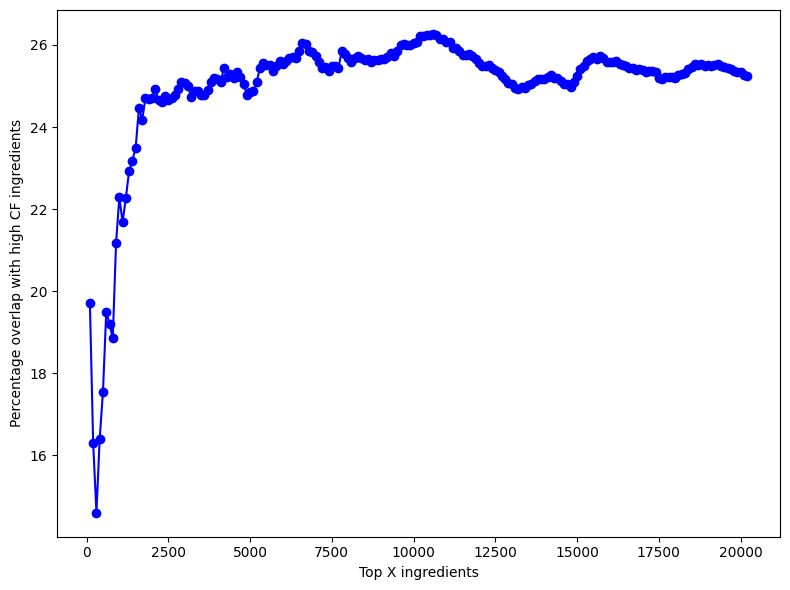

In [7]:
# Plot the percentage of ingredients mapped
plt.figure(figsize=(8, 6))
plt.plot(df_result['Top X Ingredients'], df_result['Percentage of High CF Ingredients'], marker='o', color='blue')
plt.xlabel('Top X ingredients')
plt.ylabel('Percentage overlap with high CF ingredients')
plt.tight_layout()

plt.show()

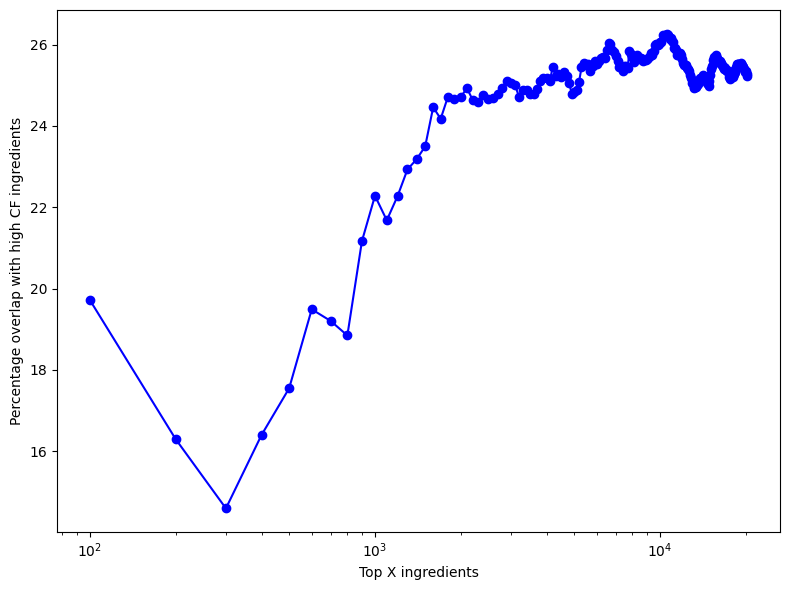

In [8]:
# Plot the percentage of ingredients mapped
plt.figure(figsize=(8, 6))
plt.plot(df_result['Top X Ingredients'], df_result['Percentage of High CF Ingredients'], marker='o', color='blue')
plt.xlabel('Top X ingredients')
plt.xscale('log')
plt.ylabel('Percentage overlap with high CF ingredients')
plt.tight_layout()

plt.show()

# TOP X Ingredient with High CF Region wise

In [9]:
import ast
import operator

count_by_region = {}

recipes = base_recipe["ID"].nunique()

for i in range(recipes):
    r = base_recipe['ingredients'][i]
    region = base_recipe['region'][i]  # Get the region for the current recipe
    res = ast.literal_eval(r)
    for k in res:
        count_by_region[region] = count_by_region.get(region, {})
        count_by_region[region][k] = count_by_region[region].get(k, 0) + 1

# Sort the dictionary by count in descending order for each region
sorted_d_by_region = {region: dict(sorted(ing_count.items(), key=operator.itemgetter(1), reverse=True)) 
                      for region, ing_count in count_by_region.items()}

sorted_d_by_region


{'Middle Eastern': {'salt': 1903,
  'onion': 1357,
  'olive oil': 1291,
  'water': 1254,
  'garlic clove': 1113,
  'lemon juice': 873,
  'tomato': 753,
  'cumin': 739,
  'black pepper': 704,
  'butter': 658,
  'parsley': 656,
  'cinnamon': 637,
  'sugar': 602,
  'garlic': 533,
  'egg': 516,
  'pepper': 511,
  'lemon': 510,
  'mint': 405,
  'salt pepper': 384,
  'coriander': 328,
  'extra virgin olive oil': 306,
  'turmeric': 296,
  'paprika': 281,
  'tahini': 269,
  'vegetable oil': 263,
  'milk': 254,
  'cilantro': 253,
  'almond': 251,
  'chickpea': 246,
  'tomato paste': 242,
  'oil': 237,
  'carrot': 229,
  'allspice': 228,
  'lamb': 226,
  'cucumber': 221,
  'flour': 209,
  'honey': 204,
  'beef': 200,
  'potato': 194,
  'cayenne pepper': 188,
  'yogurt': 187,
  'pine nut': 185,
  'sea salt': 184,
  'walnut': 183,
  'cardamom': 180,
  'plain yogurt': 180,
  'green onion': 175,
  'eggplant': 175,
  'salt black pepper': 165,
  'clove': 164,
  'rice': 164,
  'garbanzo bean': 163,
  '

In [10]:
# Convert the dictionary into a DataFrame
df_by_region = pd.DataFrame([(region, list(ing_count.keys()), list(ing_count.values())) 
                             for region, ing_count in sorted_d_by_region.items()], 
                            columns=['Region', 'Ingredients', 'Frequencies'])

# Add a new column to the DataFrame that contains the count of ingredients for each region
df_by_region['Ingredient Count'] = df_by_region['Ingredients'].apply(len)

df_by_region = df_by_region.sort_values('Ingredient Count', ascending=False) 

In [11]:
import ast
import operator

ava_count_by_region = {}
ava_sorted_d_by_region = {}

recipes = recipe["Recipe ID"].nunique()

for i in range(recipes):
    r = recipe['Available Ingredients'][i]
    region = recipe['region'][i]  # Get the region for the current recipe
    res = ast.literal_eval(r)
    for k in res:
        ava_count_by_region[region] = ava_count_by_region.get(region, {})
        ava_count_by_region[region][k] = ava_count_by_region[region].get(k, 0) + 1

# Sort the dictionary by count in descending order for each region
ava_sorted_d_by_region = {region: dict(sorted(ing_count.items(), key=operator.itemgetter(1), reverse=True)) 
                      for region, ing_count in ava_count_by_region.items()}

# ava_sorted_d_by_region


In [12]:
# Convert the dictionary into a DataFrame
ava_df_by_region = pd.DataFrame([(region, list(ing_count.keys()), list(ing_count.values())) 
                             for region, ing_count in ava_sorted_d_by_region.items()], 
                            columns=['Region', 'Ingredients', 'Frequencies'])

# Add a new column to the DataFrame that contains the count of ingredients for each region
ava_df_by_region['Ingredient Count'] = ava_df_by_region['Ingredients'].apply(len)

ava_df_by_region

Region                                        Ingredients  \
0           Middle Eastern  [onion, olive oil, water, garlic clove, lemon ...   
1              Rest Africa  [onion, water, garlic clove, olive oil, butter...   
2          Northern Africa  [olive oil, cumin, garlic clove, cinnamon, oni...   
3    Chinese and Mongolian  [soy sauce, water, ginger, garlic clove, sugar...   
4                     Thai  [fish sauce, garlic clove, coconut milk, soy s...   
5          Southeast Asian  [water, garlic clove, sugar, soy sauce, onion,...   
6      Indian Subcontinent  [onion, water, ginger, turmeric, tomato, garli...   
7                   Korean  [soy sauce, sesame oil, green onion, sesame se...   
8                 Japanese  [soy sauce, sugar, water, ginger, mirin, egg, ...   
9               Australian  [butter, egg, milk, olive oil, onion, garlic c...   
10                 Mexican  [onion, tomato, cumin, garlic clove, cream, wa...   
11               Caribbean  [onion, garlic clove, water, lime juice, olive...   
12          South American  [onion, beef, garlic clove, water, pepper, tom...   
13        Eastern European  [onion, butter, egg, water, cream, sugar, flou...   
14            Scandinavian  [butter, sugar, egg, milk, flour, water, purpo...   
15                      UK  [butter, egg, milk, sugar, onion, water, flour...   
16                 Belgian  [butter, egg, sugar, milk, flour, onion, water...   
17            Deutschland   [butter, egg, onion, sugar, flour, water, milk...   
18                   Greek  [olive oil, feta cheese, garlic clove, onion, ...   
19                  French  [butter, egg, sugar, milk, onion, olive oil, g...   
20  Spanish and Portuguese  [olive oil, onion, garlic clove, tomato, water...   
21                 Italian  [olive oil, parmesan cheese, garlic clove, oni...   
22                   Irish  [butter, onion, egg, sugar, milk, water, potat...   
23                      US  [butter, onion, egg, purpose flour, water, gar...   
24                Canadian  [butter, egg, onion, sugar, milk, water, peppe...   
25        Central American  [onion, butter, sugar, water, garlic clove, eg...   

                                          Frequencies  Ingredient Count  
0   [1357, 1291, 1254, 1113, 873, 753, 739, 658, 6...              1026  
1   [1052, 814, 753, 603, 553, 541, 506, 503, 422,...               994  
2   [859, 757, 664, 656, 634, 408, 376, 360, 345, ...               646  
3   [2820, 1872, 1645, 1520, 1464, 1458, 1338, 128...              1302  
4   [957, 825, 818, 772, 759, 679, 625, 590, 520, ...               816  
5   [690, 685, 654, 569, 544, 491, 474, 405, 360, ...               808  
6   [2884, 1981, 1794, 1554, 1519, 1440, 1190, 116...              1301  
7   [444, 328, 286, 265, 253, 251, 242, 203, 186, ...               398  
8   [1016, 610, 539, 448, 367, 339, 339, 317, 312,...               802  
9   [1720, 1344, 1000, 994, 965, 954, 853, 766, 63...              1585  
10  [5031, 3525, 3400, 3133, 2693, 2447, 2234, 215...              2085  
11  [889, 765, 684, 628, 619, 498, 461, 421, 383, ...              1087  
12  [3528, 2148, 2036, 1796, 1496, 1292, 1199, 118...              1520  
13  [1014, 951, 779, 705, 641, 608, 568, 442, 368,...               869  
14  [1383, 1261, 1081, 752, 728, 641, 513, 464, 39...               914  
15  [2115, 1218, 1034, 997, 850, 653, 618, 591, 42...              1346  
16  [567, 391, 332, 302, 267, 250, 196, 191, 180, ...               621  
17  [1756, 1474, 1345, 1293, 1008, 987, 952, 720, ...              1221  
18  [1955, 1410, 1238, 1076, 1042, 907, 809, 794, ...              1082  
19  [2821, 2054, 1626, 1492, 1176, 1114, 1018, 997...              1606  
20  [1164, 1040, 1037, 671, 592, 514, 430, 419, 40...               980  
21  [6162, 5248, 4909, 4707, 3484, 3456, 3127, 309...              2383  
22  [976, 609, 595, 552, 499, 410, 397, 324, 314, ...              1020  
23  [1505, 1342, 1216, 1131, 1085, 1085, 797, 636,...   

In [13]:
ava_df_by_region = ava_df_by_region.sort_values('Ingredient Count', ascending=False)

In [14]:
import pandas as pd

# Create empty lists to store top ingredients and top available ingredients for each region
top_ingredients_per_region = []
top_ava_ingredients_per_region = []

for i in df_by_region['Region']:
    # Find the index of the region in the DataFrame
    region_index = df_by_region[df_by_region['Region'] == i].index[0]

    # Get the top ingredients for the region
    top_ingredients = df_by_region['Ingredients'][region_index]

    # Get the top available ingredients for the region
    top_ava_ingredients = ava_df_by_region['Ingredients'][region_index]

    top_ingredients_per_region.append(top_ingredients)
    top_ava_ingredients_per_region.append(top_ava_ingredients)

all_subset_sizes = list(range(100, 20280, 100))  # Generate list from 100 to 20000 with a step of 100

# Create empty lists to store data for the DataFrame
region_list = []
top_x_values = []
common_ingredients_counts = []
cf_greater_than_4_counts = []

# Find CF of all ingredients in the mapped_cf DataFrame and store in a dictionary
ingredient_cf_dict = {ingredient: cf_value for ingredient, cf_value in zip(mapped_cf['RecipeDB Ingredient'], mapped_cf['CF'])}

# Loop over all regions
for region, top_ingredients, top_ava_ingredients in zip(df_by_region['Region'], top_ingredients_per_region, top_ava_ingredients_per_region):
    # Loop over all subset sizes
    for size in all_subset_sizes:
        common_ingredients = set(top_ingredients[:size]).intersection(set(top_ava_ingredients[:size]))
        common_ingredients_counts.append(len(common_ingredients))

        # Count the number of common ingredients with CF > 4
        count_common_ingredients_cf_greater_than_4 = 0
        for ingredient in common_ingredients:
            cf_value = ingredient_cf_dict.get(ingredient, 0)
            if cf_value > 4:
                count_common_ingredients_cf_greater_than_4 += 1

        region_list.append(region)
        top_x_values.append(size)
        cf_greater_than_4_counts.append(count_common_ingredients_cf_greater_than_4)

data = {
    'Region': region_list,
    'Top X Ingredients': top_x_values,
    'Ingredients Mapped': common_ingredients_counts,
    'Ingredients with High CF': cf_greater_than_4_counts
}

region_df_result = pd.DataFrame(data)

# Calculate the percentage of ingredients with high CF for each top X size
region_df_result['Percentage of High CF Ingredients'] = (region_df_result['Ingredients with High CF'] / region_df_result['Ingredients Mapped']) * 100

region_df_result


Region  Top X Ingredients  Ingredients Mapped  \
0     Italian                100                  69   
1     Italian                200                 135   
2     Italian                300                 188   
3     Italian                400                 240   
4     Italian                500                 304   
...       ...                ...                 ...   
5247   Korean              19800                 398   
5248   Korean              19900                 398   
5249   Korean              20000                 398   
5250   Korean              20100                 398   
5251   Korean              20200                 398   

      Ingredients with High CF  Percentage of High CF Ingredients  
0                           15                          21.739130  
1                           31                          22.962963  
2                           42                          22.340426  
3                           52                          21.666667  
4                           69                          22.697368  
...                        ...                                ...  
5247                        79                          19.849246  
5248                        79                          19.849246  
5249                        79                          19.849246  
5250                        79                          19.849246  
5251                        79                          19.849246  

[5252 rows x 5 columns]

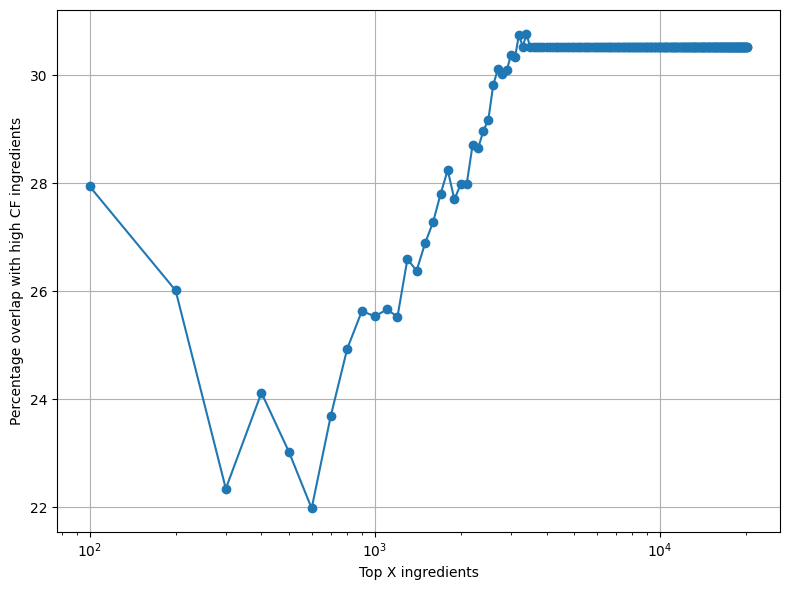

In [15]:
# Filter the data for the South American region
south_america_df = region_df_result[region_df_result['Region'] == 'South American']

# Plot the data for the South American region
plt.figure(figsize=(8, 6))
plt.plot(south_america_df['Top X Ingredients'], south_america_df['Percentage of High CF Ingredients'], marker='o')
plt.xlabel('Top X ingredients')
plt.ylabel('Percentage overlap with high CF ingredients')
plt.grid(True)
plt.xscale('log')
plt.tight_layout()
plt.show()

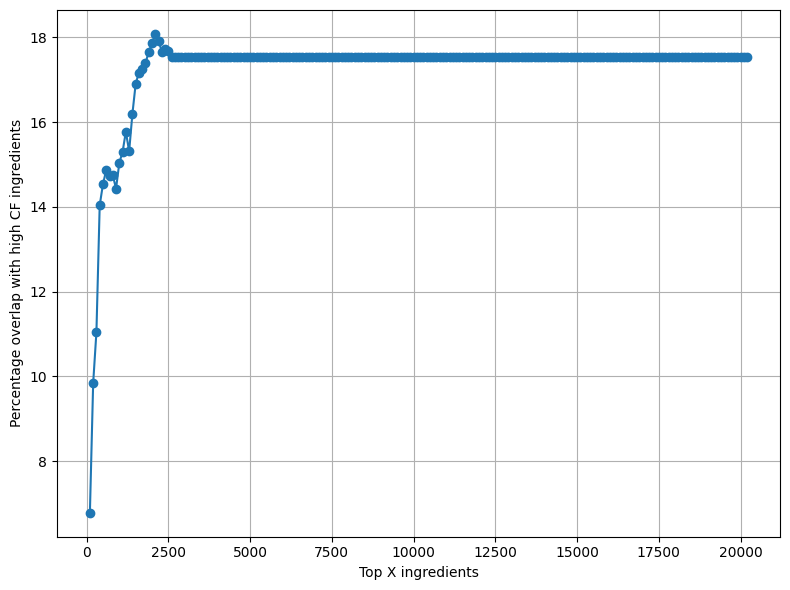

In [16]:
# Filter the data for the Indian region
indian_df = region_df_result[region_df_result['Region'] == 'Indian Subcontinent']

# Plot the data for the South American region
plt.figure(figsize=(8, 6))
plt.plot(indian_df['Top X Ingredients'], indian_df['Percentage of High CF Ingredients'], marker='o')
plt.xlabel('Top X ingredients')
plt.ylabel('Percentage overlap with high CF ingredients')
plt.grid(True)
plt.tight_layout()
plt.show()

# Combined plot of world and region

In [17]:
df_result.insert(0, 'Region', 'World')

In [18]:
world_region_df = pd.concat([df_result, region_df_result], ignore_index=True)
world_region_df

Region  Top X Ingredients  Ingredients Mapped  Ingredients with High CF  \
0      World                100                  71                        14   
1      World                200                 135                        22   
2      World                300                 185                        27   
3      World                400                 250                        41   
4      World                500                 302                        53   
...      ...                ...                 ...                       ...   
5449  Korean              19800                 398                        79   
5450  Korean              19900                 398                        79   
5451  Korean              20000                 398                        79   
5452  Korean              20100                 398                        79   
5453  Korean              20200                 398                        79   

      Percentage of High CF Ingredients  
0                             19.718310  
1                             16.296296  
2                             14.594595  
3                             16.400000  
4                             17.549669  
...                                 ...  
5449                          19.849246  
5450                          19.849246  
5451                          19.849246  
5452                          19.849246  
5453                          19.849246  

[5454 rows x 5 columns]

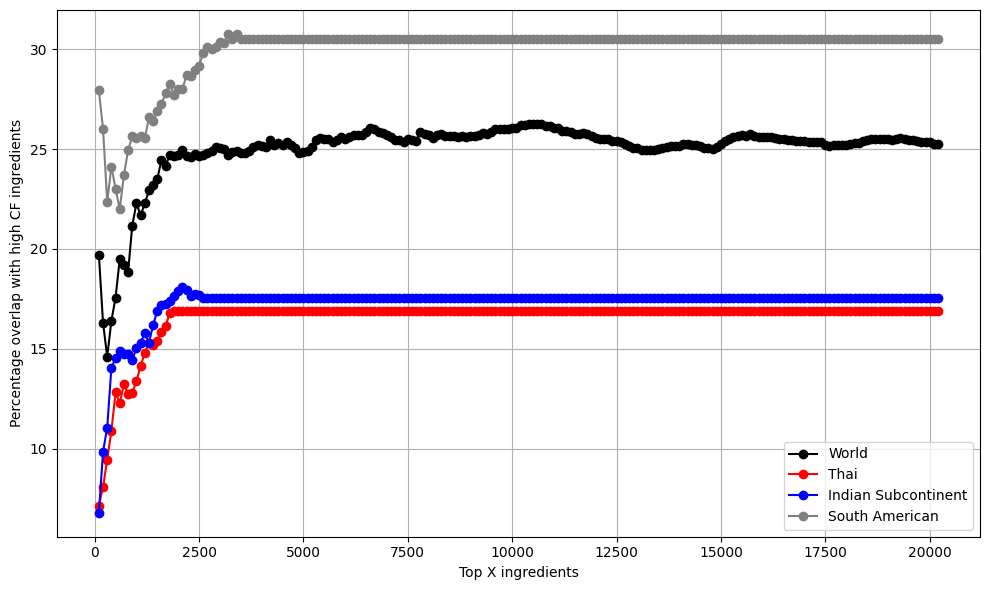

In [19]:
# Get unique regions
regions = ['World', 'Thai', 'Indian Subcontinent', 'South American']

# sort based on ing count of region
colors = ['black', 'red', 'blue', 'grey']

# Create the plot
plt.figure(figsize=(10, 6))

# Plot the data for each region
for region, color in zip(regions, colors):
    region_df = world_region_df[world_region_df['Region'] == region]
    plt.plot(region_df['Top X Ingredients'], region_df['Percentage of High CF Ingredients'], marker='o', color=color, label=region)

# Set plot labels and grid
plt.xlabel('Top X ingredients')
plt.ylabel('Percentage overlap with high CF ingredients')
plt.grid(True)
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()

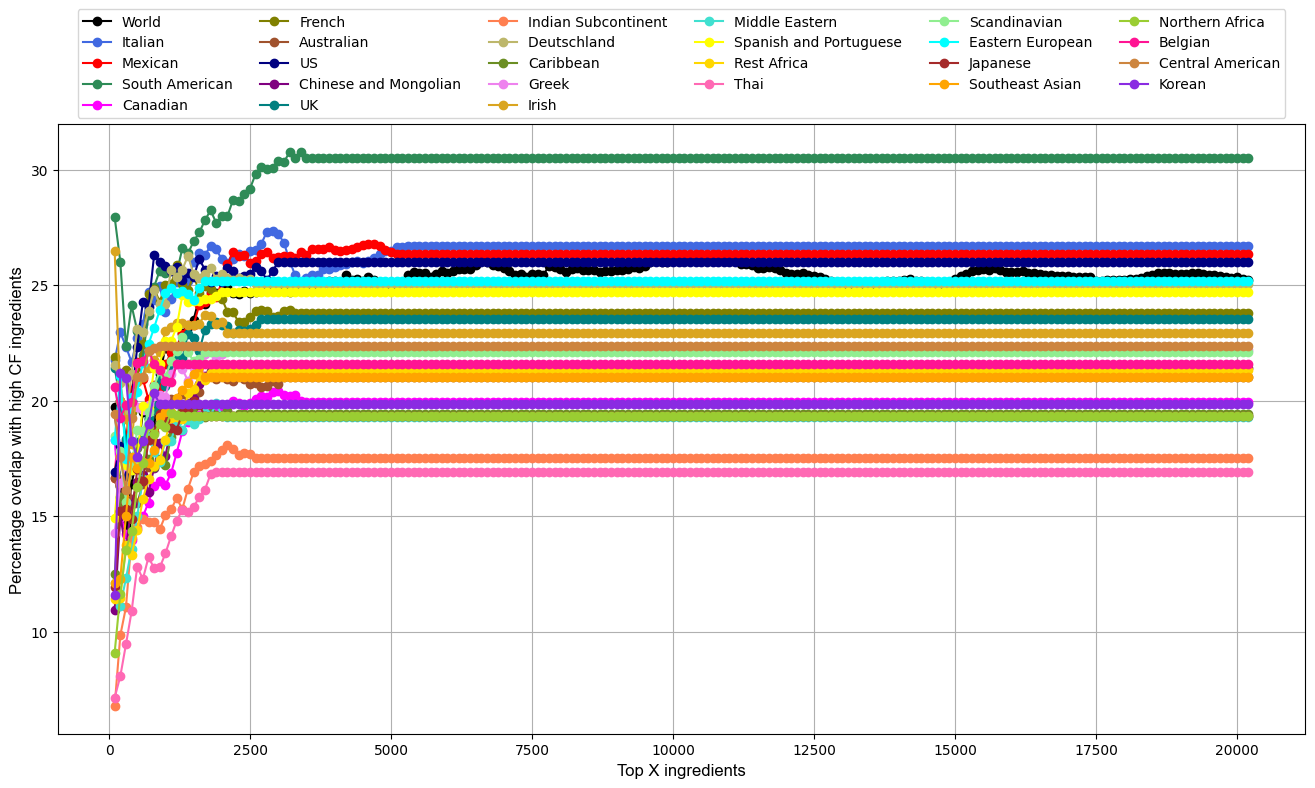

In [20]:
# Get unique regions
regions = world_region_df['Region'].unique()

# sort based on ing count of region
colors = ['black', 'royalblue', 'red', 'seagreen', 'magenta', 'olive', 'sienna', 'navy', 'purple', 'teal', 'coral',
          'darkkhaki', 'olivedrab', 'violet', 'goldenrod', 'turquoise', 'yellow', 'gold', 'hotpink', 'lightgreen',
          'aqua', 'brown', 'orange', 'yellowgreen', 'deeppink', 'peru', 'blueviolet']

# Create the plot
plt.figure(figsize=(14,8))

# Plot the data for each region
for region, color in zip(regions, colors):
    region_df = world_region_df[world_region_df['Region'] == region]
    plt.plot(region_df['Top X Ingredients'], region_df['Percentage of High CF Ingredients'], marker='o', color=color, label=region)

# Set plot labels and grid
plt.xlabel('Top X ingredients', fontsize=12, fontname="Arial")
plt.ylabel('Percentage overlap with high CF ingredients', fontsize=12, fontname="Arial")
plt.grid(True)
plt.legend(loc='upper center', bbox_to_anchor=(0.5,1.2), ncol=6,fontsize=10)
plt.tight_layout()

# Show the plot
plt.show()

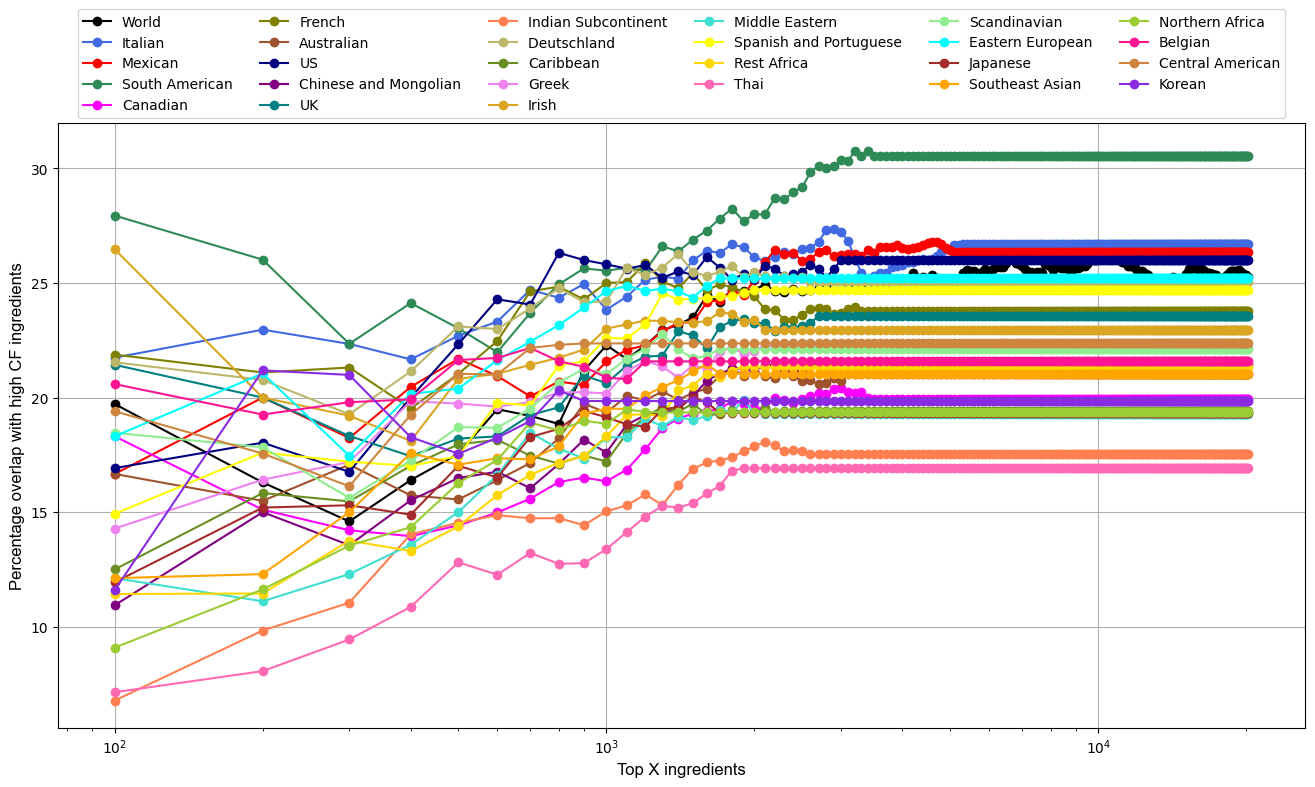

In [21]:
# Get unique regions
regions = world_region_df['Region'].unique()

# sort based on ing count of region
colors = ['black', 'royalblue', 'red', 'seagreen', 'magenta', 'olive', 'sienna', 'navy', 'purple', 'teal', 'coral',
          'darkkhaki', 'olivedrab', 'violet', 'goldenrod', 'turquoise', 'yellow', 'gold', 'hotpink', 'lightgreen',
          'aqua', 'brown', 'orange', 'yellowgreen', 'deeppink', 'peru', 'blueviolet']

# sort based on median cf of each region

# Create the plot
plt.figure(figsize=(14,8))

# Plot the data for each region
for region, color in zip(regions, colors):
    region_df = world_region_df[world_region_df['Region'] == region]
    plt.plot(region_df['Top X Ingredients'], region_df['Percentage of High CF Ingredients'], marker='o', color=color, label=region)

# Set plot labels and grid
plt.xlabel('Top X ingredients', fontsize=12, fontname="Arial")
plt.ylabel('Percentage overlap with high CF ingredients', fontsize=12, fontname="Arial")
plt.grid(True)
plt.xscale('log')
plt.legend(loc='upper center', bbox_to_anchor=(0.5,1.2), ncol=6,fontsize=10)
plt.tight_layout()

plt.savefig("D:/IIITD/Mansi_Thesis_Research/Foodprint/Carbon_Footprint_July23/Plots/Ingredient_analysis/Percentage_TopX_ing_Highcf_region.jpeg", bbox_inches= 'tight', dpi=300)

plt.show()

# Recipes having Ingredients with High CF values

In [22]:
input_file = recipe
input_file

Recipe ID                                  ingredient_phrase  \
0            2610  ['3 cups water', '1 cup red lentils', '1 roma ...   
1            2611  ['1 tablespoon vegetable oil', '1 large onion ...   
2            2612  ['1/4 cup olive oil', '1 large onion , finely ...   
3            2613  ['1/2 small onion , minced', '1 1/2 teaspoons ...   
4            2614  ['2/3 cup hazelnuts', '1/2 cup sesame seeds', ...   
...           ...                                                ...   
117727     149187  ["1 cup jerusalem artichoke , peeled , cut int...   
117728     149188  ['4 cups Asian pears , peeled , cored and chop...   
117729     149189  ['2 teaspoons olive oil', '1 cup onion , thinl...   
117730     149190  ['1/3 cup margarine', '1/3 cup sugar', '1 teas...   
117731     149191  ['2 5/8 ounces raisins', '4 ounces chopped fig...   

             continent          region sub_region  \
0              African  Middle Eastern   Egyptian   
1              African  Middle Eastern   Egyptian   
2              African  Middle Eastern   Egyptian   
3              African  Middle Eastern   Egyptian   
4              African  Middle Eastern   Egyptian   
...                ...             ...        ...   
117727  North American        Canadian   Canadian   
117728  North American        Canadian   Canadian   
117729  North American        Canadian   Canadian   
117730  North American        Canadian   Canadian   
117731  North American        Canadian   Canadian   

                                             instructions  \
0       ['Place 3 cups water, lentils, tomato, carrot,...   
1       ['Heat oil in a pot over medium heat.', 'Cook ...   
2       ['Heat olive oil in a large saucepan over medi...   
3       ['Cook the onions in 1 1/2 teaspoons of olive ...   
4       ['Preheat the oven to 350 degrees f. Place the...   
...                                                   ...   
117727  ['Spray skillet with oil, over medium heat sta...   
117728  ["Place all the ingredients in a saucepan and ...   
117729  ['Heat oil over medium heat in a nonstick skil...   
117730  ['Cream margarine and vanilla with sugar. Mix ...   
117731  ['In a bowl, combine raisins and figs. Cover w...   

                              Recipe Name  \
0                    Egyptian Lentil Soup   
1       Egyptian Green Beans with Carrots   
2                          Egyptian Bamia   
3             Magpie's Easy Falafel Cakes   
4                                  Dukkah   
...                                   ...   
117727       Jerusalem Artichoke Stir Fry   
117728           Asian Apple Pear Compote   
117729             Skillet Sweet Potatoes   
117730                Any-Flavour Cookies   
117731        Fig Newton " Sarah - Bars "   

                                        Recipe Ingredient  Total Ingredient  \
0       ['black pepper', 'cumin', 'garlic', 'sea salt'...                10   
1       ['green bean carrot', 'vegetable oil', 'bay le...                 9   
2       ['okra', 'salt black pepper', 'lamb shoulder',...                 7   
3       ['cornmeal', 'cumin', 'sauce', 'garlic', 'cori...                10   
4       ['black pepper', 'sea salt', 'cumin seed', 'co...                 6   
...                                                   ...               ...   
117727  ['yellow pepper', 'mushroom', 'garlic', 'jalap...                10   
117728  ['cardamom seed', 'asian pear', 'water', 'ging...                 4   
117729  ['potato', 'pepper', 'vegetable stock', 'salt'...                 6   
117730  ['baking powder', 'vanilla', 'flour', 'sugar',...                 7   
117731  ['fig', 'sea salt', 'raisin', 'vanilla', 'wate...                 8   

                                    Available Ingredients  Available Count  \
0       ['cumin', 'garlic', 'carrot', 'coriander', 're...                8   
1       ['green bean carrot', 'vegetable oil', 'garlic...                6   
2       ['okra', 'lamb shoulder', 'tomato sauce',

In [23]:
# Create a dictionary to map ingredients to their carbon footprints
ingredient_dict = dict(zip(mapped_cf['RecipeDB Ingredient'].str.lower(), mapped_cf['CF']))

# Create an empty list to store the carbon footprints of available ingredients for each recipe
recipe_cf_list = []

for i in input_file['Recipe ID']:
    # Get the available ingredients for the current recipe
    ingredients = [x.strip(" '[]") for x in input_file[input_file['Recipe ID'] == i]['Available Ingredients'].values[0].split(",")]

    # Map the ingredients to their carbon footprints using the dictionary
    carbon_footprints = []
    for ing in ingredients:
        if ing.lower() in ingredient_dict:
            carbon_footprints.append(ingredient_dict[ing.lower()])
        else:
            carbon_footprints.append(0)

    # Append the list of carbon footprints for the current recipe to the recipe_cf_list
    recipe_cf_list.append(carbon_footprints)

input_file['Carbon Footprints'] = recipe_cf_list

input_file


Recipe ID                                  ingredient_phrase  \
0            2610  ['3 cups water', '1 cup red lentils', '1 roma ...   
1            2611  ['1 tablespoon vegetable oil', '1 large onion ...   
2            2612  ['1/4 cup olive oil', '1 large onion , finely ...   
3            2613  ['1/2 small onion , minced', '1 1/2 teaspoons ...   
4            2614  ['2/3 cup hazelnuts', '1/2 cup sesame seeds', ...   
...           ...                                                ...   
117727     149187  ["1 cup jerusalem artichoke , peeled , cut int...   
117728     149188  ['4 cups Asian pears , peeled , cored and chop...   
117729     149189  ['2 teaspoons olive oil', '1 cup onion , thinl...   
117730     149190  ['1/3 cup margarine', '1/3 cup sugar', '1 teas...   
117731     149191  ['2 5/8 ounces raisins', '4 ounces chopped fig...   

             continent          region sub_region  \
0              African  Middle Eastern   Egyptian   
1              African  Middle Eastern   Egyptian   
2              African  Middle Eastern   Egyptian   
3              African  Middle Eastern   Egyptian   
4              African  Middle Eastern   Egyptian   
...                ...             ...        ...   
117727  North American        Canadian   Canadian   
117728  North American        Canadian   Canadian   
117729  North American        Canadian   Canadian   
117730  North American        Canadian   Canadian   
117731  North American        Canadian   Canadian   

                                             instructions  \
0       ['Place 3 cups water, lentils, tomato, carrot,...   
1       ['Heat oil in a pot over medium heat.', 'Cook ...   
2       ['Heat olive oil in a large saucepan over medi...   
3       ['Cook the onions in 1 1/2 teaspoons of olive ...   
4       ['Preheat the oven to 350 degrees f. Place the...   
...                                                   ...   
117727  ['Spray skillet with oil, over medium heat sta...   
117728  ["Place all the ingredients in a saucepan and ...   
117729  ['Heat oil over medium heat in a nonstick skil...   
117730  ['Cream margarine and vanilla with sugar. Mix ...   
117731  ['In a bowl, combine raisins and figs. Cover w...   

                              Recipe Name  \
0                    Egyptian Lentil Soup   
1       Egyptian Green Beans with Carrots   
2                          Egyptian Bamia   
3             Magpie's Easy Falafel Cakes   
4                                  Dukkah   
...                                   ...   
117727       Jerusalem Artichoke Stir Fry   
117728           Asian Apple Pear Compote   
117729             Skillet Sweet Potatoes   
117730                Any-Flavour Cookies   
117731        Fig Newton " Sarah - Bars "   

                                        Recipe Ingredient  Total Ingredient  \
0       ['black pepper', 'cumin', 'garlic', 'sea salt'...                10   
1       ['green bean carrot', 'vegetable oil', 'bay le...                 9   
2       ['okra', 'salt black pepper', 'lamb shoulder',...                 7   
3       ['cornmeal', 'cumin', 'sauce', 'garlic', 'cori...                10   
4       ['black pepper', 'sea salt', 'cumin seed', 'co...                 6   
...                                                   ...               ...   
117727  ['yellow pepper', 'mushroom', 'garlic', 'jalap...                10   
117728  ['cardamom seed', 'asian pear', 'water', 'ging...                 4   
117729  ['potato', 'pepper', 'vegetable stock', 'salt'...                 6   
117730  ['baking powder', 'vanilla', 'flour', 'sugar',...                 7   
117731  ['fig', 'sea salt', 'raisin', 'vanilla', 'wate...                 8   

                                    Available Ingredients  Available Count  \
0       ['cumin', 'garlic', 'carrot', 'coriander', 're...                8   
1       ['green bean carrot', 'vegetable oil', 'garlic...                6   
2       ['okra', 'lamb shoulder', 'tomato sauce',

**CF>4**

In [24]:
input_file['High CF'] = [sum(cf > 4 for cf in cf_list) for cf_list in input_file['Carbon Footprints']]
input_file ['Percentage of High CF'] = (input_file['High CF']/input_file['Available Count'])*100
input_file

Recipe ID                                  ingredient_phrase  \
0            2610  ['3 cups water', '1 cup red lentils', '1 roma ...   
1            2611  ['1 tablespoon vegetable oil', '1 large onion ...   
2            2612  ['1/4 cup olive oil', '1 large onion , finely ...   
3            2613  ['1/2 small onion , minced', '1 1/2 teaspoons ...   
4            2614  ['2/3 cup hazelnuts', '1/2 cup sesame seeds', ...   
...           ...                                                ...   
117727     149187  ["1 cup jerusalem artichoke , peeled , cut int...   
117728     149188  ['4 cups Asian pears , peeled , cored and chop...   
117729     149189  ['2 teaspoons olive oil', '1 cup onion , thinl...   
117730     149190  ['1/3 cup margarine', '1/3 cup sugar', '1 teas...   
117731     149191  ['2 5/8 ounces raisins', '4 ounces chopped fig...   

             continent          region sub_region  \
0              African  Middle Eastern   Egyptian   
1              African  Middle Eastern   Egyptian   
2              African  Middle Eastern   Egyptian   
3              African  Middle Eastern   Egyptian   
4              African  Middle Eastern   Egyptian   
...                ...             ...        ...   
117727  North American        Canadian   Canadian   
117728  North American        Canadian   Canadian   
117729  North American        Canadian   Canadian   
117730  North American        Canadian   Canadian   
117731  North American        Canadian   Canadian   

                                             instructions  \
0       ['Place 3 cups water, lentils, tomato, carrot,...   
1       ['Heat oil in a pot over medium heat.', 'Cook ...   
2       ['Heat olive oil in a large saucepan over medi...   
3       ['Cook the onions in 1 1/2 teaspoons of olive ...   
4       ['Preheat the oven to 350 degrees f. Place the...   
...                                                   ...   
117727  ['Spray skillet with oil, over medium heat sta...   
117728  ["Place all the ingredients in a saucepan and ...   
117729  ['Heat oil over medium heat in a nonstick skil...   
117730  ['Cream margarine and vanilla with sugar. Mix ...   
117731  ['In a bowl, combine raisins and figs. Cover w...   

                              Recipe Name  \
0                    Egyptian Lentil Soup   
1       Egyptian Green Beans with Carrots   
2                          Egyptian Bamia   
3             Magpie's Easy Falafel Cakes   
4                                  Dukkah   
...                                   ...   
117727       Jerusalem Artichoke Stir Fry   
117728           Asian Apple Pear Compote   
117729             Skillet Sweet Potatoes   
117730                Any-Flavour Cookies   
117731        Fig Newton " Sarah - Bars "   

                                        Recipe Ingredient  Total Ingredient  \
0       ['black pepper', 'cumin', 'garlic', 'sea salt'...                10   
1       ['green bean carrot', 'vegetable oil', 'bay le...                 9   
2       ['okra', 'salt black pepper', 'lamb shoulder',...                 7   
3       ['cornmeal', 'cumin', 'sauce', 'garlic', 'cori...                10   
4       ['black pepper', 'sea salt', 'cumin seed', 'co...                 6   
...                                                   ...               ...   
117727  ['yellow pepper', 'mushroom', 'garlic', 'jalap...                10   
117728  ['cardamom seed', 'asian pear', 'water', 'ging...                 4   
117729  ['potato', 'pepper', 'vegetable stock', 'salt'...                 6   
117730  ['baking powder', 'vanilla', 'flour', 'sugar',...                 7   
117731  ['fig', 'sea salt', 'raisin', 'vanilla', 'wate...                 8   

                                    Available Ingredients  Available Count  \
0       ['cumin', 'garlic', 'carrot', 'coriander', 're...                8   
1       ['green bean carrot', 'vegetable oil', 'garlic...                6   
2       ['okra', 'lamb shoulder', 'tomato sauce',

In [25]:
input_file['Percentage of High CF'].mean()

19.95277901663674

In [26]:
input_file['Percentage of High CF'].std()

19.18425670432129

In [27]:
import pandas as pd

world_highcf = pd.DataFrame()

# Add data to the DataFrame for the 'World' region
world_highcf['region'] = ['World']
world_highcf['Percentage of High CF'] = [list(input_file['Percentage of High CF'])]
world_highcf['Recipe Count'] = len(input_file['Percentage of High CF'])
world_highcf['Count of High CF'] = [list(input_file['High CF'])]

# Calculate the mean and standard deviation of the percentage of high CF for the 'World' region
world_highcf['Mean'] = input_file['Percentage of High CF'].mean()
world_highcf['Std'] = input_file['Percentage of High CF'].std()
world_highcf['Median'] = input_file['Percentage of High CF'].median()

world_highcf


region                              Percentage of High CF  Recipe Count  \
0  World  [0.0, 0.0, 33.33333333333333, 12.5, 0.0, 20.0,...        117732   

                                    Count of High CF       Mean        Std  \
0  [0, 0, 2, 1, 0, 1, 1, 1, 0, 1, 2, 0, 2, 1, 0, ...  19.952779  19.184257   

      Median  
0  16.666667

**Region wise percentage of recipes**

In [79]:
region_highcf = input_file.groupby('region')['Percentage of High CF'].agg(list).reset_index()
region_highcf['Recipe Count'] = region_highcf['Percentage of High CF'].apply(len)

region_highcf['Count of High CF'] = input_file.groupby('region')['High CF'].agg(list).reset_index()['High CF']

# Calculate the mean and standard deviation of the percentage of high CF for each region
region_highcf['Mean'] = region_highcf['Percentage of High CF'].apply(lambda x: sum(x) / len(x))
region_highcf['Std'] = region_highcf['Percentage of High CF'].apply(lambda x: pd.Series(x).std())
region_highcf['Median'] = region_highcf['Percentage of High CF'].apply(np.median)

region_highcf = region_highcf.sort_values('Recipe Count', ascending=False)
region_highcf

region                              Percentage of High CF  \
12                 Italian  [25.0, 6.666666666666667, 0.0, 12.5, 33.333333...   
15                 Mexican  [33.33333333333333, 0.0, 20.0, 12.5, 60.0, 0.0...   
20          South American  [25.0, 42.857142857142854, 66.66666666666666, ...   
2                 Canadian  [14.285714285714285, 0.0, 0.0, 12.5, 20.0, 25....   
10     Indian Subcontinent  [11.11111111111111, 0.0, 0.0, 22.2222222222222...   
8                   French  [40.0, 40.0, 57.14285714285714, 44.44444444444...   
5    Chinese and Mongolian  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 16.6666666...   
0               Australian  [33.33333333333333, 25.0, 10.0, 14.28571428571...   
25                      US  [25.0, 100.0, 16.666666666666664, 33.333333333...   
24                      UK  [50.0, 50.0, 50.0, 50.0, 14.285714285714285, 5...   
6             Deutschland   [30.0, 33.33333333333333, 42.857142857142854, ...   
9                    Greek  [0.0, 11.11111111111111, 11.11111111111111, 14...   
16          Middle Eastern  [0.0, 0.0, 33.33333333333333, 12.5, 0.0, 20.0,...   
3                Caribbean  [11.11111111111111, 0.0, 0.0, 0.0, 0.0, 9.0909...   
22  Spanish and Portuguese  [0.0, 16.666666666666664, 0.0, 25.0, 20.0, 25....   
19            Scandinavian  [0.0, 33.33333333333333, 57.14285714285714, 12...   
18             Rest Africa  [12.5, 25.0, 0.0, 0.0, 0.0, 0.0, 0.0, 25.0, 0....   
23                    Thai  [11.11111111111111, 0.0, 0.0, 0.0, 0.0, 11.111...   
11                   Irish  [50.0, 33.33333333333333, 15.384615384615385, ...   
7         Eastern European  [0.0, 16.666666666666664, 33.33333333333333, 0...   
13                Japanese  [33.33333333333333, 33.33333333333333, 0.0, 0....   
21         Southeast Asian  [36.36363636363637, 0.0, 10.0, 20.0, 28.571428...   
17         Northern Africa  [6.25, 0.0, 16.666666666666664, 0.0, 0.0, 6.66...   
1                  Belgian  [28.57142857142857, 22.22222222222222, 40.0, 2...   
14                  Korean  [13.333333333333334, 0.0, 16.666666666666664, ...   
4         Central American  [0.0, 50.0, 0.0, 0.0, 0.0, 16.666666666666664,...   

    Recipe Count                                   Count of High CF  \
12         16546  [2, 1, 0, 1, 1, 0, 1, 2, 1, 1, 2, 1, 0, 1, 4, ...   
15         14394  [1, 0, 1, 1, 3, 0, 3, 1, 0, 0, 2, 0, 0, 2, 1, ...   
20          7152  [1, 3, 2, 1, 0, 1, 1, 1, 1, 2, 0, 2, 0, 0, 0, ...   
2           6668  [1, 0, 0, 1, 1, 1, 1, 0, 1, 3, 4, 2, 0, 1, 3, ...   
10          6453  [1, 0, 0, 2, 2, 1, 0, 2, 2, 0, 1, 0, 2, 0, 0, ...   
8           6344  [2, 2, 4, 4, 2, 2, 2, 2, 3, 3, 2, 4, 0, 2, 2, ...   
5           5882  [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, ...   
0           5799  [1, 1, 1, 1, 1, 5, 1, 2, 2, 0, 1, 2, 1, 0, 0, ...   
25          4994  [1, 2, 1, 1, 0, 0, 2, 0, 1, 0, 3, 2, 2, 0, 0, ...   
24          4375  [1, 1, 1, 2, 1, 4, 1, 1, 2, 2, 1, 1, 1, 2, 4, ...   
6           4303  [3, 2, 3, 2, 2, 2, 2, 2, 4, 3, 2, 3, 0, 1, 0, ...   
9           4177  [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, ...   
16          3896  [0, 0, 2, 1, 0, 1, 1, 1, 0, 1, 2, 0, 2, 1, 0, ...   
3           3011  [1, 0, 0, 0, 0, 1, 1, 1, 1, 4, 4, 1, 0, 2, 0, ...   
22          2838  [0, 1, 0, 2, 1, 1, 1, 1, 0, 1, 0, 2, 3, 0, 1, ...   
19          2805  [0, 1, 4, 1, 3, 2, 3, 0, 1, 3, 2, 2, 3, 2, 2, ...   
18          2737  [1, 2, 0, 0, 0, 0, 0, 1, 0, 1, 0, 2, 1, 1, 1, ...   
23          2600  [1, 0, 0, 0, 0, 1, 1, 2, 1, 2, 0, 0, 0, 1, 1, ...   
11          2501  [3, 3, 2, 1, 4, 1, 1, 3, 1, 3, 0, 1, 2, 1, 2, ...   
7           2492  [0, 1, 2, 0, 0, 0, 0, 1, 3, 1, 0, 0, 0, 2, 1, ...   
13          2038  [2, 3, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 1, 1, ...   
21          1939  [4, 0, 1, 2, 2, 1, 2, 1, 4, 1, 0, 0, 2, 1, 2, ...   
17          1609  [1, 0, 2, 0, 0, 1, 0, 0, 2, 1, 0, 1, 2, 4, 0, ...   
1           1058  [2, 2, 2, 1, 3, 0, 2, 0, 2, 2, 3, 2, 2, 5, 0, ...   
14           668  [2, 0, 1, 2, 0, 1, 1, 0, 1, 1, 1, 1, 1,

In [80]:
region_highcf_sort = region_highcf.sort_values('Median', ascending=False)

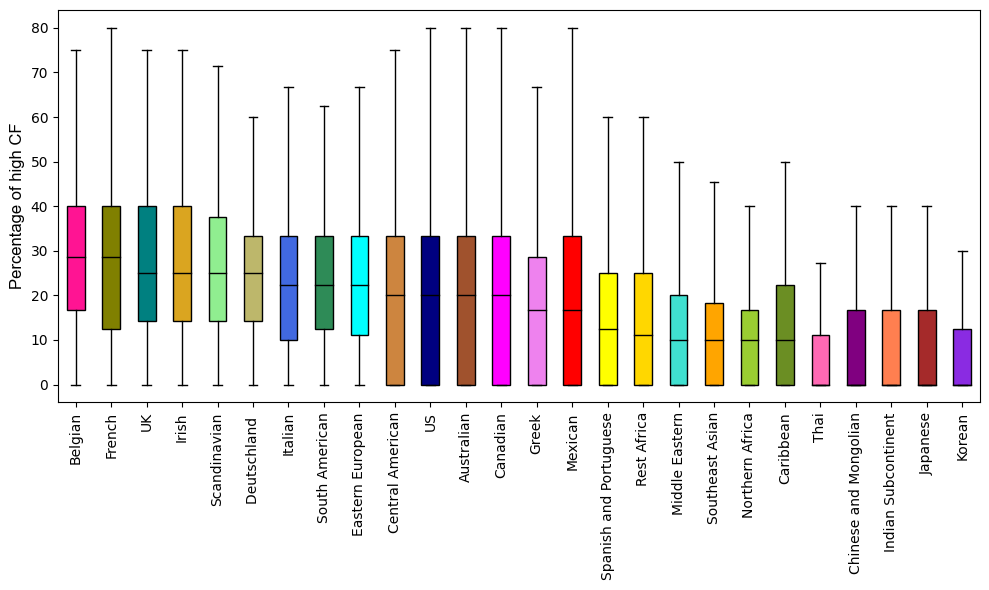

In [81]:
# # sort based on mean of region
# colors = ['deeppink', 'olive', 'goldenrod', 'teal', 'lightgreen', 'darkkhaki', 'seagreen', 'royalblue', 'navy', 'aqua', 
#           'magenta','sienna', 'peru', 'red', 'violet', 'gold', 'yellow', 'olivedrab', 'turquoise', 'orange', 'yellowgreen',  
#           'coral', 'brown', 'purple', 'blueviolet', 'hotpink']

# sort based on median cf of region
colors = ['deeppink', 'olive', 'teal', 'goldenrod', 'lightgreen', 'darkkhaki', 'royalblue','seagreen', 'aqua', 
          'peru', 'navy', 'sienna', 'magenta', 'violet', 'red', 'yellow', 'gold', 'turquoise', 'orange', 'yellowgreen',
            'olivedrab', 'hotpink', 'purple', 'coral', 'brown', 'blueviolet']

# Create the boxplot
plt.figure(figsize=(10,6))
bp = plt.boxplot(region_highcf_sort['Percentage of High CF'], 
                 labels=region_highcf_sort['region'], 
                 patch_artist=True,  # fill with color
                 boxprops=dict(facecolor='none', edgecolor='black'),  # box properties
                 whiskerprops=dict(color='black'),  # whisker properties
                 showfliers=False,  # remove outliers
                 medianprops=dict(color='black', linewidth=1),  # median properties
                 meanprops=dict(color='black', marker='o', markeredgecolor='black', markersize=5), # mean properties
                 capprops=dict(color='black'))  # cap properties

# Fill each box with a different color
for i, box in enumerate(bp['boxes']):
    box.set(facecolor=colors[i])

plt.ylabel("Percentage of high CF", fontsize=12, fontname="Arial")
plt.xticks(fontsize=10, rotation=90)
plt.yticks(fontsize=10)
plt.tight_layout()

# plt.savefig("D:/IIITD/Mansi_Thesis_Research/Foodprint/Carbon_Footprint_July23/Plots/Region/Percent_HighCF.png", bbox_inches= 'tight', dpi=300)

plt.show()


If the bottom edge of the box (lower line) is missing or seems to start from 0, it means that the first quartile (Q1) is at 0. This could happen if a significant number of data points in that region have a value of 0 or close to 0 for the percentage of high CF.

This indicates that a substantial portion of the data points in that region has a low percentage of high CF, possibly even 0%. The box plot visually conveys that the distribution of the percentage of high CF for that region is skewed towards lower values.

In [82]:
world_region_high_cf = pd.concat([world_highcf, region_highcf_sort])
world_region_high_cf 

region                              Percentage of High CF  \
0                    World  [0.0, 0.0, 33.33333333333333, 12.5, 0.0, 20.0,...   
1                  Belgian  [28.57142857142857, 22.22222222222222, 40.0, 2...   
8                   French  [40.0, 40.0, 57.14285714285714, 44.44444444444...   
24                      UK  [50.0, 50.0, 50.0, 50.0, 14.285714285714285, 5...   
11                   Irish  [50.0, 33.33333333333333, 15.384615384615385, ...   
19            Scandinavian  [0.0, 33.33333333333333, 57.14285714285714, 12...   
6             Deutschland   [30.0, 33.33333333333333, 42.857142857142854, ...   
12                 Italian  [25.0, 6.666666666666667, 0.0, 12.5, 33.333333...   
20          South American  [25.0, 42.857142857142854, 66.66666666666666, ...   
7         Eastern European  [0.0, 16.666666666666664, 33.33333333333333, 0...   
4         Central American  [0.0, 50.0, 0.0, 0.0, 0.0, 16.666666666666664,...   
25                      US  [25.0, 100.0, 16.666666666666664, 33.333333333...   
0               Australian  [33.33333333333333, 25.0, 10.0, 14.28571428571...   
2                 Canadian  [14.285714285714285, 0.0, 0.0, 12.5, 20.0, 25....   
9                    Greek  [0.0, 11.11111111111111, 11.11111111111111, 14...   
15                 Mexican  [33.33333333333333, 0.0, 20.0, 12.5, 60.0, 0.0...   
22  Spanish and Portuguese  [0.0, 16.666666666666664, 0.0, 25.0, 20.0, 25....   
18             Rest Africa  [12.5, 25.0, 0.0, 0.0, 0.0, 0.0, 0.0, 25.0, 0....   
16          Middle Eastern  [0.0, 0.0, 33.33333333333333, 12.5, 0.0, 20.0,...   
21         Southeast Asian  [36.36363636363637, 0.0, 10.0, 20.0, 28.571428...   
17         Northern Africa  [6.25, 0.0, 16.666666666666664, 0.0, 0.0, 6.66...   
3                Caribbean  [11.11111111111111, 0.0, 0.0, 0.0, 0.0, 9.0909...   
23                    Thai  [11.11111111111111, 0.0, 0.0, 0.0, 0.0, 11.111...   
5    Chinese and Mongolian  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 16.6666666...   
10     Indian Subcontinent  [11.11111111111111, 0.0, 0.0, 22.2222222222222...   
13                Japanese  [33.33333333333333, 33.33333333333333, 0.0, 0....   
14                  Korean  [13.333333333333334, 0.0, 16.666666666666664, ...   

    Recipe Count                                   Count of High CF  \
0         117732  [0, 0, 2, 1, 0, 1, 1, 1, 0, 1, 2, 0, 2, 1, 0, ...   
1           1058  [2, 2, 2, 1, 3, 0, 2, 0, 2, 2, 3, 2, 2, 5, 0, ...   
8           6344  [2, 2, 4, 4, 2, 2, 2, 2, 3, 3, 2, 4, 0, 2, 2, ...   
24          4375  [1, 1, 1, 2, 1, 4, 1, 1, 2, 2, 1, 1, 1, 2, 4, ...   
11          2501  [3, 3, 2, 1, 4, 1, 1, 3, 1, 3, 0, 1, 2, 1, 2, ...   
19          2805  [0, 1, 4, 1, 3, 2, 3, 0, 1, 3, 2, 2, 3, 2, 2, ...   
6           4303  [3, 2, 3, 2, 2, 2, 2, 2, 4, 3, 2, 3, 0, 1, 0, ...   
12         16546  [2, 1, 0, 1, 1, 0, 1, 2, 1, 1, 2, 1, 0, 1, 4, ...   
20          7152  [1, 3, 2, 1, 0, 1, 1, 1, 1, 2, 0, 2, 0, 0, 0, ...   
7           2492  [0, 1, 2, 0, 0, 0, 0, 1, 3, 1, 0, 0, 0, 2, 1, ...   
4            453  [0, 2, 0, 0, 0, 1, 0, 0, 2, 2, 1, 2, 1, 1, 4, ...   
25          4994  [1, 2, 1, 1, 0, 0, 2, 0, 1, 0, 3, 2, 2, 0, 0, ...   
0           5799  [1, 1, 1, 1, 1, 5, 1, 2, 2, 0, 1, 2, 1, 0, 0, ...   
2           6668  [1, 0, 0, 1, 1, 1, 1, 0, 1, 3, 4, 2, 0, 1, 3, ...   
9           4177  [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, ...   
15         14394  [1, 0, 1, 1, 3, 0, 3, 1, 0, 0, 2, 0, 0, 2, 1, ...   
22          2838  [0, 1, 0, 2, 1, 1, 1, 1, 0, 1, 0, 2, 3, 0, 1, ...   
18          2737  [1, 2, 0, 0, 0, 0, 0, 1, 0, 1, 0, 2, 1, 1, 1, ...   
16          3896  [0, 0, 2, 1, 0, 1, 1, 1, 0, 1, 2, 0, 2, 1, 0, ...   
21          1939  [4, 0, 1, 2, 2, 1, 2, 1, 4, 1, 0, 0, 2, 1, 2, ...   
17          1609  [1, 0, 2, 0, 0, 1, 0, 0, 2, 1, 0, 1, 2, 4, 0, ...   
3           3011  [1, 0, 0, 0, 0, 1, 1, 1, 1, 4, 4, 1, 0, 2, 0, ...   
23          2600  [1, 0, 0, 0, 0, 1, 1, 2, 1, 2, 0, 0, 0, 1, 1, ...   
5           5882  [0, 0, 0, 0, 0, 0, 0, 1, 0, 0

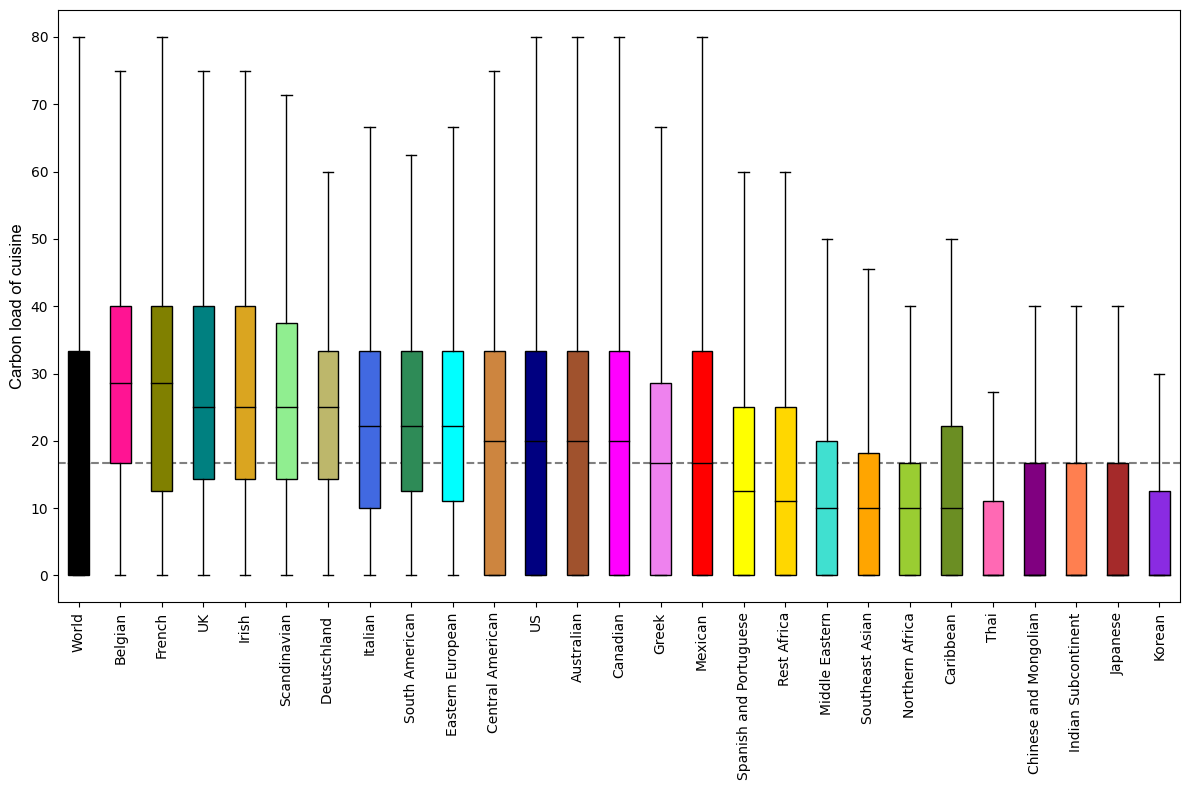

In [83]:
# sort based on median cf of region
import matplotlib.pyplot as plt

# # sort based on mean cf of region
# colors = ['black','deeppink', 'olive', 'goldenrod', 'teal', 'lightgreen', 'darkkhaki', 'seagreen', 'royalblue', 'navy', 'aqua', 
#           'magenta','sienna', 'peru', 'red', 'violet', 'gold', 'yellow', 'olivedrab', 'turquoise', 'orange', 'yellowgreen',  
#           'coral', 'brown', 'purple', 'blueviolet', 'hotpink']

# sort based on median cf of region
colors = ['black','deeppink', 'olive', 'teal', 'goldenrod', 'lightgreen', 'darkkhaki', 'royalblue','seagreen', 'aqua', 
          'peru', 'navy', 'sienna', 'magenta', 'violet', 'red', 'yellow', 'gold', 'turquoise', 'orange', 'yellowgreen',
            'olivedrab', 'hotpink', 'purple', 'coral', 'brown', 'blueviolet']

fig, ax = plt.subplots(figsize=(12, 8))

# mean_high_cf = input_file['Percentage of High CF'].mean()
median_high_cf = input_file['Percentage of High CF'].median()

# Add a horizontal line at the mean value
plt.axhline(median_high_cf, color='grey', ls='--', label='Mean')

bp = plt.boxplot(world_region_high_cf['Percentage of High CF'], 
                 labels=world_region_high_cf['region'], 
                 patch_artist=True,  # fill with color
                 boxprops=dict(facecolor='none', edgecolor='black'),  # box properties
                 whiskerprops=dict(color='black'),  # whisker properties
                 showfliers=False,  # remove outliers
                 medianprops=dict(color='black', linewidth=1),  # median properties
                 meanprops=dict(color='black', marker='o', markeredgecolor='black', markersize=5), # mean properties
                 capprops=dict(color='black'))  # cap properties

# Fill each box with a different color
for i, box in enumerate(bp['boxes']):
    box.set(facecolor=colors[i])

plt.ylabel("Carbon load of cuisine", fontsize=12, fontname="Arial")
plt.xticks(fontsize=10, rotation=90)
plt.yticks(fontsize=10)
plt.tight_layout()

plt.savefig("D:/IIITD/Mansi_Thesis_Research/Foodprint/Carbon_Footprint_July23/Plots/Region/Regions_HighCF4_mediansorted.jpeg", bbox_inches= 'tight', dpi=300)

plt.show()


**CF>8**

In [33]:
cf_great_8 = input_file

In [34]:
cf_great_8['CF>8'] = [sum(cf > 4 for cf in cf_list) for cf_list in cf_great_8['Carbon Footprints']]
cf_great_8['Percentage of CF>8'] = (cf_great_8['CF>8']/cf_great_8['Available Count'])*100
cf_great_8

Recipe ID                                  ingredient_phrase  \
0            2610  ['3 cups water', '1 cup red lentils', '1 roma ...   
1            2611  ['1 tablespoon vegetable oil', '1 large onion ...   
2            2612  ['1/4 cup olive oil', '1 large onion , finely ...   
3            2613  ['1/2 small onion , minced', '1 1/2 teaspoons ...   
4            2614  ['2/3 cup hazelnuts', '1/2 cup sesame seeds', ...   
...           ...                                                ...   
117727     149187  ["1 cup jerusalem artichoke , peeled , cut int...   
117728     149188  ['4 cups Asian pears , peeled , cored and chop...   
117729     149189  ['2 teaspoons olive oil', '1 cup onion , thinl...   
117730     149190  ['1/3 cup margarine', '1/3 cup sugar', '1 teas...   
117731     149191  ['2 5/8 ounces raisins', '4 ounces chopped fig...   

             continent          region sub_region  \
0              African  Middle Eastern   Egyptian   
1              African  Middle Eastern   Egyptian   
2              African  Middle Eastern   Egyptian   
3              African  Middle Eastern   Egyptian   
4              African  Middle Eastern   Egyptian   
...                ...             ...        ...   
117727  North American        Canadian   Canadian   
117728  North American        Canadian   Canadian   
117729  North American        Canadian   Canadian   
117730  North American        Canadian   Canadian   
117731  North American        Canadian   Canadian   

                                             instructions  \
0       ['Place 3 cups water, lentils, tomato, carrot,...   
1       ['Heat oil in a pot over medium heat.', 'Cook ...   
2       ['Heat olive oil in a large saucepan over medi...   
3       ['Cook the onions in 1 1/2 teaspoons of olive ...   
4       ['Preheat the oven to 350 degrees f. Place the...   
...                                                   ...   
117727  ['Spray skillet with oil, over medium heat sta...   
117728  ["Place all the ingredients in a saucepan and ...   
117729  ['Heat oil over medium heat in a nonstick skil...   
117730  ['Cream margarine and vanilla with sugar. Mix ...   
117731  ['In a bowl, combine raisins and figs. Cover w...   

                              Recipe Name  \
0                    Egyptian Lentil Soup   
1       Egyptian Green Beans with Carrots   
2                          Egyptian Bamia   
3             Magpie's Easy Falafel Cakes   
4                                  Dukkah   
...                                   ...   
117727       Jerusalem Artichoke Stir Fry   
117728           Asian Apple Pear Compote   
117729             Skillet Sweet Potatoes   
117730                Any-Flavour Cookies   
117731        Fig Newton " Sarah - Bars "   

                                        Recipe Ingredient  Total Ingredient  \
0       ['black pepper', 'cumin', 'garlic', 'sea salt'...                10   
1       ['green bean carrot', 'vegetable oil', 'bay le...                 9   
2       ['okra', 'salt black pepper', 'lamb shoulder',...                 7   
3       ['cornmeal', 'cumin', 'sauce', 'garlic', 'cori...                10   
4       ['black pepper', 'sea salt', 'cumin seed', 'co...                 6   
...                                                   ...               ...   
117727  ['yellow pepper', 'mushroom', 'garlic', 'jalap...                10   
117728  ['cardamom seed', 'asian pear', 'water', 'ging...                 4   
117729  ['potato', 'pepper', 'vegetable stock', 'salt'...                 6   
117730  ['baking powder', 'vanilla', 'flour', 'sugar',...                 7   
117731  ['fig', 'sea salt', 'raisin', 'vanilla', 'wate...                 8   

                                    Available Ingredients  Available Count  \
0       ['cumin', 'garlic', 'carrot', 'coriander', 're...                8   
1       ['green bean carrot', 'vegetable oil', 'garlic...                6   
2       ['okra', 'lamb shoulder', 'tomato sauce',

In [35]:
import pandas as pd

world_highcf_8 = pd.DataFrame()

# Add data to the DataFrame for the 'World' region
world_highcf_8['region'] = ['World']
world_highcf_8['Percentage of CF>8'] = [list(cf_great_8['Percentage of CF>8'])]
world_highcf_8['Recipe Count CF>8'] = len(cf_great_8['Percentage of CF>8'])
world_highcf['Count of CF>8'] = [list(cf_great_8['High CF'])]

# Calculate the mean and standard deviation of the percentage of high CF for the 'World' region
world_highcf_8['Mean'] = cf_great_8['Percentage of CF>8'].mean()
world_highcf_8['Std'] = cf_great_8['Percentage of CF>8'].std()

world_highcf_8


region                                 Percentage of CF>8  \
0  World  [0.0, 0.0, 33.33333333333333, 12.5, 0.0, 20.0,...   

   Recipe Count CF>8       Mean        Std  
0             117732  19.952779  19.184257

In [36]:
region_highcf_8 = cf_great_8.groupby('region')['Percentage of CF>8'].agg(list).reset_index()
region_highcf_8['Recipe Count CF>8'] = region_highcf_8['Percentage of CF>8'].apply(len)

region_highcf_8['Count of CF>8'] = cf_great_8.groupby('region')['CF>8'].agg(list).reset_index()['CF>8']

# Calculate the mean and standard deviation of the percentage of high CF for each region
region_highcf_8['Mean'] = region_highcf_8['Percentage of CF>8'].apply(lambda x: sum(x) / len(x))
region_highcf_8['Std'] = region_highcf_8['Percentage of CF>8'].apply(lambda x: pd.Series(x).std())

region_highcf_8 = region_highcf_8.sort_values('Mean', ascending=False)


In [37]:
world_region_high_cf_8 = pd.concat([world_highcf_8, region_highcf_8])
world_region_high_cf_8

region                                 Percentage of CF>8  \
0                    World  [0.0, 0.0, 33.33333333333333, 12.5, 0.0, 20.0,...   
1                  Belgian  [28.57142857142857, 22.22222222222222, 40.0, 2...   
8                   French  [40.0, 40.0, 57.14285714285714, 44.44444444444...   
11                   Irish  [50.0, 33.33333333333333, 15.384615384615385, ...   
24                      UK  [50.0, 50.0, 50.0, 50.0, 14.285714285714285, 5...   
19            Scandinavian  [0.0, 33.33333333333333, 57.14285714285714, 12...   
6             Deutschland   [30.0, 33.33333333333333, 42.857142857142854, ...   
20          South American  [25.0, 42.857142857142854, 66.66666666666666, ...   
12                 Italian  [25.0, 6.666666666666667, 0.0, 12.5, 33.333333...   
25                      US  [25.0, 100.0, 16.666666666666664, 33.333333333...   
7         Eastern European  [0.0, 16.666666666666664, 33.33333333333333, 0...   
2                 Canadian  [14.285714285714285, 0.0, 0.0, 12.5, 20.0, 25....   
0               Australian  [33.33333333333333, 25.0, 10.0, 14.28571428571...   
4         Central American  [0.0, 50.0, 0.0, 0.0, 0.0, 16.666666666666664,...   
15                 Mexican  [33.33333333333333, 0.0, 20.0, 12.5, 60.0, 0.0...   
9                    Greek  [0.0, 11.11111111111111, 11.11111111111111, 14...   
18             Rest Africa  [12.5, 25.0, 0.0, 0.0, 0.0, 0.0, 0.0, 25.0, 0....   
22  Spanish and Portuguese  [0.0, 16.666666666666664, 0.0, 25.0, 20.0, 25....   
3                Caribbean  [11.11111111111111, 0.0, 0.0, 0.0, 0.0, 9.0909...   
16          Middle Eastern  [0.0, 0.0, 33.33333333333333, 12.5, 0.0, 20.0,...   
21         Southeast Asian  [36.36363636363637, 0.0, 10.0, 20.0, 28.571428...   
17         Northern Africa  [6.25, 0.0, 16.666666666666664, 0.0, 0.0, 6.66...   
10     Indian Subcontinent  [11.11111111111111, 0.0, 0.0, 22.2222222222222...   
13                Japanese  [33.33333333333333, 33.33333333333333, 0.0, 0....   
5    Chinese and Mongolian  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 16.6666666...   
14                  Korean  [13.333333333333334, 0.0, 16.666666666666664, ...   
23                    Thai  [11.11111111111111, 0.0, 0.0, 0.0, 0.0, 11.111...   

    Recipe Count CF>8       Mean        Std  \
0              117732  19.952779  19.184257   
1                1058  28.226796  18.664192   
8                6344  28.212010  20.871096   
11               2501  27.047098  20.187474   
24               4375  26.641736  19.544509   
19               2805  26.421359  17.779880   
6                4303  25.207738  18.516034   
20               7152  24.742890  18.828426   
12              16546  24.017693  19.807094   
25               4994  23.567708  20.967517   
7                2492  23.230319  18.117175   
2                6668  21.925715  19.527677   
0                5799  21.585373  19.749142   
4                 453  20.643974  19.618602   
15              14394  19.819501  19.656956   
9                4177  18.128917  16.175299   
18               2737  14.221212  16.610720   
22               2838  14.190589  16.080207   
3                3011  13.864559  17.308752   
16               3896  12.481413  15.080331   
21               1939  11.567974  13.504656   
17               1609  11.213249  12.060819   
10               6453  10.707715  14.240064   
13               2038  10.372252  14.763287   
5                5882  10.249584  14.516940   
14                668   6.989530   9.204281   
23               2600   6.363068   9.989780   

                                        Count of CF>8  
0                                                 NaN  
1   [2, 2, 2, 1, 3, 0, 2, 0, 2, 2, 3, 2, 2, 5, 0, ...  
8   [2, 2, 4, 4, 2, 2, 2, 2, 3, 3, 2, 4, 0, 2, 2, ...  
11  [3, 3, 2, 1, 4, 1, 1, 3, 1, 3, 0, 1, 2, 1, 2, ...  
24  [1, 1, 1, 2, 1, 4, 1, 1, 2, 2, 1, 1, 1, 2, 4, ...  
19  [0, 1, 4, 1, 3, 2, 3, 0, 1, 3, 2, 2, 3, 2, 2, ...  
6   [3, 2, 3, 2, 2, 2, 2, 2, 4, 3, 2, 3, 0

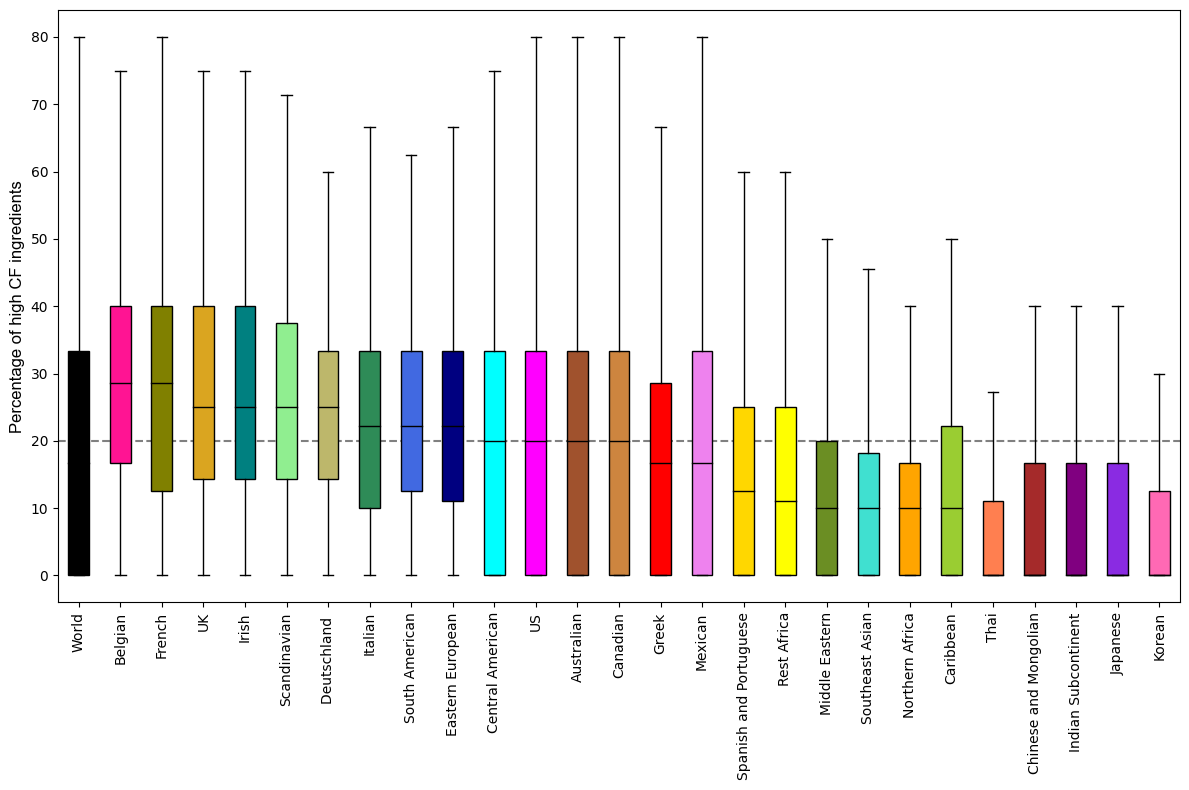

In [38]:
# sort based on median cf of region
import matplotlib.pyplot as plt

# sort based on median cf of region
colors = ['black','deeppink', 'olive', 'goldenrod', 'teal', 'lightgreen', 'darkkhaki', 'seagreen', 'royalblue', 'navy', 'aqua', 
          'magenta','sienna', 'peru', 'red', 'violet', 'gold', 'yellow', 'olivedrab', 'turquoise', 'orange', 'yellowgreen',  
          'coral', 'brown', 'purple', 'blueviolet', 'hotpink']

fig, ax = plt.subplots(figsize=(12, 8))

mean_high_cf = input_file['Percentage of High CF'].mean()

# Add a horizontal line at the mean value
plt.axhline(mean_high_cf, color='grey', ls='--', label='Mean')

bp = plt.boxplot(world_region_high_cf['Percentage of High CF'], 
                 labels=world_region_high_cf ['region'], 
                 patch_artist=True,  # fill with color
                 boxprops=dict(facecolor='none', edgecolor='black'),  # box properties
                 whiskerprops=dict(color='black'),  # whisker properties
                 showfliers=False,  # remove outliers
                 medianprops=dict(color='black', linewidth=1),  # median properties
                 meanprops=dict(color='black', marker='o', markeredgecolor='black', markersize=5), # mean properties
                 capprops=dict(color='black'))  # cap properties

# Fill each box with a different color
for i, box in enumerate(bp['boxes']):
    box.set(facecolor=colors[i])

plt.ylabel("Percentage of high CF ingredients", fontsize=12, fontname="Arial")
plt.xticks(fontsize=10, rotation=90)
plt.yticks(fontsize=10)
plt.tight_layout()

plt.savefig("D:/IIITD/Mansi_Thesis_Research/Foodprint/Carbon_Footprint_July23/Plots/Region/Regions_HighCF_8.jpeg", bbox_inches= 'tight', dpi=300)

plt.show()


# Regional Recipe size distribution 

In [39]:
base_recipe

ID                              title  \
0         2610               Egyptian Lentil Soup   
1         2611  Egyptian Green Beans with Carrots   
2         2612                     Egyptian Bamia   
3         2613        Magpie's Easy Falafel Cakes   
4         2614                             Dukkah   
...        ...                                ...   
118078  149187       Jerusalem Artichoke Stir Fry   
118079  149188           Asian Apple Pear Compote   
118080  149189             Skillet Sweet Potatoes   
118081  149190                Any-Flavour Cookies   
118082  149191        Fig Newton " Sarah - Bars "   

                                              ingredients  \
0       ['black pepper', 'cumin', 'garlic', 'sea salt'...   
1       ['green bean carrot', 'vegetable oil', 'bay le...   
2       ['okra', 'salt black pepper', 'lamb shoulder',...   
3       ['cornmeal', 'cumin', 'sauce', 'garlic', 'cori...   
4       ['black pepper', 'sea salt', 'cumin seed', 'co...   
...                                                   ...   
118078  ['yellow pepper', 'mushroom', 'garlic', 'jalap...   
118079  ['cardamom seed', 'asian pear', 'water', 'ging...   
118080  ['potato', 'pepper', 'vegetable stock', 'salt'...   
118081  ['baking powder', 'vanilla', 'flour', 'sugar',...   
118082  ['fig', 'sea salt', 'raisin', 'vanilla', 'wate...   

                                        ingredient_phrase       continent  \
0       ['3 cups water', '1 cup red lentils', '1 roma ...         African   
1       ['1 tablespoon vegetable oil', '1 large onion ...         African   
2       ['1/4 cup olive oil', '1 large onion , finely ...         African   
3       ['1/2 small onion , minced', '1 1/2 teaspoons ...         African   
4       ['2/3 cup hazelnuts', '1/2 cup sesame seeds', ...         African   
...                                                   ...             ...   
118078  ["1 cup jerusalem artichoke , peeled , cut int...  North American   
118079  ['4 cups Asian pears , peeled , cored and chop...  North American   
118080  ['2 teaspoons olive oil', '1 cup onion , thinl...  North American   
118081  ['1/3 cup margarine', '1/3 cup sugar', '1 teas...  North American   
118082  ['2 5/8 ounces raisins', '4 ounces chopped fig...  North American   

                region sub_region  \
0       Middle Eastern   Egyptian   
1       Middle Eastern   Egyptian   
2       Middle Eastern   Egyptian   
3       Middle Eastern   Egyptian   
4       Middle Eastern   Egyptian   
...                ...        ...   
118078        Canadian   Canadian   
118079        Canadian   Canadian   
118080        Canadian   Canadian   
118081        Canadian   Canadian   
118082        Canadian   Canadian   

                                             instructions  
0       ['Place 3 cups water, lentils, tomato, carrot,...  
1       ['Heat oil in a pot over medium heat.', 'Cook ...  
2       ['Heat olive oil in a large saucepan over medi...  
3       ['Cook the onions in 1 1/2 teaspoons of olive ...  
4       ['Preheat the oven to 350 degrees f. Place the...  
...                                                   ...  
118078  ['Spray skillet with oil, over medium heat sta...  
118079  ["Place all the ingredients in a saucepan and ...  
118080  ['Heat oil over medium heat in a nonstick skil...  
118081  ['Cream margarine and vanilla with sugar. Mix ...  
118082  ['In a bowl, combine raisins and figs. Cover w...  

[118083 rows x 8 columns]

In [40]:
# Group the base_recipe DataFrame by 'region' and 'ID'
grouped_by_region = base_recipe.groupby(['region', 'ID'])

# Calculate the number of ingredients in each recipe for each region
ingredients_count_by_region = grouped_by_region['ingredients'].apply(lambda x: len(ast.literal_eval(x.iloc[0])))

# Reset the index and rename the columns for clarity
ingredients_count_by_region = ingredients_count_by_region.reset_index()
ingredients_count_by_region.columns = ['Region', 'Recipe ID', 'Ingredient Count']

region_ingredient_counts = ingredients_count_by_region.groupby('Region')['Ingredient Count'].agg(list).reset_index()

region_ingredient_counts


Region                                   Ingredient Count
0               Australian  [7, 5, 15, 8, 9, 14, 7, 3, 9, 6, 6, 15, 10, 9,...
1                  Belgian  [11, 14, 8, 6, 9, 8, 7, 14, 10, 8, 12, 3, 22, ...
2                 Canadian  [14, 8, 6, 11, 10, 7, 9, 5, 11, 11, 13, 10, 5,...
3                Caribbean  [15, 14, 7, 9, 18, 15, 16, 18, 15, 7, 12, 13, ...
4         Central American  [3, 7, 7, 11, 4, 10, 9, 2, 10, 26, 8, 15, 8, 7...
5    Chinese and Mongolian  [12, 11, 18, 12, 13, 14, 13, 9, 8, 8, 12, 9, 1...
6             Deutschland   [15, 7, 10, 6, 12, 10, 6, 7, 14, 10, 8, 10, 5,...
7         Eastern European  [9, 11, 9, 7, 5, 8, 8, 3, 14, 17, 13, 7, 8, 13...
8                   French  [10, 5, 9, 12, 7, 15, 7, 13, 10, 12, 5, 12, 5,...
9                    Greek  [6, 12, 15, 11, 11, 10, 16, 8, 12, 14, 6, 12, ...
10     Indian Subcontinent  [21, 12, 16, 14, 21, 10, 9, 16, 15, 18, 14, 12...
11                   Irish  [10, 17, 14, 10, 18, 5, 6, 9, 9, 8, 3, 9, 5, 7...
12                 Italian  [11, 18, 11, 14, 9, 13, 8, 12, 17, 10, 15, 25,...
13                Japanese  [8, 11, 8, 9, 14, 12, 8, 8, 8, 3, 7, 4, 6, 10,...
14                  Korean  [19, 13, 9, 17, 10, 11, 10, 15, 13, 10, 14, 9,...
15                 Mexican  [7, 19, 7, 17, 6, 8, 16, 6, 10, 8, 12, 12, 13,...
16          Middle Eastern  [10, 9, 7, 10, 6, 9, 10, 12, 9, 18, 5, 7, 5, 8...
17         Northern Africa  [18, 15, 16, 10, 10, 20, 10, 14, 14, 15, 15, 1...
18             Rest Africa  [11, 13, 16, 7, 10, 13, 8, 5, 4, 11, 5, 5, 7, ...
19            Scandinavian  [5, 5, 11, 10, 12, 10, 10, 6, 9, 11, 8, 8, 11,...
20          South American  [5, 10, 3, 9, 12, 3, 8, 12, 10, 5, 11, 22, 11,...
21         Southeast Asian  [16, 8, 14, 13, 9, 16, 17, 13, 15, 10, 2, 7, 1...
22  Spanish and Portuguese  [3, 10, 4, 13, 8, 7, 12, 10, 6, 13, 11, 6, 8, ...
23                    Thai  [11, 14, 20, 8, 11, 13, 18, 10, 13, 18, 6, 12,...
24                      UK  [3, 3, 3, 8, 13, 13, 3, 4, 4, 5, 3, 6, 12, 3, ...
25                      US  [7, 4, 11, 5, 9, 4, 8, 8, 7, 7, 14, 7, 16, 6, ...

In [41]:
grouped_by_region = base_recipe.groupby('region')

# Initialize lists to store the data for the DataFrame
regions = []
unique_sizes_list = []
count_list = []

# Loop through each region and calculate the recipe sizes distribution
for region, data in grouped_by_region:
    recipe_sizes = []
    for ingredients in data['ingredients']:
        s = len(ingredients.split(','))
        recipe_sizes.append(s)
    
    unique_sizes, counts = np.unique(recipe_sizes, return_counts=True)
    total_recipes = len(recipe_sizes)
    percentages = (counts / total_recipes) * 100
    
    # Append data to the lists
    regions.append(region)
    unique_sizes_list.append(unique_sizes)
    count_list.append(counts)

# Create the DataFrame
data = {
    'Region': regions,
    'Unique Recipe Size': unique_sizes_list,
    'Count': count_list
}

df_recipe_sizes = pd.DataFrame(data)

# # Explode the 'Unique Recipe Size' and 'Count' lists to separate rows
# df_recipe_sizes = df_recipe_sizes.explode('Unique Recipe Size', ignore_index=True)
# df_recipe_sizes['Count'] = df_recipe_sizes['Count'].explode(ignore_index=True)

# # Convert the 'Unique Recipe Size' column to integer type
# df_recipe_sizes['Unique Recipe Size'] = df_recipe_sizes['Unique Recipe Size'].astype(int)

# # Reset the index
# df_recipe_sizes = df_recipe_sizes.reset_index(drop=True)

df_recipe_sizes

Region                                 Unique Recipe Size  \
0               Australian  [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 1...   
1                  Belgian  [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 1...   
2                 Canadian  [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 1...   
3                Caribbean  [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 1...   
4         Central American  [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 1...   
5    Chinese and Mongolian  [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 1...   
6             Deutschland   [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 1...   
7         Eastern European  [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 1...   
8                   French  [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 1...   
9                    Greek  [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 1...   
10     Indian Subcontinent  [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 1...   
11                   Irish  [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 1...   
12                 Italian  [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 1...   
13                Japanese  [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 1...   
14                  Korean  [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 1...   
15                 Mexican  [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 1...   
16          Middle Eastern  [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 1...   
17         Northern Africa  [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 1...   
18             Rest Africa  [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 1...   
19            Scandinavian  [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 1...   
20          South American  [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 1...   
21         Southeast Asian  [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 1...   
22  Spanish and Portuguese  [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 1...   
23                    Thai  [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 1...   
24                      UK  [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 1...   
25                      US  [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 1...   

                                                Count  
0   [74, 215, 358, 552, 579, 701, 699, 651, 511, 4...  
1   [4, 27, 42, 69, 92, 126, 142, 127, 119, 101, 7...  
2   [55, 185, 347, 480, 625, 681, 732, 770, 735, 5...  
3   [26, 75, 141, 233, 249, 262, 274, 263, 237, 23...  
4   [7, 9, 25, 30, 37, 44, 40, 50, 48, 46, 31, 26,...  
5   [43, 82, 112, 272, 364, 458, 541, 594, 607, 56...  
6   [30, 63, 172, 278, 385, 459, 570, 477, 490, 39...  
7   [20, 55, 113, 189, 247, 225, 288, 253, 260, 22...  
8   [50, 166, 273, 490, 601, 681, 797, 731, 647, 5...  
9   [19, 43, 126, 213, 311, 391, 445, 417, 465, 42...  
10  [42, 88, 174, 284, 354, 420, 417, 483, 540, 56...  
11  [42, 82, 148, 240, 255, 299, 267, 291, 222, 19...  
12  [80, 206, 473, 892, 1272, 1599, 1828, 1846, 17...  
13  [21, 75, 122, 156, 211, 234, 220, 204, 182, 14...  
14  [3, 5, 16, 22, 49, 44, 80, 86, 76, 64, 67, 33,...  
15  [87, 250, 565, 953, 1234, 1497, 1514, 1474, 13...  
16  [28, 59, 130, 249, 295, 388, 443, 442, 445, 33...  
17  [6, 19, 22, 46, 63, 72, 119, 133, 148, 144, 16...  
18  [21, 80, 136, 149, 200, 237, 256, 272, 253, 24...  
19  [15, 66, 136, 241, 341, 378, 348, 361, 268, 21...  
20  [33, 100, 222, 362, 471, 534, 665, 669, 705, 7...  
21  [6, 23, 63, 73, 120, 151, 148, 181, 180, 178, ...  
22  [17, 37, 115, 185, 210, 285, 318, 310, 291, 26...  
23  [12, 16, 35, 86, 115, 149, 184, 231, 232, 267,...  
24  [38, 154, 300, 415, 488, 534, 522, 481, 406, 3...  
25  [38, 133, 235, 374, 486, 540, 539, 544, 506, 4...

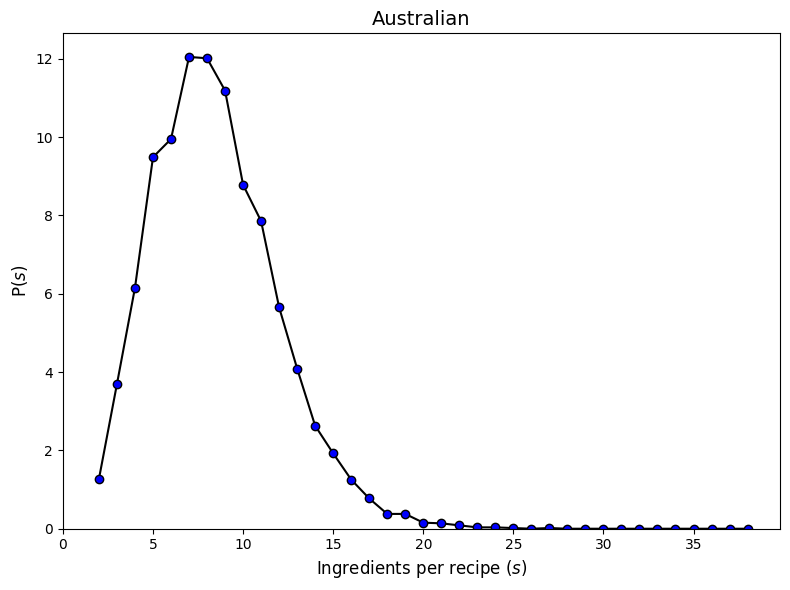

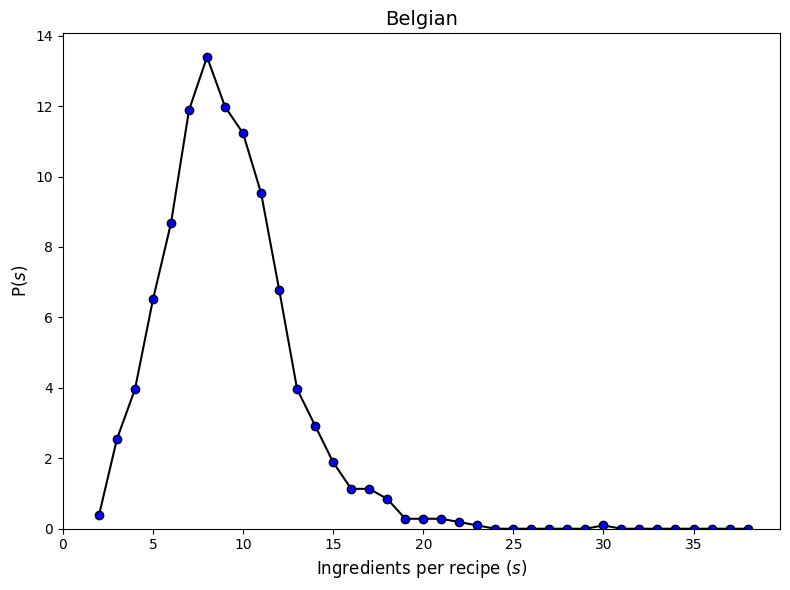

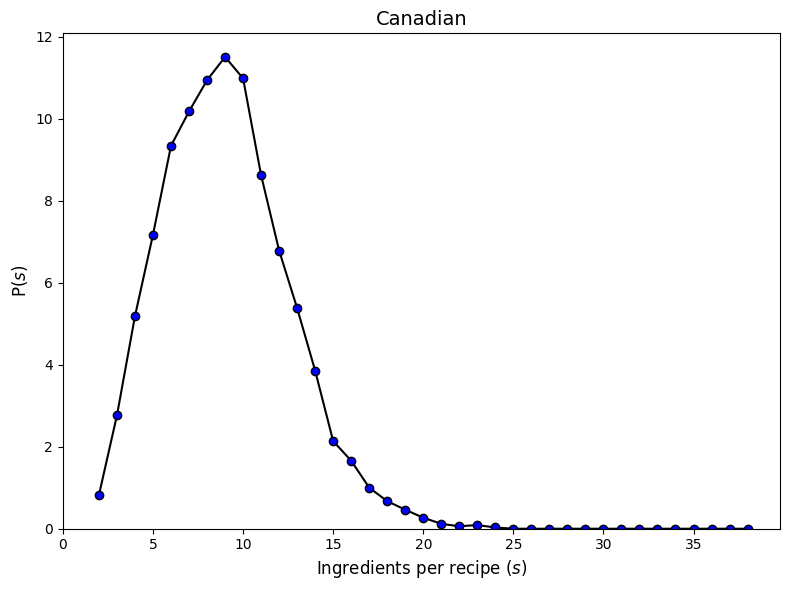

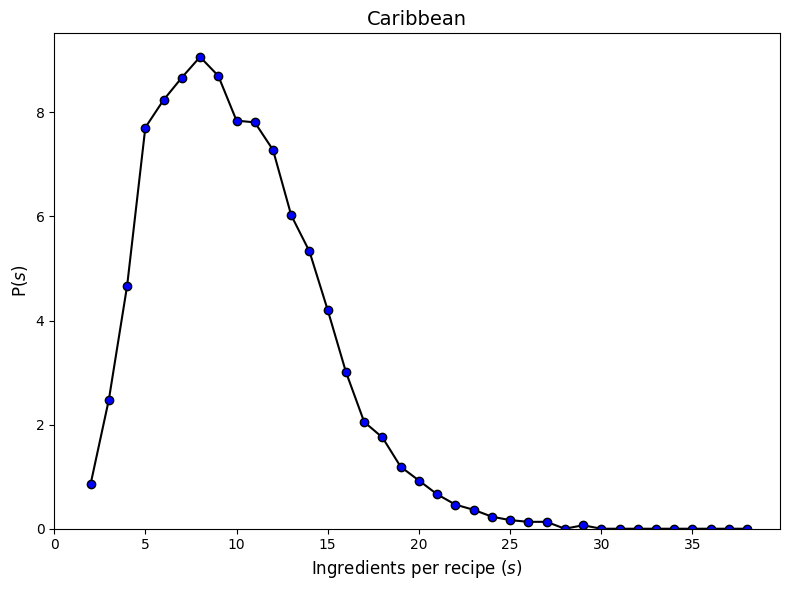

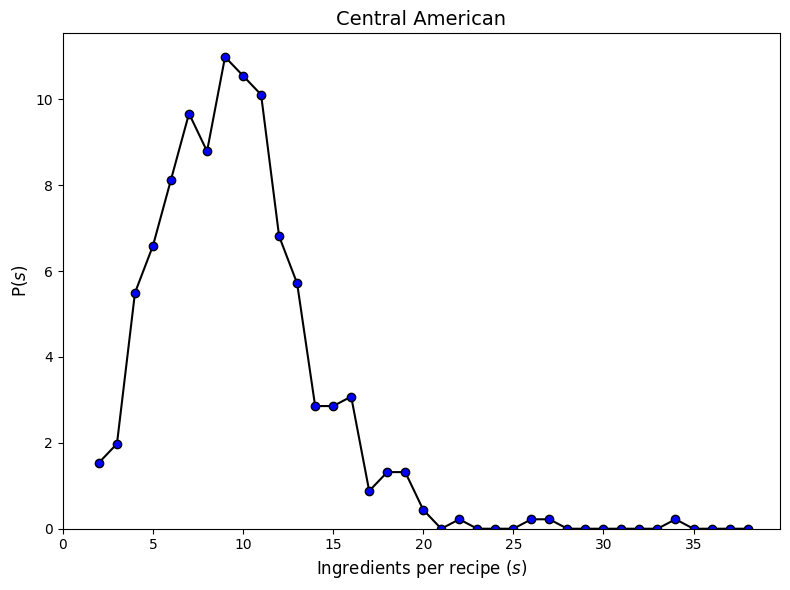

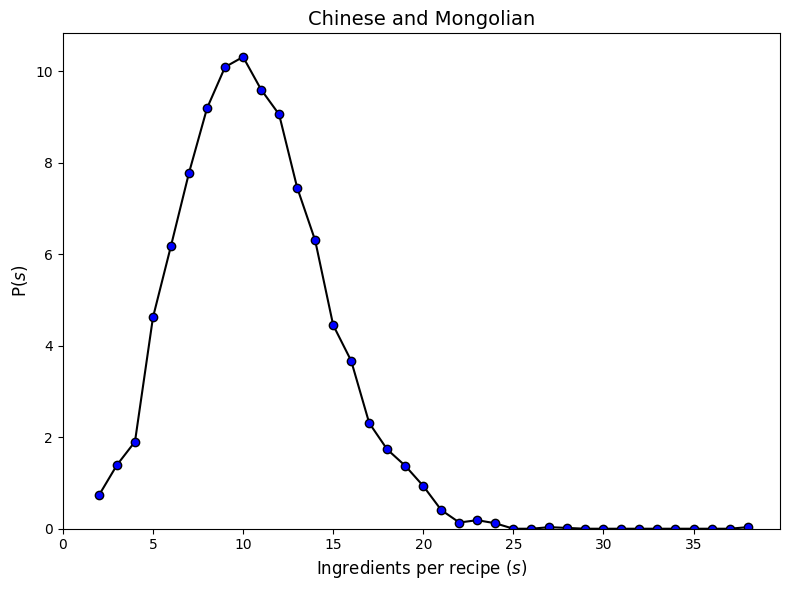

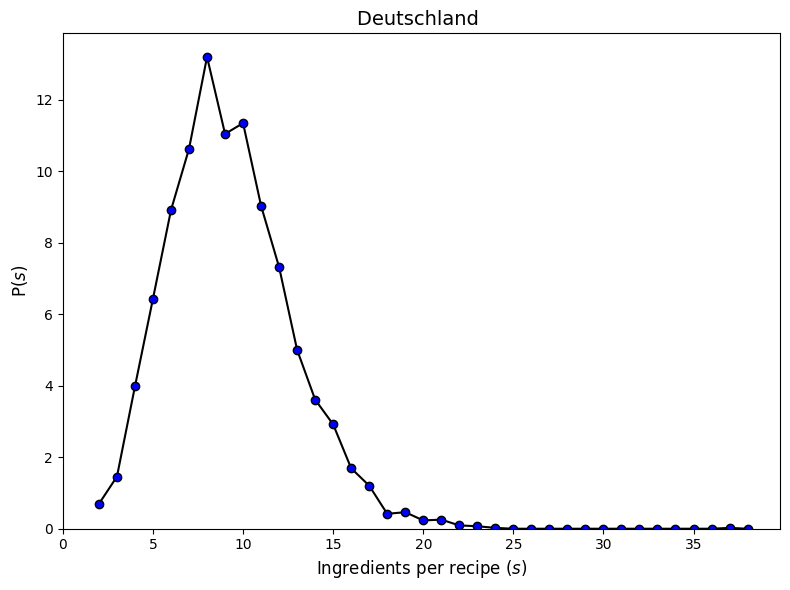

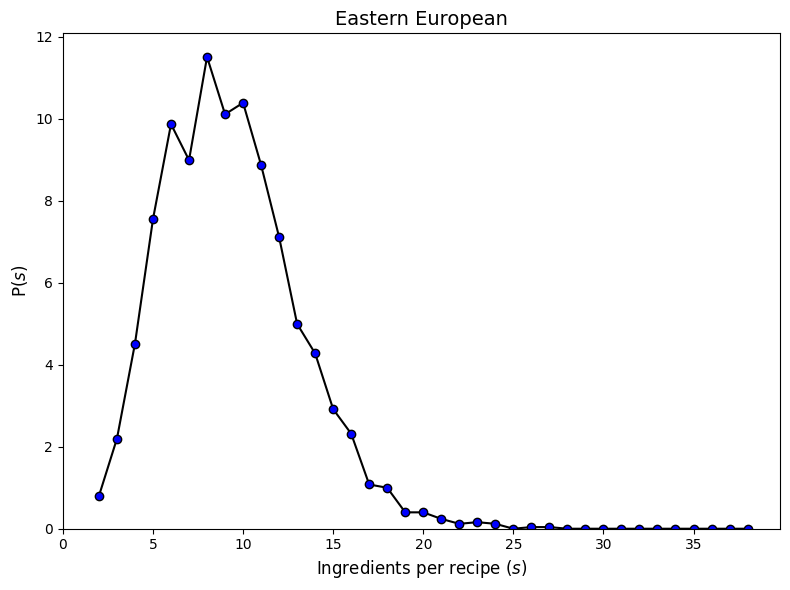

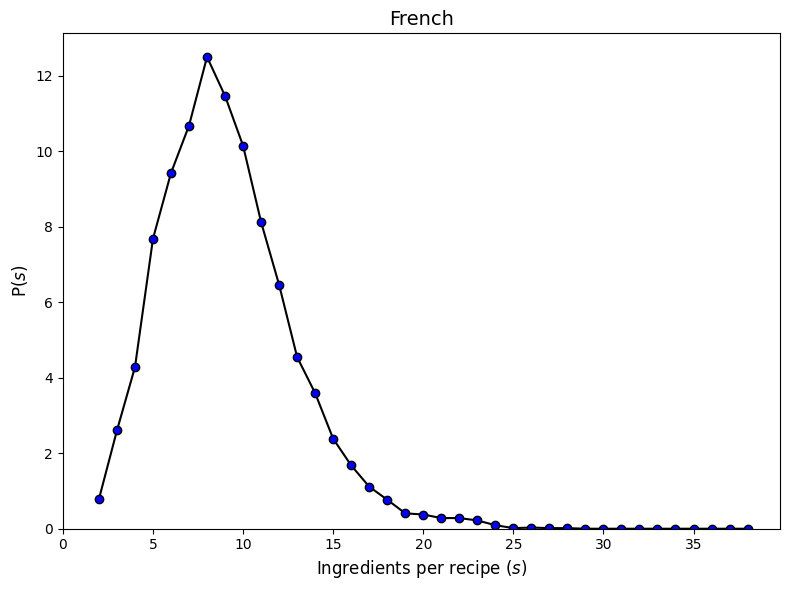

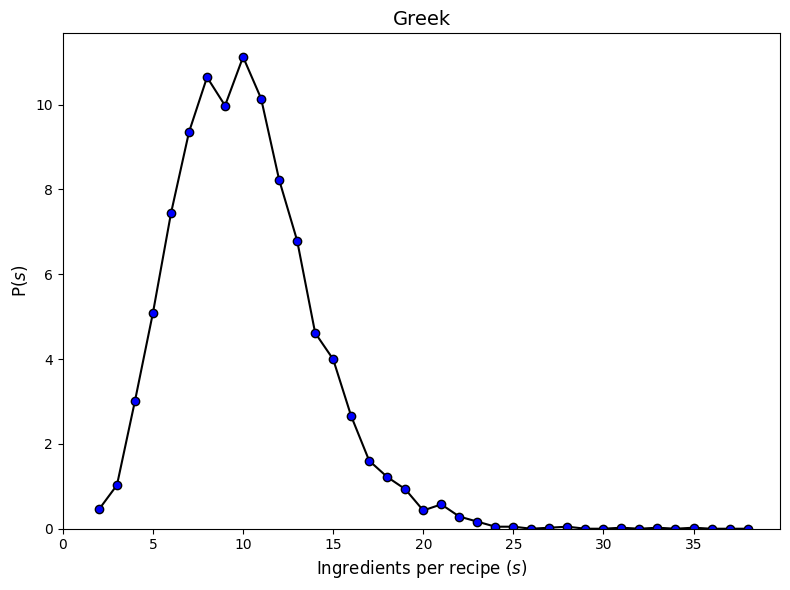

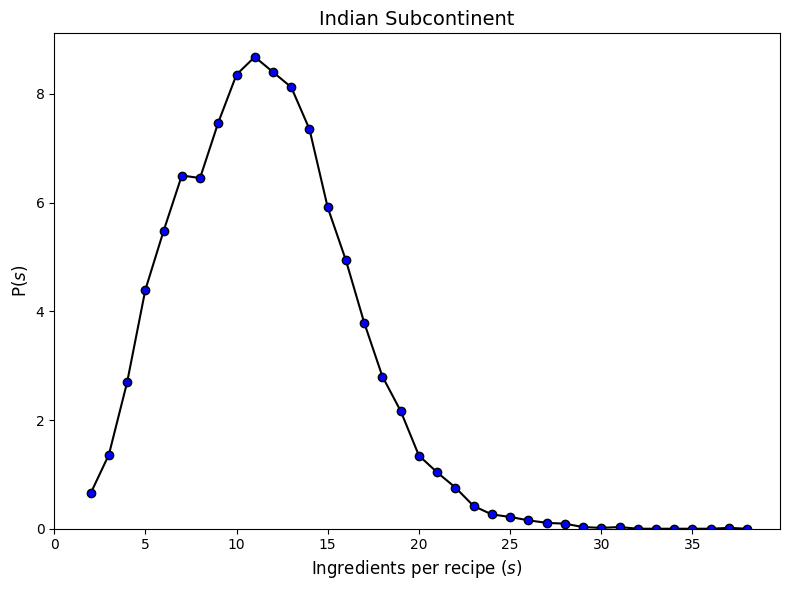

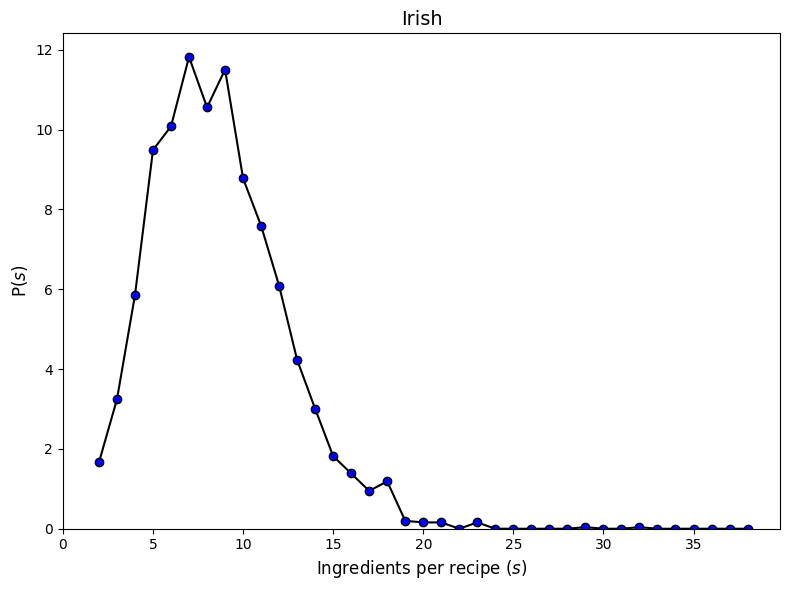

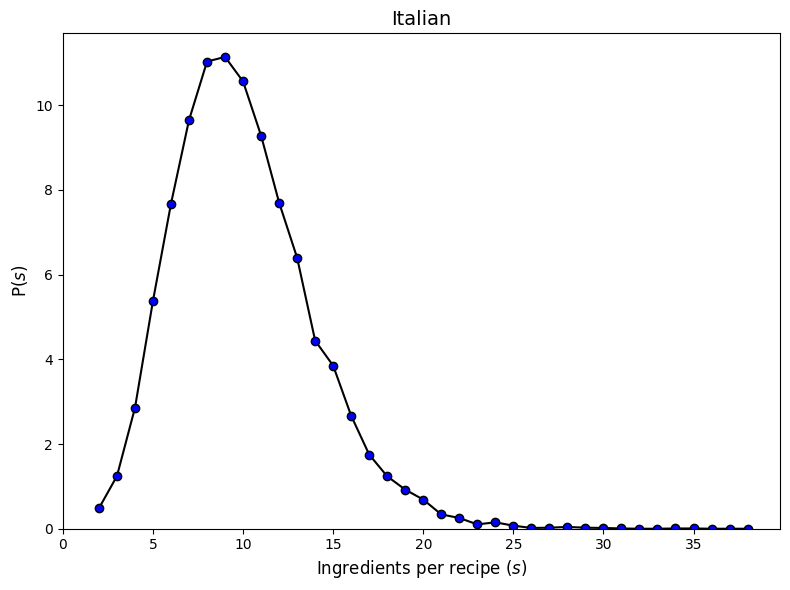

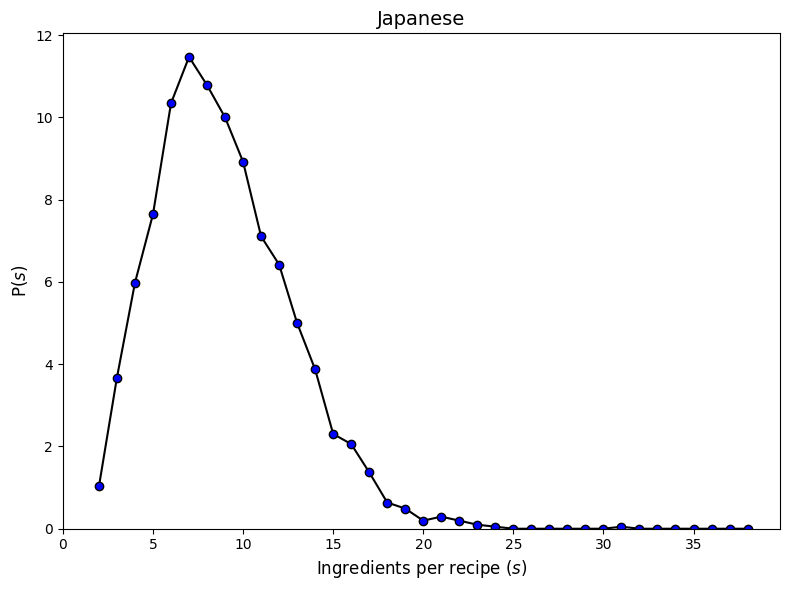

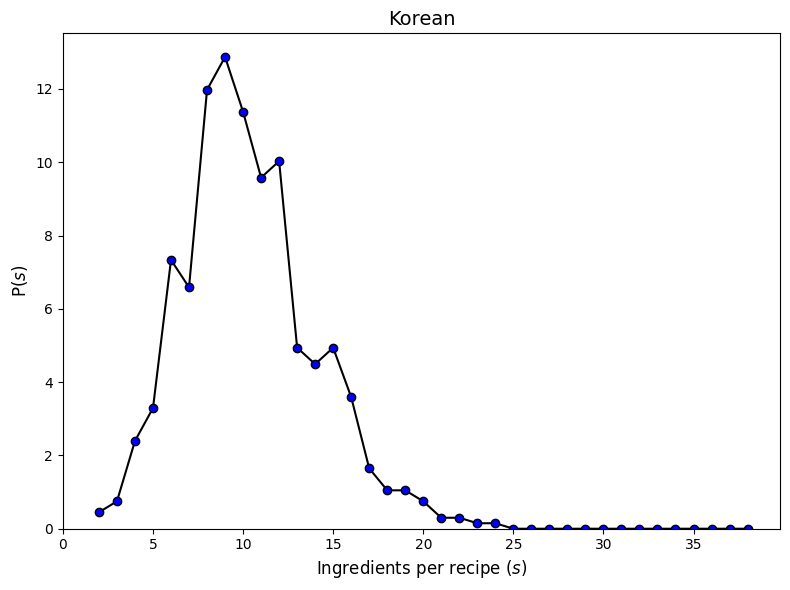

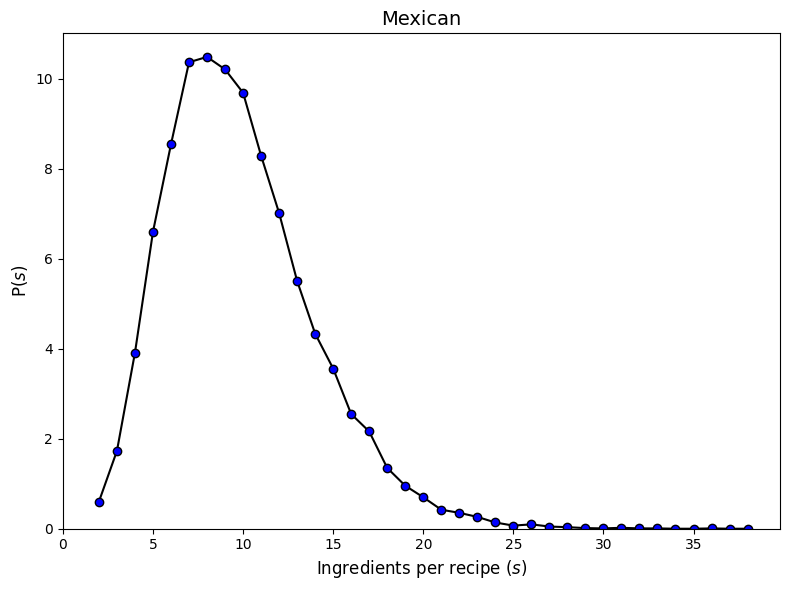

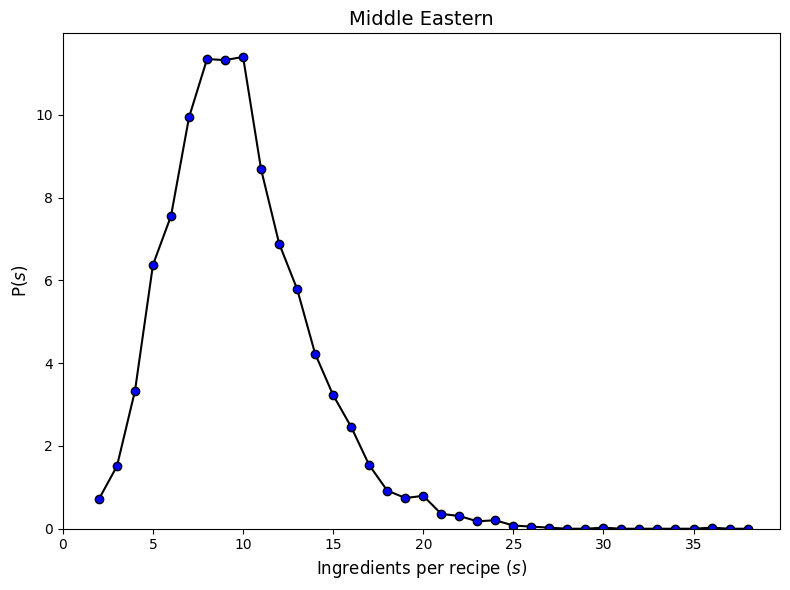

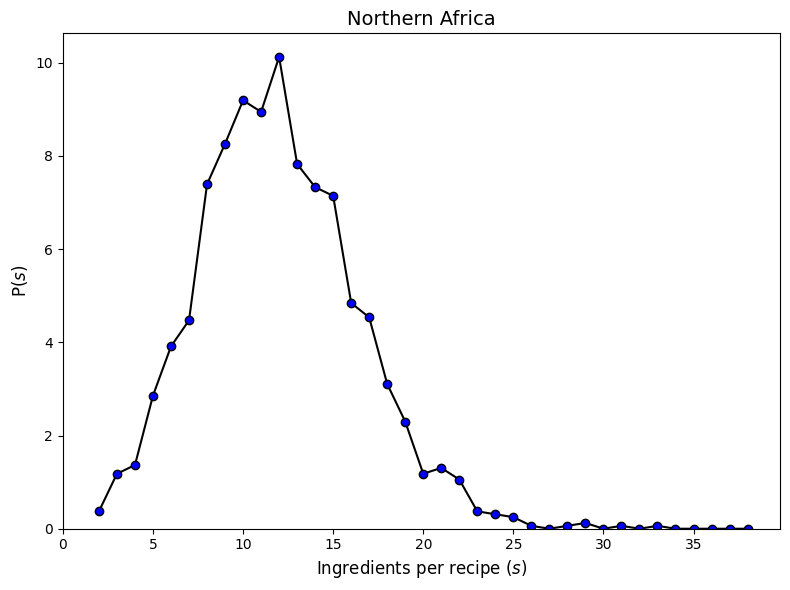

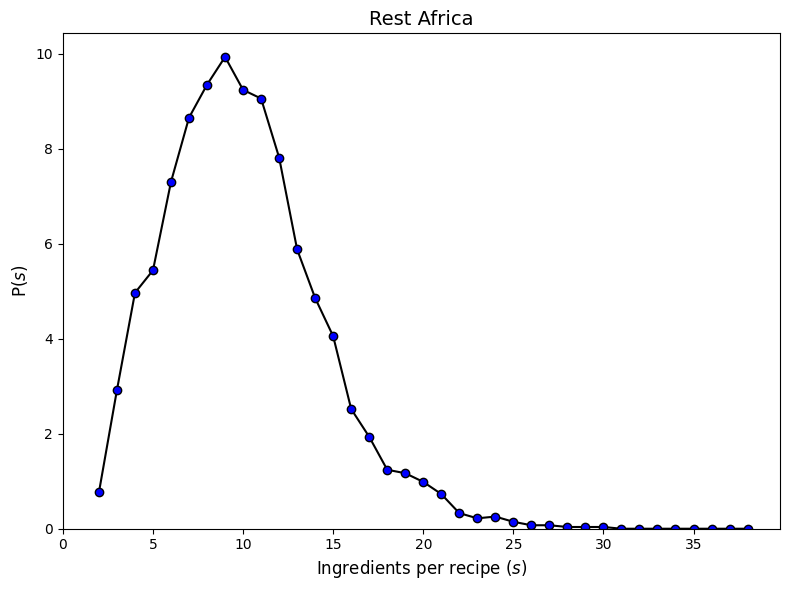

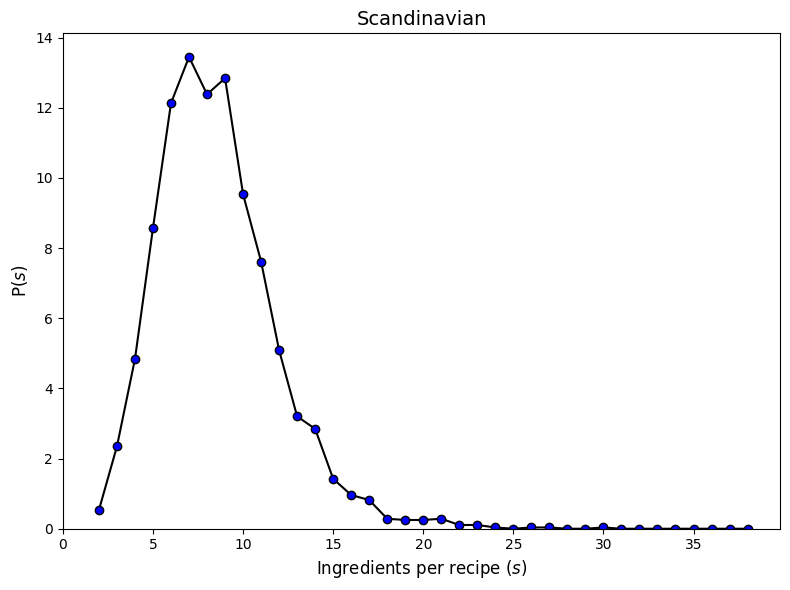

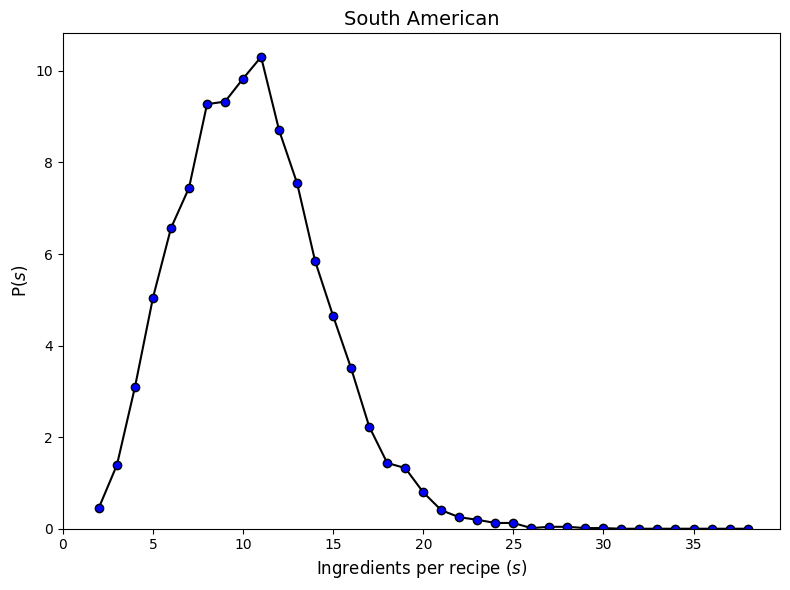

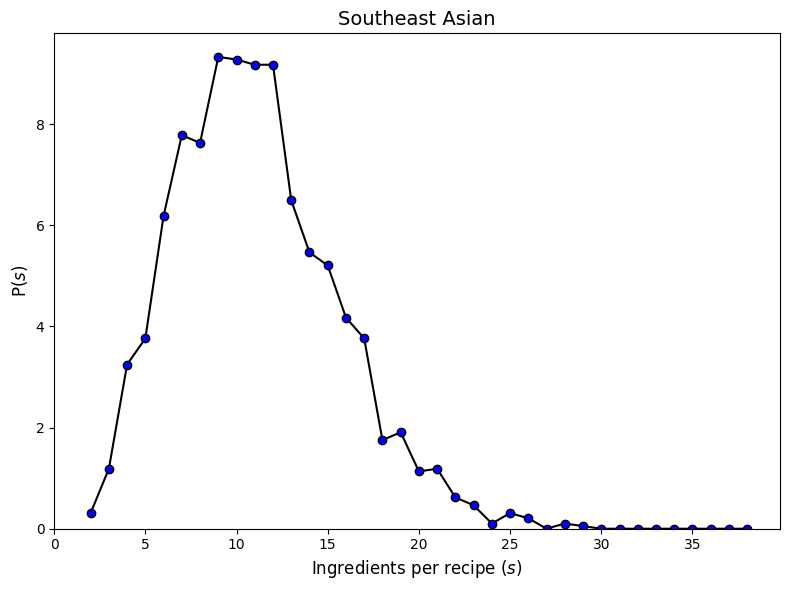

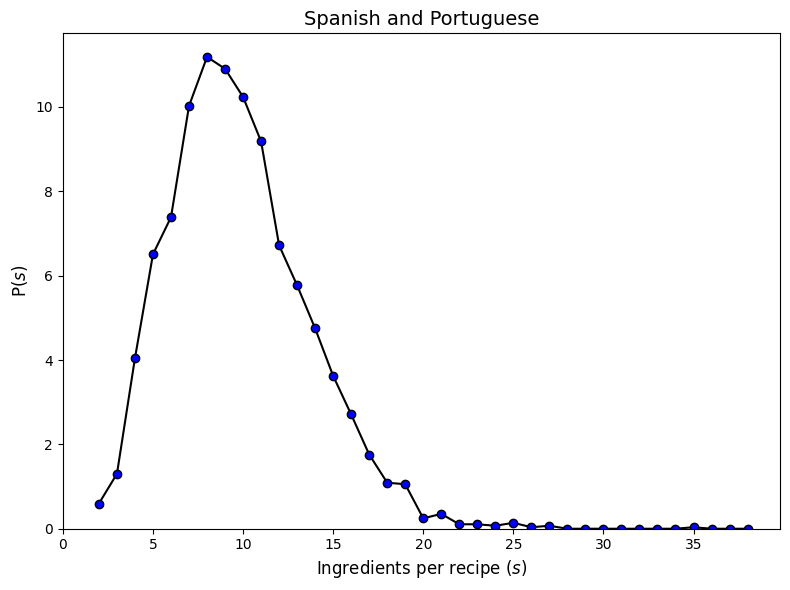

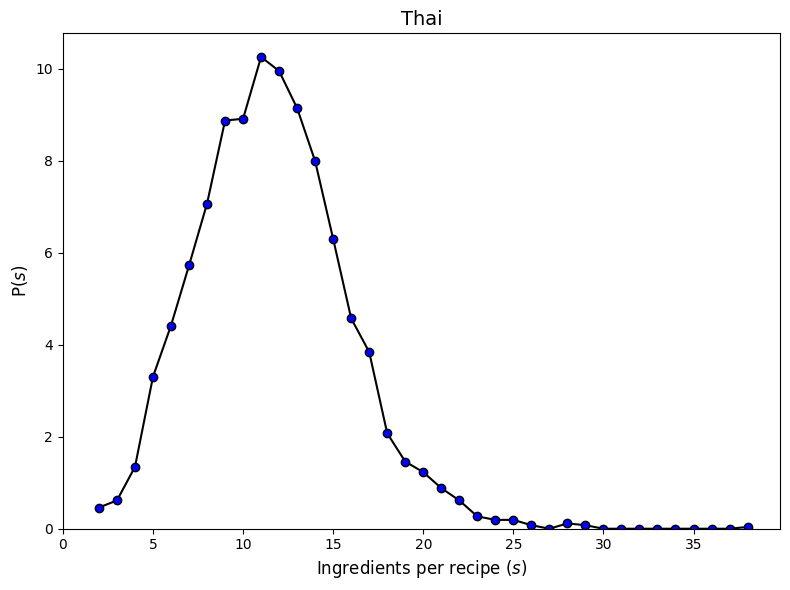

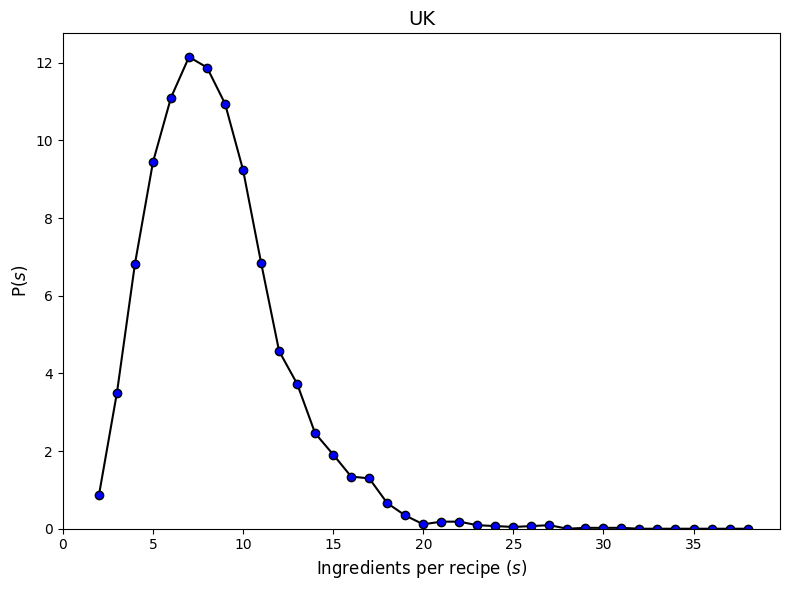

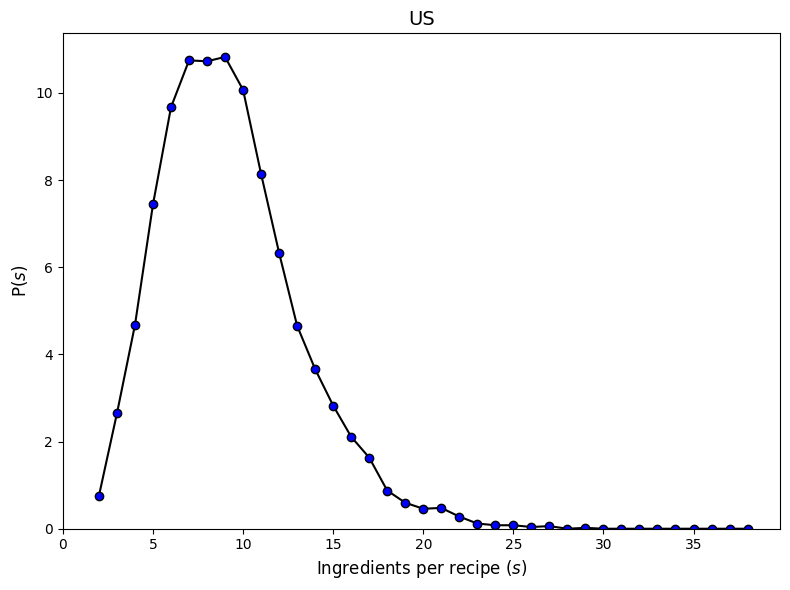

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Group the base_recipe DataFrame by 'region'
grouped_by_region = base_recipe.groupby('region')

# Initialize a dictionary to store the recipe sizes distribution for each region
region_recipe_sizes = {}

# Loop through each region and calculate the recipe sizes distribution
for region, data in grouped_by_region:
    recipe_sizes = []
    for ingredients in data['ingredients']:
        s = len(ingredients.split(','))
        recipe_sizes.append(s)
    
    unique_sizes, counts = np.unique(recipe_sizes, return_counts=True)
    total_recipes = len(recipe_sizes)
    percentages = (counts / total_recipes) * 100
    
    region_recipe_sizes[region] = (unique_sizes, percentages)

# Find the superset of unique recipe sizes for all regions
all_sizes = set()
for unique_sizes, _ in region_recipe_sizes.values():
    all_sizes.update(unique_sizes)

# Create the plot for each region
for region, (unique_sizes, percentages) in region_recipe_sizes.items():
    # Fill in missing recipe sizes with 0 percentages
    missing_sizes = list(all_sizes - set(unique_sizes))
    unique_sizes = np.append(unique_sizes, missing_sizes)
    percentages = np.append(percentages, [0] * len(missing_sizes))

    # Sort the data by unique recipe sizes
    sorted_indices = np.argsort(unique_sizes)
    unique_sizes = unique_sizes[sorted_indices]
    percentages = percentages[sorted_indices]

    plt.figure(figsize=(8, 6))
    plt.plot(unique_sizes, percentages, marker='o', color='black', markerfacecolor='blue')
    plt.xlabel("Ingredients per recipe ($s$)", fontsize=12)
    plt.ylabel("P($s$)", fontsize=12)
    plt.title(region, fontsize=14)
    plt.xlim(left=0)
    plt.ylim(bottom=0)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.tight_layout()
    plt.show()


Actual recipe size dist

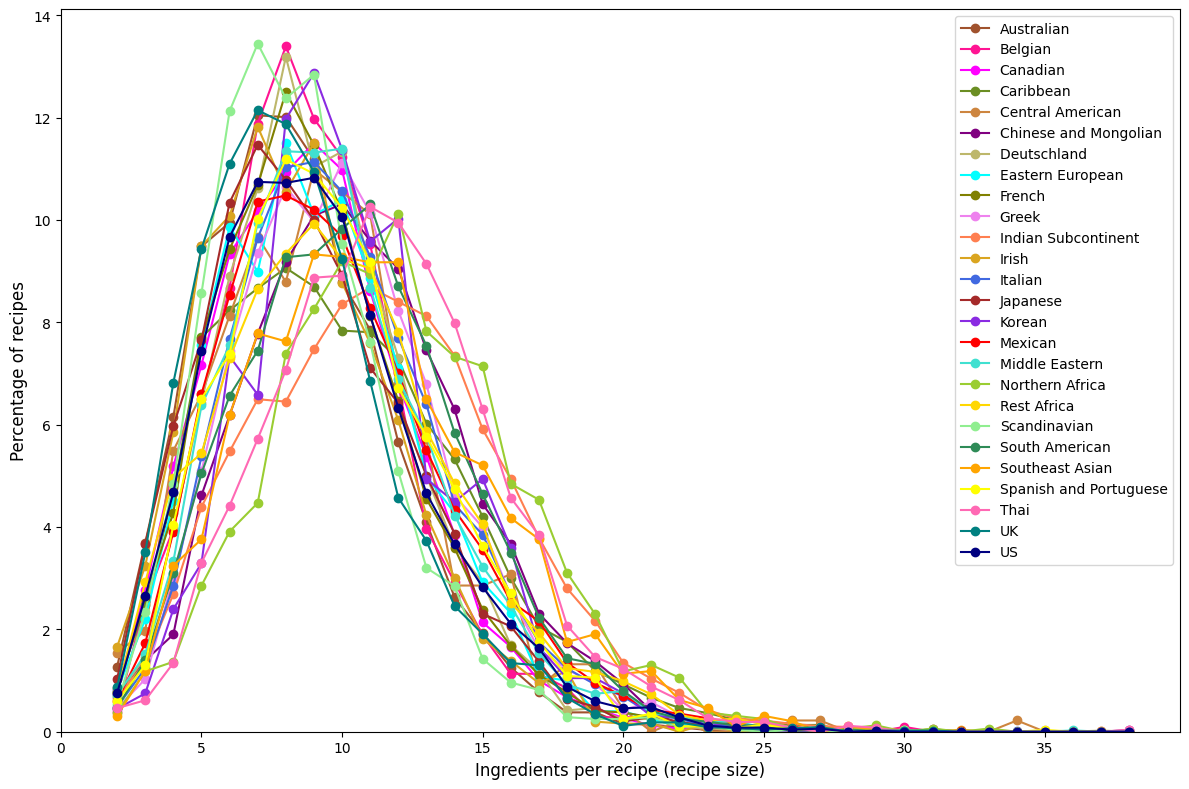

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Group the base_recipe DataFrame by 'region'
grouped_by_region = base_recipe.groupby('region')

# Initialize a dictionary to store the recipe sizes distribution for each region
region_recipe_sizes = {}

# Loop through each region and calculate the recipe sizes distribution
for region, data in grouped_by_region:
    recipe_sizes = []
    for ingredients in data['ingredients']:
        s = len(ingredients.split(','))
        recipe_sizes.append(s)
    
    unique_sizes, counts = np.unique(recipe_sizes, return_counts=True)
    total_recipes = len(recipe_sizes)
    percentages = (counts / total_recipes) * 100
    
    region_recipe_sizes[region] = (unique_sizes, percentages)

# Find the superset of unique recipe sizes for all regions
all_sizes = set()
for unique_sizes, _ in region_recipe_sizes.values():
    all_sizes.update(unique_sizes)

# Create the plot for all regions
plt.figure(figsize=(12, 8))

# alphabetically sorted
colors = ['sienna', 'deeppink', 'magenta', 'olivedrab', 'peru', 'purple', 'darkkhaki', 'aqua', 'olive', 'violet', 
           'coral', 'goldenrod', 'royalblue', 'brown',  'blueviolet', 'red', 'turquoise', 'yellowgreen',   
          'gold', 'lightgreen',  'seagreen',  'orange', 'yellow',  'hotpink', 'teal', 'navy']

for i, (region, (unique_sizes, percentages)) in enumerate(region_recipe_sizes.items()):
    # Fill in missing recipe sizes with 0 percentages
    missing_sizes = list(all_sizes - set(unique_sizes))
    unique_sizes = np.append(unique_sizes, missing_sizes)
    percentages = np.append(percentages, [0] * len(missing_sizes))

    # Sort the data by unique recipe sizes
    sorted_indices = np.argsort(unique_sizes)
    unique_sizes = unique_sizes[sorted_indices]
    percentages = percentages[sorted_indices]

    plt.plot(unique_sizes, percentages, marker='o', color=colors[i], label=region)

plt.xlabel("Ingredients per recipe (recipe size)", fontsize=12)
plt.ylabel("Percentage of recipes", fontsize=12)
plt.legend(fontsize=10)
plt.xlim(left=0)
plt.ylim(bottom=0)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()

plt.savefig("D:/IIITD/Mansi_Thesis_Research/Foodprint/Carbon_Footprint_July23/Plots/Ingredient_analysis/Region_Recipe_size_dist_RecipeDB.jpeg", bbox_inches='tight', dpi=300)
plt.show()


Available ing recipe size dist

In [44]:
recipe

Recipe ID                                  ingredient_phrase  \
0            2610  ['3 cups water', '1 cup red lentils', '1 roma ...   
1            2611  ['1 tablespoon vegetable oil', '1 large onion ...   
2            2612  ['1/4 cup olive oil', '1 large onion , finely ...   
3            2613  ['1/2 small onion , minced', '1 1/2 teaspoons ...   
4            2614  ['2/3 cup hazelnuts', '1/2 cup sesame seeds', ...   
...           ...                                                ...   
117727     149187  ["1 cup jerusalem artichoke , peeled , cut int...   
117728     149188  ['4 cups Asian pears , peeled , cored and chop...   
117729     149189  ['2 teaspoons olive oil', '1 cup onion , thinl...   
117730     149190  ['1/3 cup margarine', '1/3 cup sugar', '1 teas...   
117731     149191  ['2 5/8 ounces raisins', '4 ounces chopped fig...   

             continent          region sub_region  \
0              African  Middle Eastern   Egyptian   
1              African  Middle Eastern   Egyptian   
2              African  Middle Eastern   Egyptian   
3              African  Middle Eastern   Egyptian   
4              African  Middle Eastern   Egyptian   
...                ...             ...        ...   
117727  North American        Canadian   Canadian   
117728  North American        Canadian   Canadian   
117729  North American        Canadian   Canadian   
117730  North American        Canadian   Canadian   
117731  North American        Canadian   Canadian   

                                             instructions  \
0       ['Place 3 cups water, lentils, tomato, carrot,...   
1       ['Heat oil in a pot over medium heat.', 'Cook ...   
2       ['Heat olive oil in a large saucepan over medi...   
3       ['Cook the onions in 1 1/2 teaspoons of olive ...   
4       ['Preheat the oven to 350 degrees f. Place the...   
...                                                   ...   
117727  ['Spray skillet with oil, over medium heat sta...   
117728  ["Place all the ingredients in a saucepan and ...   
117729  ['Heat oil over medium heat in a nonstick skil...   
117730  ['Cream margarine and vanilla with sugar. Mix ...   
117731  ['In a bowl, combine raisins and figs. Cover w...   

                              Recipe Name  \
0                    Egyptian Lentil Soup   
1       Egyptian Green Beans with Carrots   
2                          Egyptian Bamia   
3             Magpie's Easy Falafel Cakes   
4                                  Dukkah   
...                                   ...   
117727       Jerusalem Artichoke Stir Fry   
117728           Asian Apple Pear Compote   
117729             Skillet Sweet Potatoes   
117730                Any-Flavour Cookies   
117731        Fig Newton " Sarah - Bars "   

                                        Recipe Ingredient  Total Ingredient  \
0       ['black pepper', 'cumin', 'garlic', 'sea salt'...                10   
1       ['green bean carrot', 'vegetable oil', 'bay le...                 9   
2       ['okra', 'salt black pepper', 'lamb shoulder',...                 7   
3       ['cornmeal', 'cumin', 'sauce', 'garlic', 'cori...                10   
4       ['black pepper', 'sea salt', 'cumin seed', 'co...                 6   
...                                                   ...               ...   
117727  ['yellow pepper', 'mushroom', 'garlic', 'jalap...                10   
117728  ['cardamom seed', 'asian pear', 'water', 'ging...                 4   
117729  ['potato', 'pepper', 'vegetable stock', 'salt'...                 6   
117730  ['baking powder', 'vanilla', 'flour', 'sugar',...                 7   
117731  ['fig', 'sea salt', 'raisin', 'vanilla', 'wate...                 8   

                                    Available Ingredients  Available Count  \
0       ['cumin', 'garlic', 'carrot', 'coriander', 're...                8   
1       ['green bean carrot', 'vegetable oil', 'garlic...                6   
2       ['okra', 'lamb shoulder', 'tomato sauce',

In [45]:
# Group the base_recipe DataFrame by 'region' and 'ID'
ava_grouped_by_region = recipe.groupby(['region', 'Recipe ID'])

# Calculate the number of ingredients in each recipe for each region
ava_ingredients_count_by_region = ava_grouped_by_region['Available Ingredients'].apply(lambda x: len(ast.literal_eval(x.iloc[0])))

# Reset the index and rename the columns for clarity
ava_ingredients_count_by_region = ava_ingredients_count_by_region.reset_index()
ava_ingredients_count_by_region.columns = ['Region', 'Recipe ID', 'Ingredient Count']

ava_region_ingredient_counts = ava_ingredients_count_by_region.groupby('Region')['Ingredient Count'].agg(list).reset_index()

ava_region_ingredient_counts

Region                                   Ingredient Count
0               Australian  [3, 4, 10, 7, 6, 10, 5, 2, 6, 3, 3, 12, 9, 4, ...
1                  Belgian  [7, 9, 5, 5, 7, 6, 4, 11, 6, 5, 8, 2, 16, 7, 7...
2                 Canadian  [7, 5, 3, 8, 5, 4, 6, 3, 9, 10, 10, 7, 7, 2, 6...
3                Caribbean  [9, 5, 4, 8, 7, 11, 7, 12, 9, 7, 11, 7, 12, 6,...
4         Central American  [1, 4, 6, 6, 2, 6, 7, 1, 7, 18, 5, 12, 6, 3, 9...
5    Chinese and Mongolian  [10, 9, 15, 8, 8, 14, 9, 6, 6, 7, 9, 4, 7, 7, ...
6             Deutschland   [10, 6, 7, 5, 9, 7, 5, 6, 8, 7, 4, 7, 5, 5, 3,...
7         Eastern European  [5, 6, 6, 6, 4, 7, 6, 3, 11, 12, 9, 5, 6, 10, ...
8                   French  [5, 5, 7, 9, 4, 10, 5, 10, 7, 8, 4, 11, 4, 6, ...
9                    Greek  [3, 9, 9, 7, 7, 7, 9, 4, 8, 6, 5, 5, 3, 12, 6,...
10     Indian Subcontinent  [9, 6, 11, 9, 11, 6, 4, 11, 11, 9, 8, 9, 11, 5...
11                   Irish  [6, 9, 13, 6, 12, 2, 5, 6, 4, 5, 1, 6, 2, 6, 5...
12                 Italian  [8, 15, 8, 8, 3, 8, 4, 12, 9, 6, 9, 16, 9, 7, ...
13                Japanese  [6, 9, 6, 4, 7, 9, 4, 7, 4, 2, 6, 1, 3, 7, 2, ...
14                  Korean  [15, 7, 6, 13, 5, 8, 7, 11, 8, 10, 11, 6, 6, 7...
15                 Mexican  [3, 8, 5, 8, 5, 6, 9, 4, 7, 4, 8, 6, 5, 11, 4,...
16          Middle Eastern  [8, 6, 6, 8, 3, 5, 7, 6, 8, 13, 5, 6, 4, 4, 6,...
17         Northern Africa  [16, 12, 12, 6, 7, 15, 5, 7, 10, 10, 11, 10, 7...
18             Rest Africa  [8, 8, 9, 4, 7, 10, 6, 4, 4, 7, 3, 5, 5, 6, 5,...
19            Scandinavian  [2, 3, 7, 8, 8, 9, 7, 3, 5, 8, 6, 7, 6, 5, 8, ...
20          South American  [4, 7, 3, 4, 9, 1, 7, 9, 8, 4, 7, 10, 9, 9, 1,...
21         Southeast Asian  [11, 5, 10, 10, 7, 9, 9, 10, 9, 7, 1, 3, 7, 12...
22  Spanish and Portuguese  [2, 6, 2, 8, 5, 4, 7, 8, 5, 7, 6, 4, 5, 5, 4, ...
23                    Thai  [9, 11, 14, 7, 7, 9, 11, 7, 7, 12, 5, 7, 8, 7,...
24                      UK  [2, 2, 2, 4, 7, 8, 2, 3, 3, 3, 2, 3, 8, 2, 5, ...
25                      US  [4, 2, 6, 3, 4, 3, 5, 3, 5, 6, 9, 5, 11, 4, 5,...

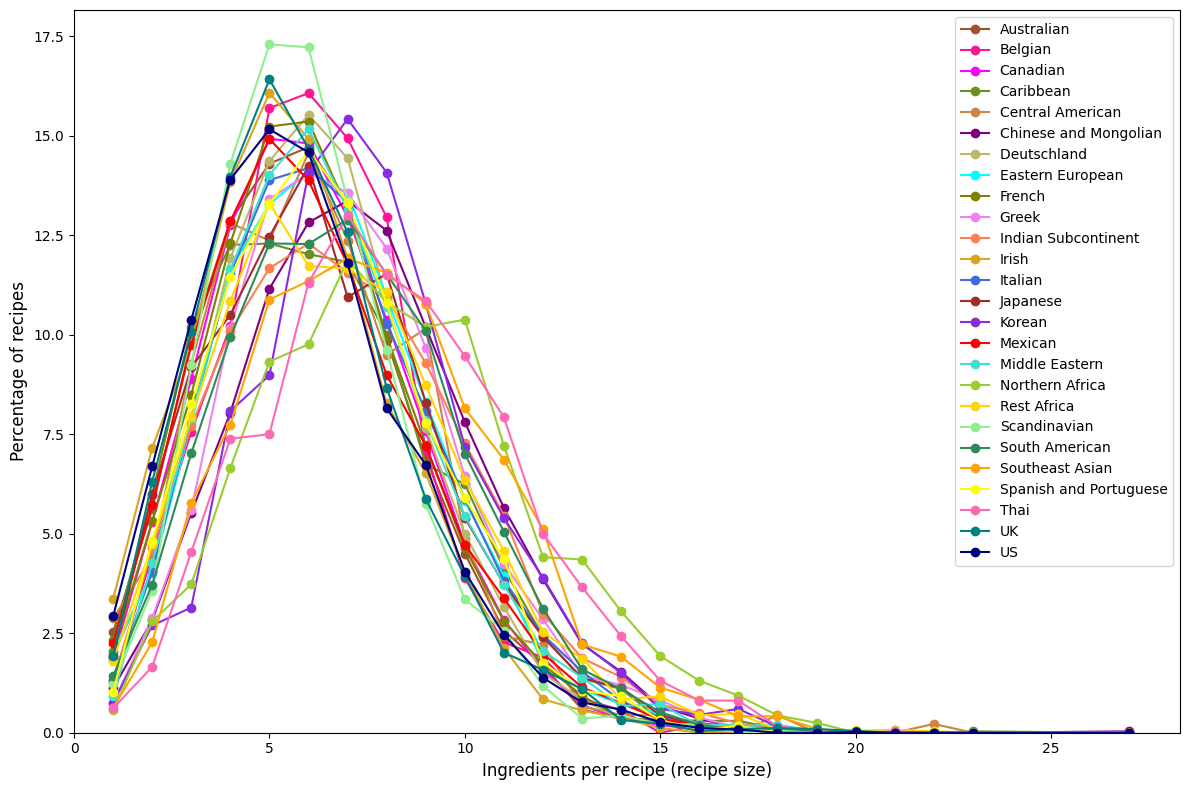

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Group the base_recipe DataFrame by 'region'
grouped_by_region = recipe.groupby('region')

# Initialize a dictionary to store the recipe sizes distribution for each region
ava_region_recipe_sizes = {}

# Loop through each region and calculate the recipe sizes distribution
for region, data in grouped_by_region:
    recipe_sizes = []
    for ingredients in data['Available Ingredients']:
        s = len(ingredients.split(','))
        recipe_sizes.append(s)
    
    unique_sizes, counts = np.unique(recipe_sizes, return_counts=True)
    total_recipes = len(recipe_sizes)
    percentages = (counts / total_recipes) * 100
    
    ava_region_recipe_sizes[region] = (unique_sizes, percentages)

# Find the superset of unique recipe sizes for all regions
all_sizes = set()
for unique_sizes, _ in ava_region_recipe_sizes.values():
    all_sizes.update(unique_sizes)

# Create the plot for all regions
plt.figure(figsize=(12, 8))

# alphabetically sorted
colors = ['sienna', 'deeppink', 'magenta', 'olivedrab', 'peru', 'purple', 'darkkhaki', 'aqua', 'olive', 'violet', 
           'coral', 'goldenrod', 'royalblue', 'brown',  'blueviolet', 'red', 'turquoise', 'yellowgreen',   
          'gold', 'lightgreen',  'seagreen',  'orange', 'yellow',  'hotpink', 'teal', 'navy']


for i, (region, (unique_sizes, percentages)) in enumerate(ava_region_recipe_sizes.items()):
    # Fill in missing recipe sizes with 0 percentages
    missing_sizes = list(all_sizes - set(unique_sizes))
    unique_sizes = np.append(unique_sizes, missing_sizes)
    percentages = np.append(percentages, [0] * len(missing_sizes))

    # Sort the data by unique recipe sizes
    sorted_indices = np.argsort(unique_sizes)
    unique_sizes = unique_sizes[sorted_indices]
    percentages = percentages[sorted_indices]

    plt.plot(unique_sizes, percentages, marker='o', color=colors[i], label=region)

plt.xlabel("Ingredients per recipe (recipe size)", fontsize=12)
plt.ylabel("Percentage of recipes", fontsize=12)
plt.legend(fontsize=10)
plt.xlim(left=0)
plt.ylim(bottom=0)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()

plt.savefig("D:/IIITD/Mansi_Thesis_Research/Foodprint/Carbon_Footprint_July23/Plots/Ingredient_analysis/Region_Recipe_size_dist_Sueatable_Mapped.jpeg", bbox_inches='tight', dpi=300)
plt.show()


C:\Users\Mansi Goel\AppData\Local\Temp\ipykernel_1196\3597075776.py:85: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


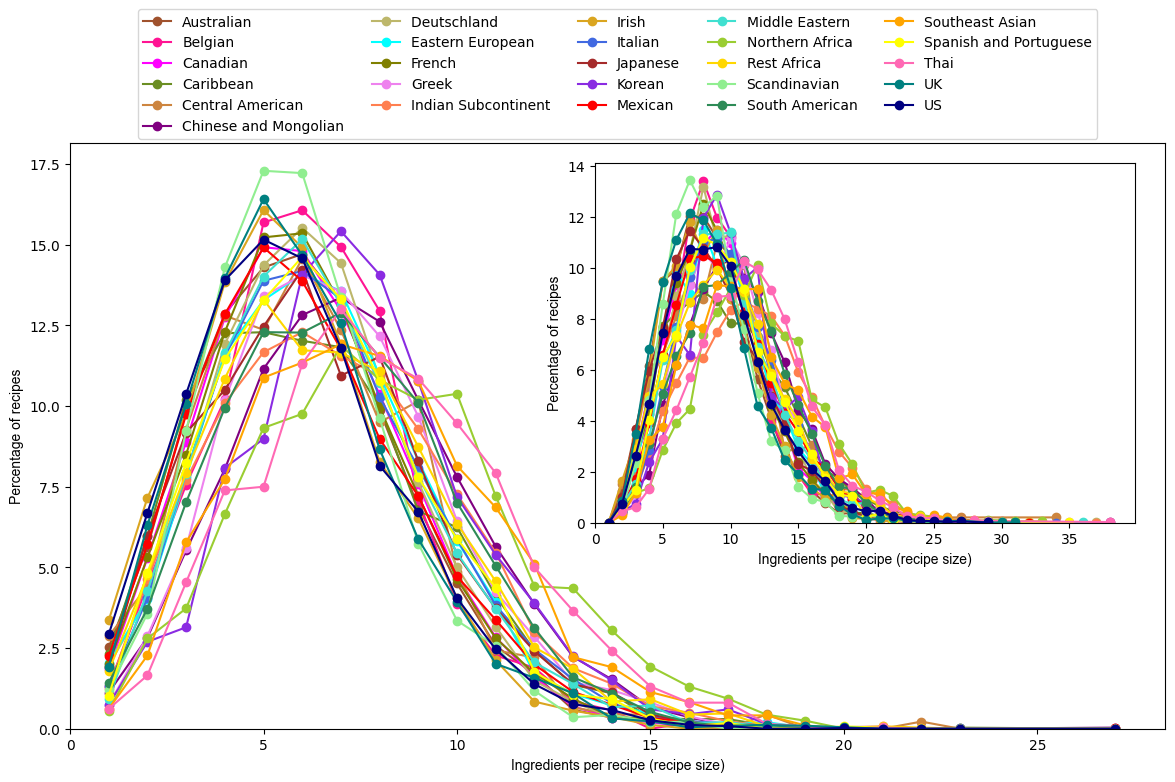

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Group the base_recipe DataFrame by 'region'
grouped_by_region = recipe.groupby('region')

# Initialize a dictionary to store the recipe sizes distribution for each region
ava_region_recipe_sizes = {}

# Loop through each region and calculate the recipe sizes distribution
for region, data in grouped_by_region:
    recipe_sizes = []
    for ingredients in data['Available Ingredients']:
        s = len(ingredients.split(','))
        recipe_sizes.append(s)
    
    unique_sizes, counts = np.unique(recipe_sizes, return_counts=True)
    total_recipes = len(recipe_sizes)
    percentages = (counts / total_recipes) * 100
    
    ava_region_recipe_sizes[region] = (unique_sizes, percentages)

# Find the superset of unique recipe sizes for all regions
all_sizes = set()
for unique_sizes, _ in ava_region_recipe_sizes.values():
    all_sizes.update(unique_sizes)

# Create the main plot for all regions
plt.figure(figsize=(12, 8))

# alphabetically sorted
colors = ['sienna', 'deeppink', 'magenta', 'olivedrab', 'peru', 'purple', 'darkkhaki', 'aqua', 'olive', 'violet', 
           'coral', 'goldenrod', 'royalblue', 'brown',  'blueviolet', 'red', 'turquoise', 'yellowgreen',   
          'gold', 'lightgreen',  'seagreen',  'orange', 'yellow',  'hotpink', 'teal', 'navy']

ax_main = plt.gca()  # Get current axis

for i, (region, (unique_sizes, percentages)) in enumerate(ava_region_recipe_sizes.items()):
    # Fill in missing recipe sizes with 0 percentages
    missing_sizes = list(all_sizes - set(unique_sizes))
    unique_sizes = np.append(unique_sizes, missing_sizes)
    percentages = np.append(percentages, [0] * len(missing_sizes))

    # Sort the data by unique recipe sizes
    sorted_indices = np.argsort(unique_sizes)
    unique_sizes = unique_sizes[sorted_indices]
    percentages = percentages[sorted_indices]

    ax_main.plot(unique_sizes, percentages, marker='o', color=colors[i], label=region)

ax_main.set_xlabel("Ingredients per recipe (recipe size)", fontsize=10, fontname="Arial")
ax_main.set_ylabel("Percentage of recipes", fontsize=10, fontname="Arial")
ax_main.legend(fontsize=10)
ax_main.set_xlim(left=0)
ax_main.set_ylim(bottom=0)

# Set the legend
ax_main.legend(loc='upper center', bbox_to_anchor=(0.5,1.24), ncol=5,fontsize=10)


# Create the inset axis for the second plot using plt.axes
ax_inset = plt.axes([0.50, 0.33, 0.45, 0.45])  # [x, y, width, height]

for i, (region, (unique_sizes, percentages)) in enumerate(region_recipe_sizes.items()):
    # Fill in missing recipe sizes with 0 percentages
    missing_sizes = list(all_sizes - set(unique_sizes))
    unique_sizes = np.append(unique_sizes, missing_sizes)
    percentages = np.append(percentages, [0] * len(missing_sizes))

    # Sort the data by unique recipe sizes
    sorted_indices = np.argsort(unique_sizes)
    unique_sizes = unique_sizes[sorted_indices]
    percentages = percentages[sorted_indices]

    ax_inset.plot(unique_sizes, percentages, marker='o', color=colors[i], label=region)

ax_inset.set_xlabel("Ingredients per recipe (recipe size)", fontsize=10, fontname="Arial")
ax_inset.set_ylabel("Percentage of recipes", fontsize=10, fontname="Arial")
ax_inset.set_xlim(left=0)
ax_inset.set_ylim(bottom=0)
# ax_inset.set_xticks(fontsize=8)
# ax_inset.set_yticks(fontsize=8)

plt.tight_layout()

plt.savefig("D:/IIITD/Mansi_Thesis_Research/Foodprint/Carbon_Footprint_July23/Plots/Ingredient_analysis/Region_Recipe_size_dist_inset.jpeg", bbox_inches='tight', dpi=300)
plt.show()


# Correlation of Frequency use of (high CF) ingredients with the median CF of cuisines.

In [49]:
med_cf = pd.read_csv('D:/IIITD/Mansi_Thesis_Research/Foodprint/Carbon_Footprint_July23/Data/RecipeCF/Region_Recipe_CF_stats.csv')

In [50]:
med_cf

Region                            Carbon_footprint_values  \
0                    World  [5.5600000000000005, 6.86, 32.06, 15.59, 2.27,...   
1           South American  [10.35, 24.99000000000001, 18.87, 9.22, 7.25, ...   
2                  Belgian  [24.48, 34.32, 19.3, 5.83, 27.83, 2.6899999999...   
3                   French  [13.05, 21.47, 31.630000000000003, 39.63000000...   
4                  Italian  [25.37, 25.62, 12.95, 13.4, 11.05, 10.47, 15.6...   
5         Eastern European  [1.98, 16.36, 22.12, 3.92, 6.1, 10.31, 6.60000...   
6                    Irish  [44.14000000000001, 47.23, 48.47, 12.32, 51.52...   
7             Scandinavian  [1.29, 6.13, 29.01, 16.48, 27.92, 17.95, 26.29...   
8             Deutschland   [25.0, 23.540000000000003, 26.870000000000005,...   
9                       UK  [11.27, 18.64, 11.27, 41.02, 11.86, 32.0100000...   
10                      US  [7.89, 29.44, 15.02, 6.0600000000000005, 2.320...   
11                   Greek  [2.27, 19.59, 20.1, 11.46, 13.3, 15.87, 16.64,...   
12        Central American  [0.32, 13.36, 3.04, 5.239999999999999, 4.6, 15...   
13              Australian  [10.67, 11.69, 18.58, 14.54, 17.85, 39.04, 19....   
14                Canadian  [22.77, 2.83, 1.61, 18.07, 22.06, 14.08, 13.61...   
15                 Mexican  [12.88, 9.75, 16.880000000000003, 23.03, 34.92...   
16         Northern Africa  [24.23, 13.260000000000002, 35.629999999999995...   
17  Spanish and Portuguese  [3.33, 22.57, 3.85, 35.04, 11.0, 9.11, 25.78, ...   
18         Southeast Asian  [52.97, 2.53, 28.58, 37.27, 24.2, 12.669999999...   
19   Chinese and Mongolian  [11.800000000000002, 13.720000000000002, 23.64...   
20             Rest Africa  [25.04, 42.66, 12.1, 5.02, 9.11, 14.2, 8.82, 9...   
21          Middle Eastern  [5.5600000000000005, 6.86, 32.06, 15.59, 2.27,...   
22                    Thai  [26.32, 14.430000000000003, 16.23, 8.120000000...   
23                Japanese  [14.86, 29.19, 8.969999999999999, 4.63, 7.37, ...   
24                  Korean  [38.15, 6.590000000000001, 24.32, 29.65, 4.779...   
25               Caribbean  [13.61, 7.42, 1.27, 7.37, 10.330000000000002, ...   
26     Indian Subcontinent  [8.17, 4.79, 9.730000000000002, 33.36, 29.95, ...   

     Count  Average_CF  Median_CF  
0   117732   17.979494     15.640  
1     7152   28.045130     26.460  
2     1058   20.407287     19.690  
3     6344   20.204590     18.940  
4    16546   20.917505     18.665  
5     2492   19.434262     17.775  
6     2501   19.170036     17.740  
7     2805   18.872378     17.600  
8     4303   18.805861     17.600  
9     4375   18.540622     17.140  
10    4994   17.843202     16.180  
11    4177   18.961726     16.170  
12     453   17.476645     16.000  
13    5799   16.661005     15.050  
14    6668   16.539555     15.010  
15   14394   16.796636     14.660  
16    1609   17.068135     14.450  
17    2838   16.280187     13.395  
18    1939   16.102573     13.390  
19    5882   15.366435     13.100  
20    2737   14.718977     11.820  
21    3896   14.504068     11.490  
22    2600   13.779923     11.435  
23    2038   13.514858     11.140  
24     668   14.986811     11.025  
25    3011   13.669472     10.940  
26    6453   12.002696      9.700

In [51]:
top_100 = world_region_df[world_region_df['Top X Ingredients'] == 100]
top_100

Region  Top X Ingredients  Ingredients Mapped  \
0                      World                100                  71   
202                  Italian                100                  69   
404                  Mexican                100                  66   
606           South American                100                  68   
808                 Canadian                100                  71   
1010                  French                100                  64   
1212              Australian                100                  72   
1414                      US                100                  65   
1616   Chinese and Mongolian                100                  64   
1818                      UK                100                  70   
2020     Indian Subcontinent                100                  59   
2222            Deutschland                 100                  65   
2424               Caribbean                100                  64   
2626                   Greek                100                  70   
2828                   Irish                100                  68   
3030          Middle Eastern                100                  66   
3232  Spanish and Portuguese                100                  67   
3434             Rest Africa                100                  70   
3636                    Thai                100                  70   
3838            Scandinavian                100                  65   
4040        Eastern European                100                  71   
4242                Japanese                100                  67   
4444         Southeast Asian                100                  66   
4646         Northern Africa                100                  66   
4848                 Belgian                100                  68   
5050        Central American                100                  67   
5252                  Korean                100                  69   

      Ingredients with High CF  Percentage of High CF Ingredients  
0                           14                          19.718310  
202                         15                          21.739130  
404                         11                          16.666667  
606                         19                          27.941176  
808                         13                          18.309859  
1010                        14                          21.875000  
1212                        12                          16.666667  
1414                        11                          16.923077  
1616                         7                          10.937500  
1818                        15                          21.428571  
2020                         4                           6.779661  
2222                        14                          21.538462  
2424                         8                          12.500000  
2626                        10                          14.285714  
2828                        18                          26.470588  
3030                         8                          12.121212  
3232                        10                          14.925373  
3434                         8                          11.428571  
3636                         5                           7.142857  
3838                        12                          18.461538  
4040                        13                          18.309859  
4242                         8                          11.940299  
4444                         8                          12.121212  
4646                         6                           9.090909  
4848                        14                          20.588235  
5050                        13                          19.402985  
5252                         8                          11.594203

In [52]:
top_100sorted_df = pd.concat([top_100.iloc[:1], top_100.iloc[1:].sort_values('Percentage of High CF Ingredients', ascending=False)])
top_100sorted_df

Region  Top X Ingredients  Ingredients Mapped  \
0                      World                100                  71   
606           South American                100                  68   
2828                   Irish                100                  68   
1010                  French                100                  64   
202                  Italian                100                  69   
2222            Deutschland                 100                  65   
1818                      UK                100                  70   
4848                 Belgian                100                  68   
5050        Central American                100                  67   
3838            Scandinavian                100                  65   
808                 Canadian                100                  71   
4040        Eastern European                100                  71   
1414                      US                100                  65   
1212              Australian                100                  72   
404                  Mexican                100                  66   
3232  Spanish and Portuguese                100                  67   
2626                   Greek                100                  70   
2424               Caribbean                100                  64   
3030          Middle Eastern                100                  66   
4444         Southeast Asian                100                  66   
4242                Japanese                100                  67   
5252                  Korean                100                  69   
3434             Rest Africa                100                  70   
1616   Chinese and Mongolian                100                  64   
4646         Northern Africa                100                  66   
3636                    Thai                100                  70   
2020     Indian Subcontinent                100                  59   

      Ingredients with High CF  Percentage of High CF Ingredients  
0                           14                          19.718310  
606                         19                          27.941176  
2828                        18                          26.470588  
1010                        14                          21.875000  
202                         15                          21.739130  
2222                        14                          21.538462  
1818                        15                          21.428571  
4848                        14                          20.588235  
5050                        13                          19.402985  
3838                        12                          18.461538  
808                         13                          18.309859  
4040                        13                          18.309859  
1414                        11                          16.923077  
1212                        12                          16.666667  
404                         11                          16.666667  
3232                        10                          14.925373  
2626                        10                          14.285714  
2424                         8                          12.500000  
3030                         8                          12.121212  
4444                         8                          12.121212  
4242                         8                          11.940299  
5252                         8                          11.594203  
3434                         8                          11.428571  
1616                         7                          10.937500  
4646                         6                           9.090909  
3636                         5                           7.142857  
2020                         4                           6.779661

In [53]:
corr_merge = pd.merge(med_cf, top_100sorted_df, on='Region')
corr_merge

Region                            Carbon_footprint_values  \
0                    World  [5.5600000000000005, 6.86, 32.06, 15.59, 2.27,...   
1           South American  [10.35, 24.99000000000001, 18.87, 9.22, 7.25, ...   
2                  Belgian  [24.48, 34.32, 19.3, 5.83, 27.83, 2.6899999999...   
3                   French  [13.05, 21.47, 31.630000000000003, 39.63000000...   
4                  Italian  [25.37, 25.62, 12.95, 13.4, 11.05, 10.47, 15.6...   
5         Eastern European  [1.98, 16.36, 22.12, 3.92, 6.1, 10.31, 6.60000...   
6                    Irish  [44.14000000000001, 47.23, 48.47, 12.32, 51.52...   
7             Scandinavian  [1.29, 6.13, 29.01, 16.48, 27.92, 17.95, 26.29...   
8             Deutschland   [25.0, 23.540000000000003, 26.870000000000005,...   
9                       UK  [11.27, 18.64, 11.27, 41.02, 11.86, 32.0100000...   
10                      US  [7.89, 29.44, 15.02, 6.0600000000000005, 2.320...   
11                   Greek  [2.27, 19.59, 20.1, 11.46, 13.3, 15.87, 16.64,...   
12        Central American  [0.32, 13.36, 3.04, 5.239999999999999, 4.6, 15...   
13              Australian  [10.67, 11.69, 18.58, 14.54, 17.85, 39.04, 19....   
14                Canadian  [22.77, 2.83, 1.61, 18.07, 22.06, 14.08, 13.61...   
15                 Mexican  [12.88, 9.75, 16.880000000000003, 23.03, 34.92...   
16         Northern Africa  [24.23, 13.260000000000002, 35.629999999999995...   
17  Spanish and Portuguese  [3.33, 22.57, 3.85, 35.04, 11.0, 9.11, 25.78, ...   
18         Southeast Asian  [52.97, 2.53, 28.58, 37.27, 24.2, 12.669999999...   
19   Chinese and Mongolian  [11.800000000000002, 13.720000000000002, 23.64...   
20             Rest Africa  [25.04, 42.66, 12.1, 5.02, 9.11, 14.2, 8.82, 9...   
21          Middle Eastern  [5.5600000000000005, 6.86, 32.06, 15.59, 2.27,...   
22                    Thai  [26.32, 14.430000000000003, 16.23, 8.120000000...   
23                Japanese  [14.86, 29.19, 8.969999999999999, 4.63, 7.37, ...   
24                  Korean  [38.15, 6.590000000000001, 24.32, 29.65, 4.779...   
25               Caribbean  [13.61, 7.42, 1.27, 7.37, 10.330000000000002, ...   
26     Indian Subcontinent  [8.17, 4.79, 9.730000000000002, 33.36, 29.95, ...   

     Count  Average_CF  Median_CF  Top X Ingredients  Ingredients Mapped  \
0   117732   17.979494     15.640                100                  71   
1     7152   28.045130     26.460                100                  68   
2     1058   20.407287     19.690                100                  68   
3     6344   20.204590     18.940                100                  64   
4    16546   20.917505     18.665                100                  69   
5     2492   19.434262     17.775                100                  71   
6     2501   19.170036     17.740                100                  68   
7     2805   18.872378     17.600                100                  65   
8     4303   18.805861     17.600                100                  65   
9     4375   18.540622     17.140                100                  70   
10    4994   17.843202     16.180                100                  65   
11    4177   18.961726     16.170                100                  70   
12     453   17.476645     16.000                100                  67   
13    5799   16.661005     15.050                100                  72   
14    6668   16.539555     15.010                100                  71   
15   14394   16.796636     14.660                100                  66   
16    1609   17.068135     14.450                100                  66   
17    2838   16.280187     13.395                100                  67   
18    1939   16.102573     13.390                100                  66   
19    5882   15.366435     13.100                100                  64   
20    2737   14.718977     11.820                100                  70   
21    3896   14.504068     11.490                100                  66   
22 

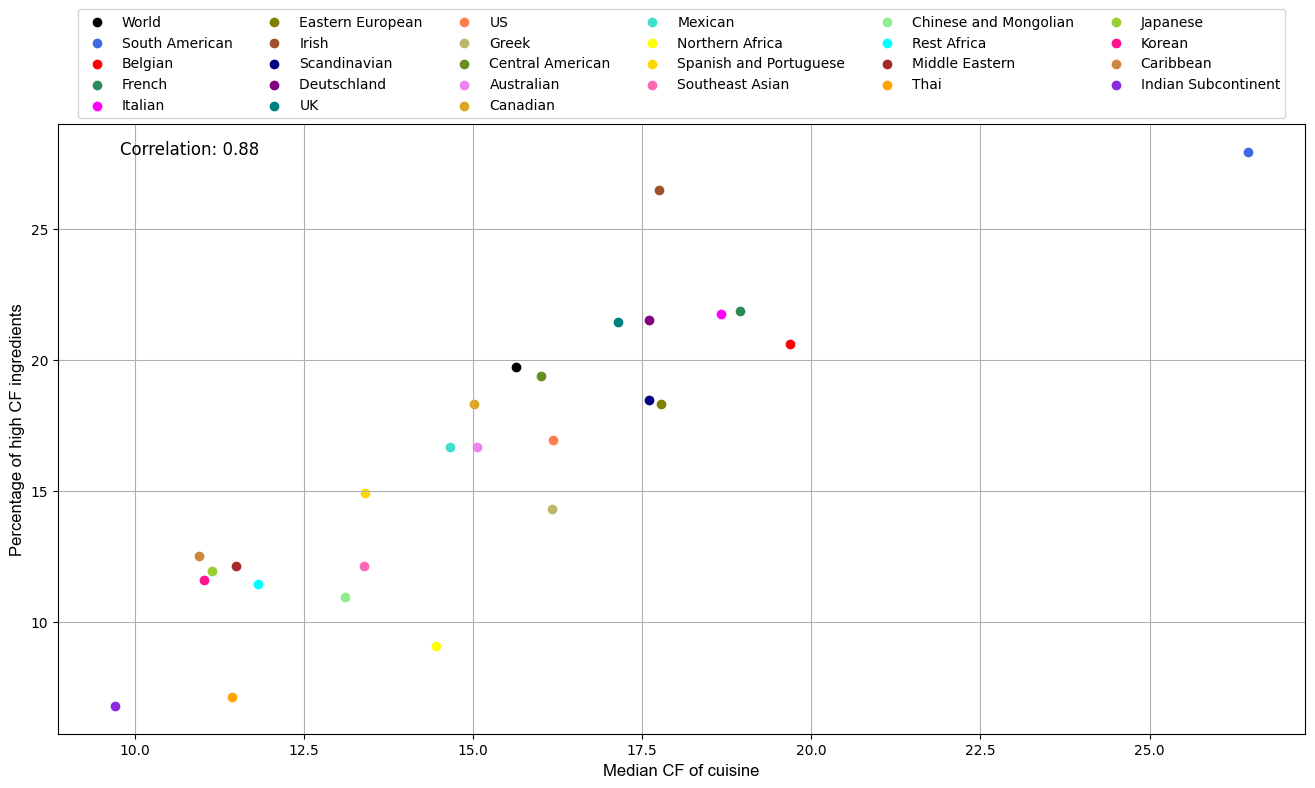

In [56]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming corr_merge_recipe is your DataFrame with the required data and 'region' is a column indicating the regions

# List of colors for each region
colors = ['black', 'royalblue', 'red', 'seagreen', 'magenta', 'olive', 'sienna', 'navy', 'purple', 'teal', 'coral',
          'darkkhaki', 'olivedrab', 'violet', 'goldenrod', 'turquoise', 'yellow', 'gold', 'hotpink', 'lightgreen',
          'aqua', 'brown', 'orange', 'yellowgreen', 'deeppink', 'peru', 'blueviolet']

# Create the plot
plt.figure(figsize=(14, 8))

for idx, region in enumerate(corr_merge['Region'].unique()):
    region_data = corr_merge[corr_merge['Region'] == region]
    plt.scatter(region_data['Median_CF'], region_data['Percentage of High CF Ingredients'],
                marker='o', color=colors[idx], label=region)
    
# # Calculate correlation coefficient
correlation_coefficient = np.corrcoef(corr_merge['Median_CF'], corr_merge['Percentage of High CF Ingredients'])[0, 1]

# # Calculate the regression line
# regression_line = np.polyfit(corr_merge['Median_CF'], corr_merge['Percentage of High CF Ingredients'], 1)
# # regression_line = np.polyfit(corr_cui['Average Recipe Size'], corr_cui['Median_CF'], 1)

# Plot the regression line
# plt.plot(corr_merge['Median_CF'], np.polyval(regression_line, corr_merge['Percentage of High CF Ingredients']),
        #  color='grey', linestyle='--', label='Correlation Line')

# Set plot labels and grid
plt.xlabel('Median CF of cuisine', fontsize=12, fontname="Arial")
plt.ylabel('Percentage of high CF ingredients', fontsize=12, fontname="Arial")
plt.grid(True)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.2), ncol=6, fontsize=10)

# Display correlation coefficient on the plot
plt.text(0.05, 0.95, f'Correlation: {correlation_coefficient:.2f}', transform=plt.gca().transAxes, fontsize=12)

plt.tight_layout()

plt.savefig("D:/IIITD/Mansi_Thesis_Research/Foodprint/Carbon_Footprint_July23/Plots/Ingredient_analysis/Correlation_plot_median_highcf100.jpeg", bbox_inches='tight', dpi=300)
plt.show()


Top 1000

In [57]:
top_1000 = world_region_df[world_region_df['Top X Ingredients'] == 1000]
top_1000

Region  Top X Ingredients  Ingredients Mapped  \
9                      World               1000                 543   
211                  Italian               1000                 579   
413                  Mexican               1000                 533   
615           South American               1000                 513   
817                 Canadian               1000                 575   
1019                  French               1000                 568   
1221              Australian               1000                 579   
1423                      US               1000                 554   
1625   Chinese and Mongolian               1000                 517   
1827                      UK               1000                 572   
2029     Indian Subcontinent               1000                 552   
2231            Deutschland                1000                 558   
2433               Caribbean               1000                 552   
2635                   Greek               1000                 565   
2837                   Irish               1000                 565   
3039          Middle Eastern               1000                 564   
3241  Spanish and Portuguese               1000                 553   
3443             Rest Africa               1000                 568   
3645                    Thai               1000                 493   
3847            Scandinavian               1000                 566   
4049        Eastern European               1000                 560   
4251                Japanese               1000                 512   
4453         Southeast Asian               1000                 538   
4655         Northern Africa               1000                 541   
4857                 Belgian               1000                 551   
5059        Central American               1000                 474   
5261                  Korean               1000                 398   

      Ingredients with High CF  Percentage of High CF Ingredients  
9                          121                          22.283610  
211                        138                          23.834197  
413                        115                          21.575985  
615                        131                          25.536062  
817                         94                          16.347826  
1019                       142                          25.000000  
1221                       112                          19.343696  
1423                       143                          25.812274  
1625                        91                          17.601547  
1827                       118                          20.629371  
2029                        83                          15.036232  
2231                       135                          24.193548  
2433                        95                          17.210145  
2635                       114                          20.176991  
2837                       130                          23.008850  
3039                       103                          18.262411  
3241                       125                          22.603978  
3443                       104                          18.309859  
3645                        66                          13.387424  
3847                       119                          21.024735  
4049                       138                          24.642857  
4251                        98                          19.140625  
4453                       105                          19.516729  
4655                       102                          18.853974  
4857                       115                          20.871143  
5059                       106                          22.362869  
5261                        79                          19.849246

In [58]:
top_1000sorted_df = pd.concat([top_1000.iloc[:1], top_1000.iloc[1:].sort_values('Percentage of High CF Ingredients', ascending=False)])
top_1000sorted_df

Region  Top X Ingredients  Ingredients Mapped  \
9                      World               1000                 543   
1423                      US               1000                 554   
615           South American               1000                 513   
1019                  French               1000                 568   
4049        Eastern European               1000                 560   
2231            Deutschland                1000                 558   
211                  Italian               1000                 579   
2837                   Irish               1000                 565   
3241  Spanish and Portuguese               1000                 553   
5059        Central American               1000                 474   
413                  Mexican               1000                 533   
3847            Scandinavian               1000                 566   
4857                 Belgian               1000                 551   
1827                      UK               1000                 572   
2635                   Greek               1000                 565   
5261                  Korean               1000                 398   
4453         Southeast Asian               1000                 538   
1221              Australian               1000                 579   
4251                Japanese               1000                 512   
4655         Northern Africa               1000                 541   
3443             Rest Africa               1000                 568   
3039          Middle Eastern               1000                 564   
1625   Chinese and Mongolian               1000                 517   
2433               Caribbean               1000                 552   
817                 Canadian               1000                 575   
2029     Indian Subcontinent               1000                 552   
3645                    Thai               1000                 493   

      Ingredients with High CF  Percentage of High CF Ingredients  
9                          121                          22.283610  
1423                       143                          25.812274  
615                        131                          25.536062  
1019                       142                          25.000000  
4049                       138                          24.642857  
2231                       135                          24.193548  
211                        138                          23.834197  
2837                       130                          23.008850  
3241                       125                          22.603978  
5059                       106                          22.362869  
413                        115                          21.575985  
3847                       119                          21.024735  
4857                       115                          20.871143  
1827                       118                          20.629371  
2635                       114                          20.176991  
5261                        79                          19.849246  
4453                       105                          19.516729  
1221                       112                          19.343696  
4251                        98                          19.140625  
4655                       102                          18.853974  
3443                       104                          18.309859  
3039                       103                          18.262411  
1625                        91                          17.601547  
2433                        95                          17.210145  
817                         94                          16.347826  
2029                        83                          15.036232  
3645                        66                          13.387424

In [59]:
corr_merge_1k = pd.merge(med_cf, top_1000sorted_df, on='Region')
corr_merge_1k

Region                            Carbon_footprint_values  \
0                    World  [5.5600000000000005, 6.86, 32.06, 15.59, 2.27,...   
1           South American  [10.35, 24.99000000000001, 18.87, 9.22, 7.25, ...   
2                  Belgian  [24.48, 34.32, 19.3, 5.83, 27.83, 2.6899999999...   
3                   French  [13.05, 21.47, 31.630000000000003, 39.63000000...   
4                  Italian  [25.37, 25.62, 12.95, 13.4, 11.05, 10.47, 15.6...   
5         Eastern European  [1.98, 16.36, 22.12, 3.92, 6.1, 10.31, 6.60000...   
6                    Irish  [44.14000000000001, 47.23, 48.47, 12.32, 51.52...   
7             Scandinavian  [1.29, 6.13, 29.01, 16.48, 27.92, 17.95, 26.29...   
8             Deutschland   [25.0, 23.540000000000003, 26.870000000000005,...   
9                       UK  [11.27, 18.64, 11.27, 41.02, 11.86, 32.0100000...   
10                      US  [7.89, 29.44, 15.02, 6.0600000000000005, 2.320...   
11                   Greek  [2.27, 19.59, 20.1, 11.46, 13.3, 15.87, 16.64,...   
12        Central American  [0.32, 13.36, 3.04, 5.239999999999999, 4.6, 15...   
13              Australian  [10.67, 11.69, 18.58, 14.54, 17.85, 39.04, 19....   
14                Canadian  [22.77, 2.83, 1.61, 18.07, 22.06, 14.08, 13.61...   
15                 Mexican  [12.88, 9.75, 16.880000000000003, 23.03, 34.92...   
16         Northern Africa  [24.23, 13.260000000000002, 35.629999999999995...   
17  Spanish and Portuguese  [3.33, 22.57, 3.85, 35.04, 11.0, 9.11, 25.78, ...   
18         Southeast Asian  [52.97, 2.53, 28.58, 37.27, 24.2, 12.669999999...   
19   Chinese and Mongolian  [11.800000000000002, 13.720000000000002, 23.64...   
20             Rest Africa  [25.04, 42.66, 12.1, 5.02, 9.11, 14.2, 8.82, 9...   
21          Middle Eastern  [5.5600000000000005, 6.86, 32.06, 15.59, 2.27,...   
22                    Thai  [26.32, 14.430000000000003, 16.23, 8.120000000...   
23                Japanese  [14.86, 29.19, 8.969999999999999, 4.63, 7.37, ...   
24                  Korean  [38.15, 6.590000000000001, 24.32, 29.65, 4.779...   
25               Caribbean  [13.61, 7.42, 1.27, 7.37, 10.330000000000002, ...   
26     Indian Subcontinent  [8.17, 4.79, 9.730000000000002, 33.36, 29.95, ...   

     Count  Average_CF  Median_CF  Top X Ingredients  Ingredients Mapped  \
0   117732   17.979494     15.640               1000                 543   
1     7152   28.045130     26.460               1000                 513   
2     1058   20.407287     19.690               1000                 551   
3     6344   20.204590     18.940               1000                 568   
4    16546   20.917505     18.665               1000                 579   
5     2492   19.434262     17.775               1000                 560   
6     2501   19.170036     17.740               1000                 565   
7     2805   18.872378     17.600               1000                 566   
8     4303   18.805861     17.600               1000                 558   
9     4375   18.540622     17.140               1000                 572   
10    4994   17.843202     16.180               1000                 554   
11    4177   18.961726     16.170               1000                 565   
12     453   17.476645     16.000               1000                 474   
13    5799   16.661005     15.050               1000                 579   
14    6668   16.539555     15.010               1000                 575   
15   14394   16.796636     14.660               1000                 533   
16    1609   17.068135     14.450               1000                 541   
17    2838   16.280187     13.395               1000                 553   
18    1939   16.102573     13.390               1000                 538   
19    5882   15.366435     13.100               1000                 517   
20    2737   14.718977     11.820               1000                 568   
21    3896   14.504068     11.490               1000                 564   
22 

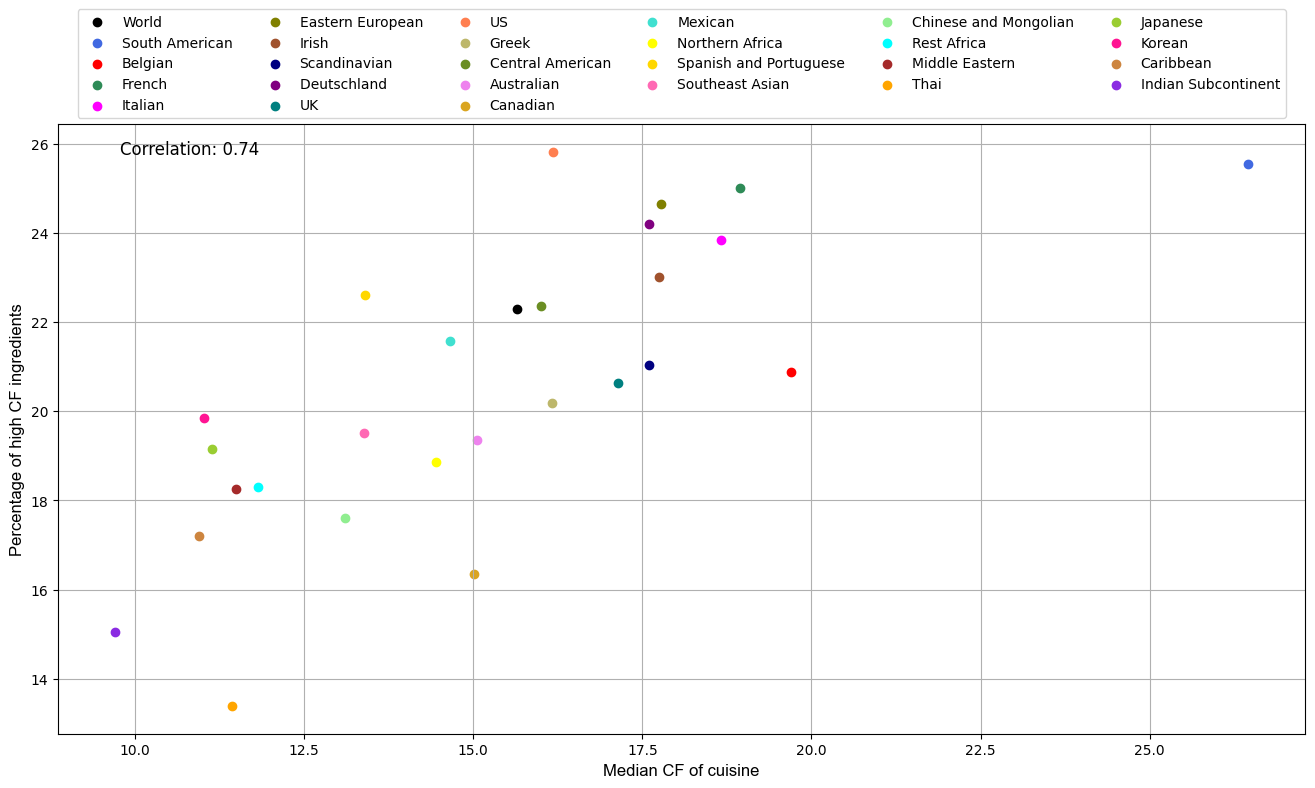

In [60]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming corr_merge_recipe is your DataFrame with the required data and 'region' is a column indicating the regions

# List of colors for each region
colors = ['black', 'royalblue', 'red', 'seagreen', 'magenta', 'olive', 'sienna', 'navy', 'purple', 'teal', 'coral',
          'darkkhaki', 'olivedrab', 'violet', 'goldenrod', 'turquoise', 'yellow', 'gold', 'hotpink', 'lightgreen',
          'aqua', 'brown', 'orange', 'yellowgreen', 'deeppink', 'peru', 'blueviolet']

# Create the plot
plt.figure(figsize=(14, 8))

for idx, region in enumerate(corr_merge_1k['Region'].unique()):
    region_data = corr_merge_1k[corr_merge_1k['Region'] == region]
    plt.scatter(region_data['Median_CF'], region_data['Percentage of High CF Ingredients'],
                marker='o', color=colors[idx], label=region)
    
    # # Calculate correlation coefficient for the current region
    # correlation_coefficient = np.corrcoef(region_data['Median_CF'], region_data['Percentage of High CF Ingredients'])[0, 1]

    # # Display correlation coefficient for the current region
    # plt.text(region_data['Median_CF'].max(), region_data['Percentage of High CF Ingredients'].max(), f'Correlation: {correlation_coefficient:.2f}', fontsize=10)

# Calculate correlation coefficient
correlation_coefficient = np.corrcoef(corr_merge_1k['Median_CF'], corr_merge_1k['Percentage of High CF Ingredients'])[0, 1]

# # Calculate the regression line
# regression_line = np.polyfit(corr_merge_1k['Median_CF'], corr_merge_1k['Percentage of High CF Ingredients'], 1)

# # Plot the regression line
# plt.plot(corr_merge_1k['Median_CF'], np.polyval(regression_line, corr_merge_1k['Percentage of High CF Ingredients']),
#          color='grey', linestyle='--', label='Correlation Line')

# Set plot labels and grid
plt.xlabel('Median CF of cuisine', fontsize=12, fontname="Arial")
plt.ylabel('Percentage of high CF ingredients', fontsize=12, fontname="Arial")
plt.grid(True)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.2), ncol=6, fontsize=10)

# Display correlation coefficient on the plot
plt.text(0.05, 0.95, f'Correlation: {correlation_coefficient:.2f}', transform=plt.gca().transAxes, fontsize=12)

plt.tight_layout()

plt.savefig("D:/IIITD/Mansi_Thesis_Research/Foodprint/Carbon_Footprint_July23/Plots/Ingredient_analysis/Correlation_plot_median_highcf1000.jpeg", bbox_inches='tight', dpi=300)
plt.show()


Top 10k

In [61]:
top_10k = world_region_df[world_region_df['Top X Ingredients'] == 10000]
top_10k

Region  Top X Ingredients  Ingredients Mapped  \
99                     World              10000                4298   
301                  Italian              10000                2383   
503                  Mexican              10000                2085   
705           South American              10000                1520   
907                 Canadian              10000                1644   
1109                  French              10000                1606   
1311              Australian              10000                1585   
1513                      US              10000                1373   
1715   Chinese and Mongolian              10000                1302   
1917                      UK              10000                1346   
2119     Indian Subcontinent              10000                1301   
2321            Deutschland               10000                1221   
2523               Caribbean              10000                1087   
2725                   Greek              10000                1082   
2927                   Irish              10000                1020   
3129          Middle Eastern              10000                1026   
3331  Spanish and Portuguese              10000                 980   
3533             Rest Africa              10000                 994   
3735                    Thai              10000                 816   
3937            Scandinavian              10000                 914   
4139        Eastern European              10000                 869   
4341                Japanese              10000                 802   
4543         Southeast Asian              10000                 808   
4745         Northern Africa              10000                 646   
4947                 Belgian              10000                 621   
5149        Central American              10000                 474   
5351                  Korean              10000                 398   

      Ingredients with High CF  Percentage of High CF Ingredients  
99                        1120                          26.058632  
301                        636                          26.689047  
503                        549                          26.330935  
705                        464                          30.526316  
907                        328                          19.951338  
1109                       382                          23.785803  
1311                       333                          21.009464  
1513                       357                          26.001457  
1715                       279                          21.428571  
1917                       317                          23.551263  
2119                       228                          17.524981  
2321                       306                          25.061425  
2523                       211                          19.411224  
2725                       240                          22.181146  
2927                       234                          22.941176  
3129                       198                          19.298246  
3331                       242                          24.693878  
3533                       212                          21.327968  
3735                       138                          16.911765  
3937                       202                          22.100656  
4139                       219                          25.201381  
4341                       155                          19.326683  
4543                       170                          21.039604  
4745                       125                          19.349845  
4947                       134                          21.578100  
5149                       106                          22.362869  
5351                        79                          19.849246

In [62]:
top_10ksorted_df = pd.concat([top_10k.iloc[:1], top_10k.iloc[1:].sort_values('Percentage of High CF Ingredients', ascending=False)])
top_10ksorted_df

Region  Top X Ingredients  Ingredients Mapped  \
99                     World              10000                4298   
705           South American              10000                1520   
301                  Italian              10000                2383   
503                  Mexican              10000                2085   
1513                      US              10000                1373   
4139        Eastern European              10000                 869   
2321            Deutschland               10000                1221   
3331  Spanish and Portuguese              10000                 980   
1109                  French              10000                1606   
1917                      UK              10000                1346   
2927                   Irish              10000                1020   
5149        Central American              10000                 474   
2725                   Greek              10000                1082   
3937            Scandinavian              10000                 914   
4947                 Belgian              10000                 621   
1715   Chinese and Mongolian              10000                1302   
3533             Rest Africa              10000                 994   
4543         Southeast Asian              10000                 808   
1311              Australian              10000                1585   
907                 Canadian              10000                1644   
5351                  Korean              10000                 398   
2523               Caribbean              10000                1087   
4745         Northern Africa              10000                 646   
4341                Japanese              10000                 802   
3129          Middle Eastern              10000                1026   
2119     Indian Subcontinent              10000                1301   
3735                    Thai              10000                 816   

      Ingredients with High CF  Percentage of High CF Ingredients  
99                        1120                          26.058632  
705                        464                          30.526316  
301                        636                          26.689047  
503                        549                          26.330935  
1513                       357                          26.001457  
4139                       219                          25.201381  
2321                       306                          25.061425  
3331                       242                          24.693878  
1109                       382                          23.785803  
1917                       317                          23.551263  
2927                       234                          22.941176  
5149                       106                          22.362869  
2725                       240                          22.181146  
3937                       202                          22.100656  
4947                       134                          21.578100  
1715                       279                          21.428571  
3533                       212                          21.327968  
4543                       170                          21.039604  
1311                       333                          21.009464  
907                        328                          19.951338  
5351                        79                          19.849246  
2523                       211                          19.411224  
4745                       125                          19.349845  
4341                       155                          19.326683  
3129                       198                          19.298246  
2119                       228                          17.524981  
3735                       138                          16.911765

In [63]:
corr_merge_10k = pd.merge(med_cf, top_10ksorted_df, on='Region')
corr_merge_10k

Region                            Carbon_footprint_values  \
0                    World  [5.5600000000000005, 6.86, 32.06, 15.59, 2.27,...   
1           South American  [10.35, 24.99000000000001, 18.87, 9.22, 7.25, ...   
2                  Belgian  [24.48, 34.32, 19.3, 5.83, 27.83, 2.6899999999...   
3                   French  [13.05, 21.47, 31.630000000000003, 39.63000000...   
4                  Italian  [25.37, 25.62, 12.95, 13.4, 11.05, 10.47, 15.6...   
5         Eastern European  [1.98, 16.36, 22.12, 3.92, 6.1, 10.31, 6.60000...   
6                    Irish  [44.14000000000001, 47.23, 48.47, 12.32, 51.52...   
7             Scandinavian  [1.29, 6.13, 29.01, 16.48, 27.92, 17.95, 26.29...   
8             Deutschland   [25.0, 23.540000000000003, 26.870000000000005,...   
9                       UK  [11.27, 18.64, 11.27, 41.02, 11.86, 32.0100000...   
10                      US  [7.89, 29.44, 15.02, 6.0600000000000005, 2.320...   
11                   Greek  [2.27, 19.59, 20.1, 11.46, 13.3, 15.87, 16.64,...   
12        Central American  [0.32, 13.36, 3.04, 5.239999999999999, 4.6, 15...   
13              Australian  [10.67, 11.69, 18.58, 14.54, 17.85, 39.04, 19....   
14                Canadian  [22.77, 2.83, 1.61, 18.07, 22.06, 14.08, 13.61...   
15                 Mexican  [12.88, 9.75, 16.880000000000003, 23.03, 34.92...   
16         Northern Africa  [24.23, 13.260000000000002, 35.629999999999995...   
17  Spanish and Portuguese  [3.33, 22.57, 3.85, 35.04, 11.0, 9.11, 25.78, ...   
18         Southeast Asian  [52.97, 2.53, 28.58, 37.27, 24.2, 12.669999999...   
19   Chinese and Mongolian  [11.800000000000002, 13.720000000000002, 23.64...   
20             Rest Africa  [25.04, 42.66, 12.1, 5.02, 9.11, 14.2, 8.82, 9...   
21          Middle Eastern  [5.5600000000000005, 6.86, 32.06, 15.59, 2.27,...   
22                    Thai  [26.32, 14.430000000000003, 16.23, 8.120000000...   
23                Japanese  [14.86, 29.19, 8.969999999999999, 4.63, 7.37, ...   
24                  Korean  [38.15, 6.590000000000001, 24.32, 29.65, 4.779...   
25               Caribbean  [13.61, 7.42, 1.27, 7.37, 10.330000000000002, ...   
26     Indian Subcontinent  [8.17, 4.79, 9.730000000000002, 33.36, 29.95, ...   

     Count  Average_CF  Median_CF  Top X Ingredients  Ingredients Mapped  \
0   117732   17.979494     15.640              10000                4298   
1     7152   28.045130     26.460              10000                1520   
2     1058   20.407287     19.690              10000                 621   
3     6344   20.204590     18.940              10000                1606   
4    16546   20.917505     18.665              10000                2383   
5     2492   19.434262     17.775              10000                 869   
6     2501   19.170036     17.740              10000                1020   
7     2805   18.872378     17.600              10000                 914   
8     4303   18.805861     17.600              10000                1221   
9     4375   18.540622     17.140              10000                1346   
10    4994   17.843202     16.180              10000                1373   
11    4177   18.961726     16.170              10000                1082   
12     453   17.476645     16.000              10000                 474   
13    5799   16.661005     15.050              10000                1585   
14    6668   16.539555     15.010              10000                1644   
15   14394   16.796636     14.660              10000                2085   
16    1609   17.068135     14.450              10000                 646   
17    2838   16.280187     13.395              10000                 980   
18    1939   16.102573     13.390              10000                 808   
19    5882   15.366435     13.100              10000                1302   
20    2737   14.718977     11.820              10000                 994   
21    3896   14.504068     11.490              10000                1026   
22 

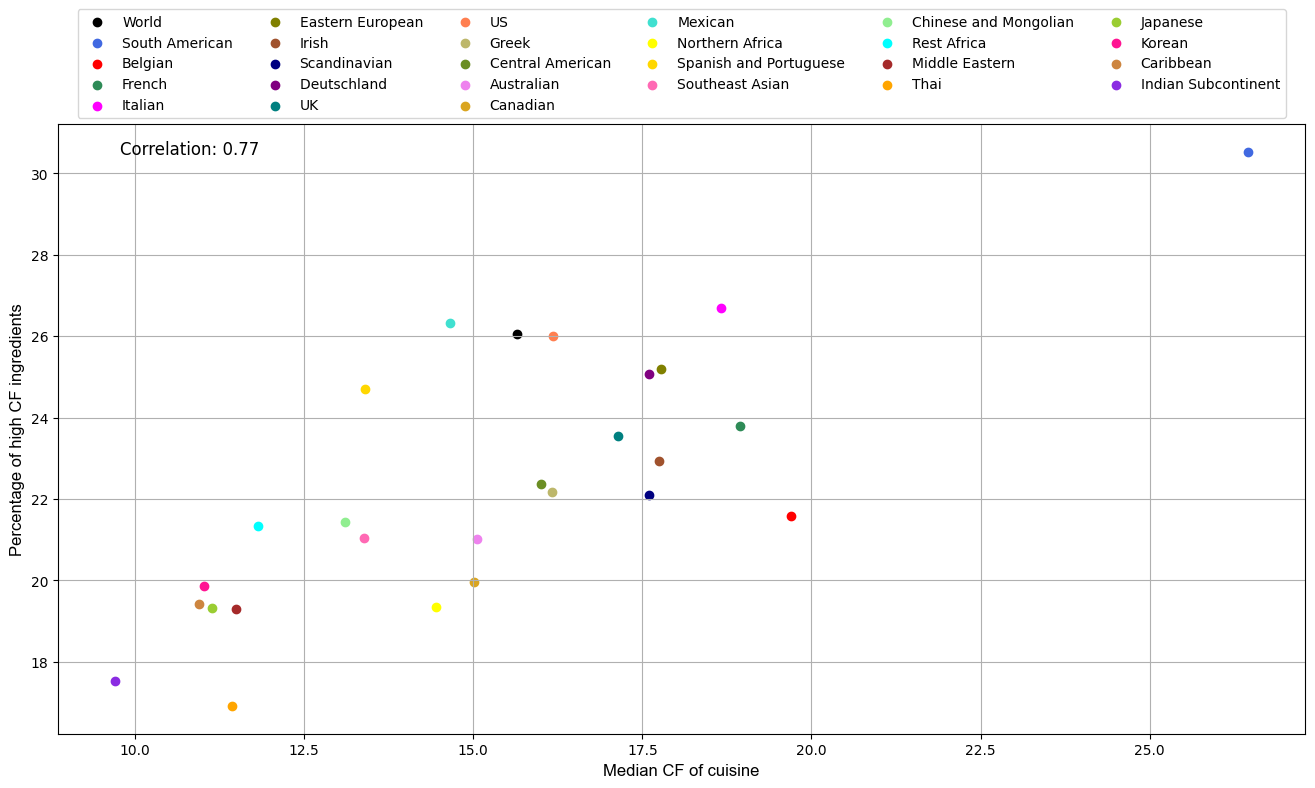

In [64]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming corr_merge_recipe is your DataFrame with the required data and 'region' is a column indicating the regions

# List of colors for each region
colors = ['black', 'royalblue', 'red', 'seagreen', 'magenta', 'olive', 'sienna', 'navy', 'purple', 'teal', 'coral',
          'darkkhaki', 'olivedrab', 'violet', 'goldenrod', 'turquoise', 'yellow', 'gold', 'hotpink', 'lightgreen',
          'aqua', 'brown', 'orange', 'yellowgreen', 'deeppink', 'peru', 'blueviolet']

# Create the plot
plt.figure(figsize=(14, 8))

for idx, region in enumerate(corr_merge_10k['Region'].unique()):
    region_data = corr_merge_10k[corr_merge_10k['Region'] == region]
    plt.scatter(region_data['Median_CF'], region_data['Percentage of High CF Ingredients'],
                marker='o', color=colors[idx], label=region)
   
# Calculate correlation coefficient
correlation_coefficient = np.corrcoef(corr_merge_10k['Median_CF'], corr_merge_10k['Percentage of High CF Ingredients'])[0, 1]

# # Calculate the regression line
# regression_line = np.polyfit(corr_merge_10k['Median_CF'], corr_merge_10k['Percentage of High CF Ingredients'], 1)

# # Plot the regression line
# plt.plot(corr_merge_10k['Median_CF'], np.polyval(regression_line, corr_merge_10k['Percentage of High CF Ingredients']),
#          color='grey', linestyle='--', label='Correlation Line')

# Set plot labels and grid
plt.xlabel('Median CF of cuisine', fontsize=12, fontname="Arial")
plt.ylabel('Percentage of high CF ingredients', fontsize=12, fontname="Arial")
plt.grid(True)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.2), ncol=6, fontsize=10)

# Display correlation coefficient on the plot
plt.text(0.05, 0.95, f'Correlation: {correlation_coefficient:.2f}', transform=plt.gca().transAxes, fontsize=12)

plt.tight_layout()

plt.savefig("D:/IIITD/Mansi_Thesis_Research/Foodprint/Carbon_Footprint_July23/Plots/Ingredient_analysis/Correlation_plot_median_highcf10k.jpeg", bbox_inches='tight', dpi=300)
plt.show()


c:\Python311\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Python311\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Python311\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Python311\Lib\site-packages\scipy\stats\_stats_mstats_common.py:182: RuntimeWarning: invalid value encountered in scalar divide
  slope = ssxym / ssxm
c:\Python311\Lib\site-packages\scipy\stats\_stats_mstats_common.py:196: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
c:\Python311\Lib\site-packages\scipy\stats\_stats_mstats_common.py:199: RuntimeWarning: invalid value encountered in scalar divide
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)


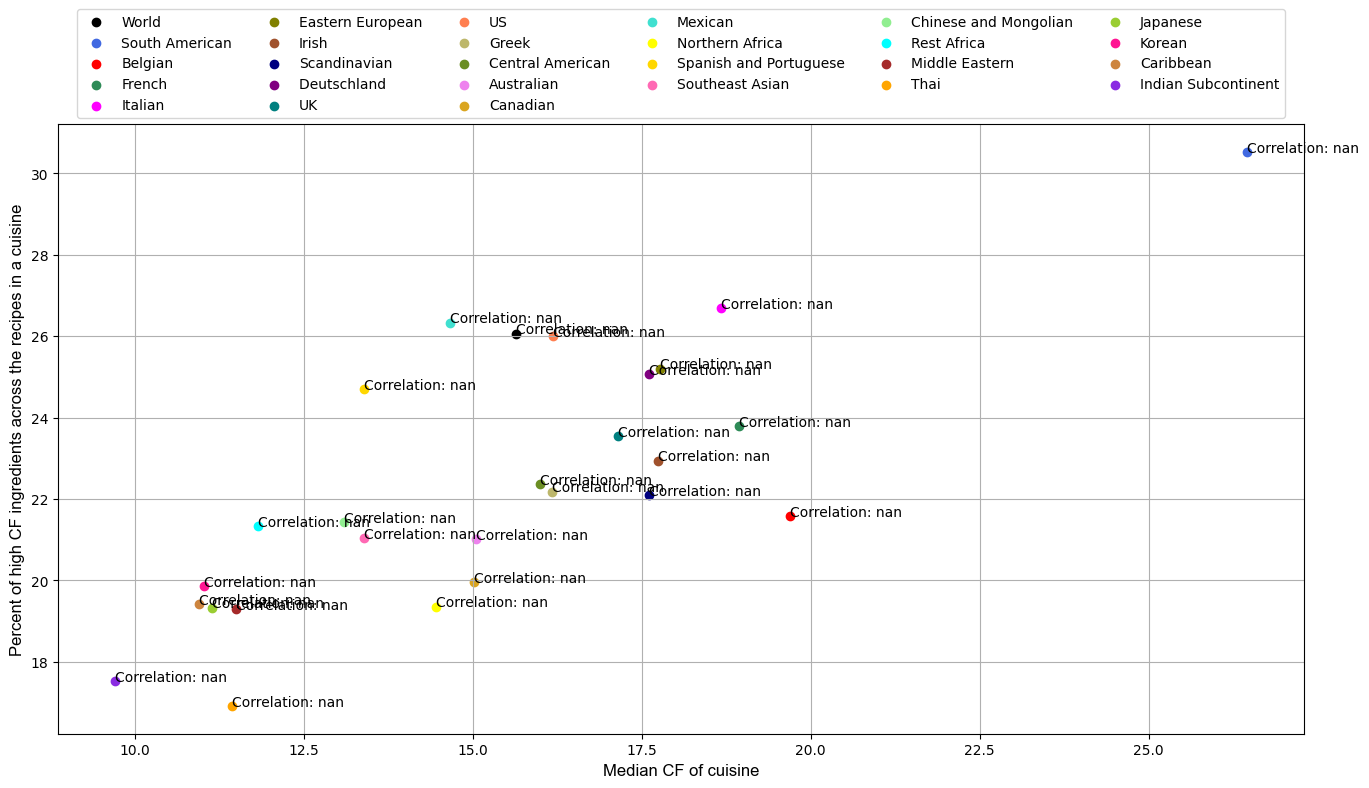

In [65]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

# Assuming corr_merge_10k is your DataFrame with the required data and 'region' is a column indicating the regions

# List of colors for each region
colors = ['black', 'royalblue', 'red', 'seagreen', 'magenta', 'olive', 'sienna', 'navy', 'purple', 'teal', 'coral',
          'darkkhaki', 'olivedrab', 'violet', 'goldenrod', 'turquoise', 'yellow', 'gold', 'hotpink', 'lightgreen',
          'aqua', 'brown', 'orange', 'yellowgreen', 'deeppink', 'peru', 'blueviolet']

# Create the plot
plt.figure(figsize=(14, 8))

for idx, region in enumerate(corr_merge_10k['Region'].unique()):
    region_data = corr_merge_10k[corr_merge_10k['Region'] == region]
    plt.scatter(region_data['Median_CF'], region_data['Percentage of High CF Ingredients'],
                marker='o', color=colors[idx], label=region)
    
    # Calculate correlation coefficient for the current region
    correlation_coefficient = np.corrcoef(region_data['Median_CF'], region_data['Percentage of High CF Ingredients'])[0, 1]
    
    # Fit a linear regression line
    slope, intercept, _, _, _ = linregress(region_data['Median_CF'], region_data['Percentage of High CF Ingredients'])
    x_vals = np.linspace(region_data['Median_CF'].min(), region_data['Median_CF'].max(), 100)
    y_vals = slope * x_vals + intercept
    plt.plot(x_vals, y_vals, color=colors[idx], linestyle='--')

    # Display correlation coefficient for the current region
    plt.text(region_data['Median_CF'].max(), region_data['Percentage of High CF Ingredients'].max(),
             f'Correlation: {correlation_coefficient:.2f}', fontsize=10)

# Set plot labels and grid
plt.xlabel('Median CF of cuisine', fontsize=12, fontname="Arial")
plt.ylabel('Percent of high CF ingredients across the recipes in a cuisine', fontsize=12, fontname="Arial")
plt.grid(True)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.2), ncol=6, fontsize=10)

plt.tight_layout()

# Show the plot
plt.show()


# Correlation of % of high CF ingredients across the recipes in a cuisine with the median CF of cuisines.

In [66]:
world_region_high_cf = world_region_high_cf.rename(columns={'region':'Region'})
world_region_high_cf

Region                              Percentage of High CF  \
0                    World  [0.0, 0.0, 33.33333333333333, 12.5, 0.0, 20.0,...   
1                  Belgian  [28.57142857142857, 22.22222222222222, 40.0, 2...   
8                   French  [40.0, 40.0, 57.14285714285714, 44.44444444444...   
24                      UK  [50.0, 50.0, 50.0, 50.0, 14.285714285714285, 5...   
11                   Irish  [50.0, 33.33333333333333, 15.384615384615385, ...   
19            Scandinavian  [0.0, 33.33333333333333, 57.14285714285714, 12...   
6             Deutschland   [30.0, 33.33333333333333, 42.857142857142854, ...   
12                 Italian  [25.0, 6.666666666666667, 0.0, 12.5, 33.333333...   
20          South American  [25.0, 42.857142857142854, 66.66666666666666, ...   
7         Eastern European  [0.0, 16.666666666666664, 33.33333333333333, 0...   
4         Central American  [0.0, 50.0, 0.0, 0.0, 0.0, 16.666666666666664,...   
25                      US  [25.0, 100.0, 16.666666666666664, 33.333333333...   
0               Australian  [33.33333333333333, 25.0, 10.0, 14.28571428571...   
2                 Canadian  [14.285714285714285, 0.0, 0.0, 12.5, 20.0, 25....   
9                    Greek  [0.0, 11.11111111111111, 11.11111111111111, 14...   
15                 Mexican  [33.33333333333333, 0.0, 20.0, 12.5, 60.0, 0.0...   
22  Spanish and Portuguese  [0.0, 16.666666666666664, 0.0, 25.0, 20.0, 25....   
18             Rest Africa  [12.5, 25.0, 0.0, 0.0, 0.0, 0.0, 0.0, 25.0, 0....   
16          Middle Eastern  [0.0, 0.0, 33.33333333333333, 12.5, 0.0, 20.0,...   
21         Southeast Asian  [36.36363636363637, 0.0, 10.0, 20.0, 28.571428...   
17         Northern Africa  [6.25, 0.0, 16.666666666666664, 0.0, 0.0, 6.66...   
3                Caribbean  [11.11111111111111, 0.0, 0.0, 0.0, 0.0, 9.0909...   
23                    Thai  [11.11111111111111, 0.0, 0.0, 0.0, 0.0, 11.111...   
5    Chinese and Mongolian  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 16.6666666...   
10     Indian Subcontinent  [11.11111111111111, 0.0, 0.0, 22.2222222222222...   
13                Japanese  [33.33333333333333, 33.33333333333333, 0.0, 0....   
14                  Korean  [13.333333333333334, 0.0, 16.666666666666664, ...   

    Recipe Count                                   Count of High CF  \
0         117732  [0, 0, 2, 1, 0, 1, 1, 1, 0, 1, 2, 0, 2, 1, 0, ...   
1           1058  [2, 2, 2, 1, 3, 0, 2, 0, 2, 2, 3, 2, 2, 5, 0, ...   
8           6344  [2, 2, 4, 4, 2, 2, 2, 2, 3, 3, 2, 4, 0, 2, 2, ...   
24          4375  [1, 1, 1, 2, 1, 4, 1, 1, 2, 2, 1, 1, 1, 2, 4, ...   
11          2501  [3, 3, 2, 1, 4, 1, 1, 3, 1, 3, 0, 1, 2, 1, 2, ...   
19          2805  [0, 1, 4, 1, 3, 2, 3, 0, 1, 3, 2, 2, 3, 2, 2, ...   
6           4303  [3, 2, 3, 2, 2, 2, 2, 2, 4, 3, 2, 3, 0, 1, 0, ...   
12         16546  [2, 1, 0, 1, 1, 0, 1, 2, 1, 1, 2, 1, 0, 1, 4, ...   
20          7152  [1, 3, 2, 1, 0, 1, 1, 1, 1, 2, 0, 2, 0, 0, 0, ...   
7           2492  [0, 1, 2, 0, 0, 0, 0, 1, 3, 1, 0, 0, 0, 2, 1, ...   
4            453  [0, 2, 0, 0, 0, 1, 0, 0, 2, 2, 1, 2, 1, 1, 4, ...   
25          4994  [1, 2, 1, 1, 0, 0, 2, 0, 1, 0, 3, 2, 2, 0, 0, ...   
0           5799  [1, 1, 1, 1, 1, 5, 1, 2, 2, 0, 1, 2, 1, 0, 0, ...   
2           6668  [1, 0, 0, 1, 1, 1, 1, 0, 1, 3, 4, 2, 0, 1, 3, ...   
9           4177  [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, ...   
15         14394  [1, 0, 1, 1, 3, 0, 3, 1, 0, 0, 2, 0, 0, 2, 1, ...   
22          2838  [0, 1, 0, 2, 1, 1, 1, 1, 0, 1, 0, 2, 3, 0, 1, ...   
18          2737  [1, 2, 0, 0, 0, 0, 0, 1, 0, 1, 0, 2, 1, 1, 1, ...   
16          3896  [0, 0, 2, 1, 0, 1, 1, 1, 0, 1, 2, 0, 2, 1, 0, ...   
21          1939  [4, 0, 1, 2, 2, 1, 2, 1, 4, 1, 0, 0, 2, 1, 2, ...   
17          1609  [1, 0, 2, 0, 0, 1, 0, 0, 2, 1, 0, 1, 2, 4, 0, ...   
3           3011  [1, 0, 0, 0, 0, 1, 1, 1, 1, 4, 4, 1, 0, 2, 0, ...   
23          2600  [1, 0, 0, 0, 0, 1, 1, 2, 1, 2, 0, 0, 0, 1, 1, ...   
5           5882  [0, 0, 0, 0, 0, 0, 0, 1, 0, 0

In [67]:
med_cf

Region                            Carbon_footprint_values  \
0                    World  [5.5600000000000005, 6.86, 32.06, 15.59, 2.27,...   
1           South American  [10.35, 24.99000000000001, 18.87, 9.22, 7.25, ...   
2                  Belgian  [24.48, 34.32, 19.3, 5.83, 27.83, 2.6899999999...   
3                   French  [13.05, 21.47, 31.630000000000003, 39.63000000...   
4                  Italian  [25.37, 25.62, 12.95, 13.4, 11.05, 10.47, 15.6...   
5         Eastern European  [1.98, 16.36, 22.12, 3.92, 6.1, 10.31, 6.60000...   
6                    Irish  [44.14000000000001, 47.23, 48.47, 12.32, 51.52...   
7             Scandinavian  [1.29, 6.13, 29.01, 16.48, 27.92, 17.95, 26.29...   
8             Deutschland   [25.0, 23.540000000000003, 26.870000000000005,...   
9                       UK  [11.27, 18.64, 11.27, 41.02, 11.86, 32.0100000...   
10                      US  [7.89, 29.44, 15.02, 6.0600000000000005, 2.320...   
11                   Greek  [2.27, 19.59, 20.1, 11.46, 13.3, 15.87, 16.64,...   
12        Central American  [0.32, 13.36, 3.04, 5.239999999999999, 4.6, 15...   
13              Australian  [10.67, 11.69, 18.58, 14.54, 17.85, 39.04, 19....   
14                Canadian  [22.77, 2.83, 1.61, 18.07, 22.06, 14.08, 13.61...   
15                 Mexican  [12.88, 9.75, 16.880000000000003, 23.03, 34.92...   
16         Northern Africa  [24.23, 13.260000000000002, 35.629999999999995...   
17  Spanish and Portuguese  [3.33, 22.57, 3.85, 35.04, 11.0, 9.11, 25.78, ...   
18         Southeast Asian  [52.97, 2.53, 28.58, 37.27, 24.2, 12.669999999...   
19   Chinese and Mongolian  [11.800000000000002, 13.720000000000002, 23.64...   
20             Rest Africa  [25.04, 42.66, 12.1, 5.02, 9.11, 14.2, 8.82, 9...   
21          Middle Eastern  [5.5600000000000005, 6.86, 32.06, 15.59, 2.27,...   
22                    Thai  [26.32, 14.430000000000003, 16.23, 8.120000000...   
23                Japanese  [14.86, 29.19, 8.969999999999999, 4.63, 7.37, ...   
24                  Korean  [38.15, 6.590000000000001, 24.32, 29.65, 4.779...   
25               Caribbean  [13.61, 7.42, 1.27, 7.37, 10.330000000000002, ...   
26     Indian Subcontinent  [8.17, 4.79, 9.730000000000002, 33.36, 29.95, ...   

     Count  Average_CF  Median_CF  
0   117732   17.979494     15.640  
1     7152   28.045130     26.460  
2     1058   20.407287     19.690  
3     6344   20.204590     18.940  
4    16546   20.917505     18.665  
5     2492   19.434262     17.775  
6     2501   19.170036     17.740  
7     2805   18.872378     17.600  
8     4303   18.805861     17.600  
9     4375   18.540622     17.140  
10    4994   17.843202     16.180  
11    4177   18.961726     16.170  
12     453   17.476645     16.000  
13    5799   16.661005     15.050  
14    6668   16.539555     15.010  
15   14394   16.796636     14.660  
16    1609   17.068135     14.450  
17    2838   16.280187     13.395  
18    1939   16.102573     13.390  
19    5882   15.366435     13.100  
20    2737   14.718977     11.820  
21    3896   14.504068     11.490  
22    2600   13.779923     11.435  
23    2038   13.514858     11.140  
24     668   14.986811     11.025  
25    3011   13.669472     10.940  
26    6453   12.002696      9.700

In [68]:
corr_merge_recipe = pd.merge(med_cf, world_region_high_cf, on='Region')
corr_merge_recipe

Region                            Carbon_footprint_values  \
0                    World  [5.5600000000000005, 6.86, 32.06, 15.59, 2.27,...   
1           South American  [10.35, 24.99000000000001, 18.87, 9.22, 7.25, ...   
2                  Belgian  [24.48, 34.32, 19.3, 5.83, 27.83, 2.6899999999...   
3                   French  [13.05, 21.47, 31.630000000000003, 39.63000000...   
4                  Italian  [25.37, 25.62, 12.95, 13.4, 11.05, 10.47, 15.6...   
5         Eastern European  [1.98, 16.36, 22.12, 3.92, 6.1, 10.31, 6.60000...   
6                    Irish  [44.14000000000001, 47.23, 48.47, 12.32, 51.52...   
7             Scandinavian  [1.29, 6.13, 29.01, 16.48, 27.92, 17.95, 26.29...   
8             Deutschland   [25.0, 23.540000000000003, 26.870000000000005,...   
9                       UK  [11.27, 18.64, 11.27, 41.02, 11.86, 32.0100000...   
10                      US  [7.89, 29.44, 15.02, 6.0600000000000005, 2.320...   
11                   Greek  [2.27, 19.59, 20.1, 11.46, 13.3, 15.87, 16.64,...   
12        Central American  [0.32, 13.36, 3.04, 5.239999999999999, 4.6, 15...   
13              Australian  [10.67, 11.69, 18.58, 14.54, 17.85, 39.04, 19....   
14                Canadian  [22.77, 2.83, 1.61, 18.07, 22.06, 14.08, 13.61...   
15                 Mexican  [12.88, 9.75, 16.880000000000003, 23.03, 34.92...   
16         Northern Africa  [24.23, 13.260000000000002, 35.629999999999995...   
17  Spanish and Portuguese  [3.33, 22.57, 3.85, 35.04, 11.0, 9.11, 25.78, ...   
18         Southeast Asian  [52.97, 2.53, 28.58, 37.27, 24.2, 12.669999999...   
19   Chinese and Mongolian  [11.800000000000002, 13.720000000000002, 23.64...   
20             Rest Africa  [25.04, 42.66, 12.1, 5.02, 9.11, 14.2, 8.82, 9...   
21          Middle Eastern  [5.5600000000000005, 6.86, 32.06, 15.59, 2.27,...   
22                    Thai  [26.32, 14.430000000000003, 16.23, 8.120000000...   
23                Japanese  [14.86, 29.19, 8.969999999999999, 4.63, 7.37, ...   
24                  Korean  [38.15, 6.590000000000001, 24.32, 29.65, 4.779...   
25               Caribbean  [13.61, 7.42, 1.27, 7.37, 10.330000000000002, ...   
26     Indian Subcontinent  [8.17, 4.79, 9.730000000000002, 33.36, 29.95, ...   

     Count  Average_CF  Median_CF  \
0   117732   17.979494     15.640   
1     7152   28.045130     26.460   
2     1058   20.407287     19.690   
3     6344   20.204590     18.940   
4    16546   20.917505     18.665   
5     2492   19.434262     17.775   
6     2501   19.170036     17.740   
7     2805   18.872378     17.600   
8     4303   18.805861     17.600   
9     4375   18.540622     17.140   
10    4994   17.843202     16.180   
11    4177   18.961726     16.170   
12     453   17.476645     16.000   
13    5799   16.661005     15.050   
14    6668   16.539555     15.010   
15   14394   16.796636     14.660   
16    1609   17.068135     14.450   
17    2838   16.280187     13.395   
18    1939   16.102573     13.390   
19    5882   15.366435     13.100   
20    2737   14.718977     11.820   
21    3896   14.504068     11.490   
22    2600   13.779923     11.435   
23    2038   13.514858     11.140   
24     668   14.986811     11.025   
25    3011   13.669472     10.940   
26    6453   12.002696      9.700   

                                Percentage of High CF  Recipe Count  \
0   [0.0, 0.0, 33.33333333333333, 12.5, 0.0, 20.0,...        117732   
1   [25.0, 42.857142857142854, 66.66666666666666, ...          7152   
2   [28.57142857142857, 22.22222222222222, 40.0, 2...          1058   
3   [40.0, 40.0, 57.14285714285714, 44.44444444444...          6344   
4   [25.0, 6.666666666666667, 0.0, 12.5, 33.333333...         16546   
5   [0.0, 16.666666666666664, 33.33333333333333, 0...          2492   
6   [50.0, 33.33333333333333, 15.384615384615385, ...          2501   
7   [0.0, 33.33333333333333, 57.14285714285714, 12...          2805   
8   [30.0, 33.33333333333333, 42.857142857142854, ...          4303   
9   

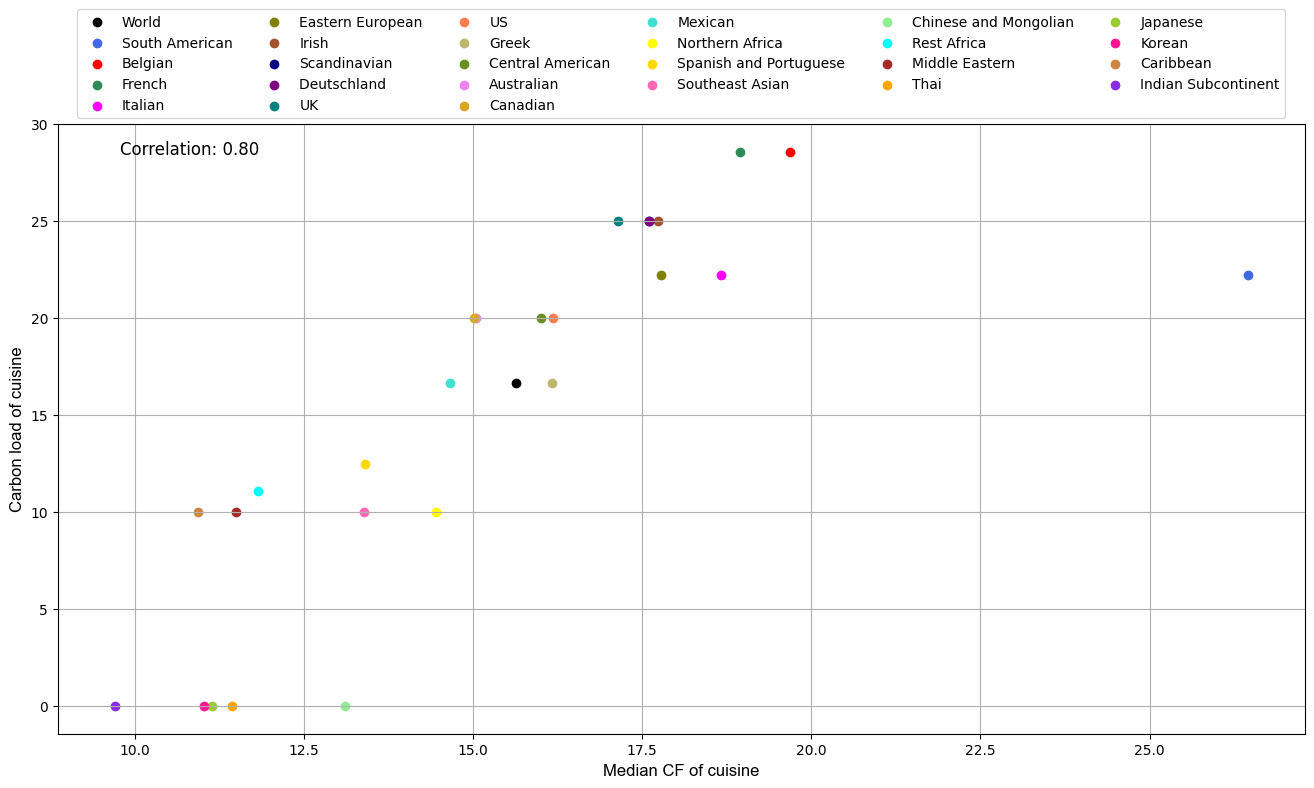

In [69]:
import matplotlib.pyplot as plt
import numpy as np

# List of colors for each region
colors = ['black', 'royalblue', 'red', 'seagreen', 'magenta', 'olive', 'sienna', 'navy', 'purple', 'teal', 'coral',
          'darkkhaki', 'olivedrab', 'violet', 'goldenrod', 'turquoise', 'yellow', 'gold', 'hotpink', 'lightgreen',
          'aqua', 'brown', 'orange', 'yellowgreen', 'deeppink', 'peru', 'blueviolet']

plt.figure(figsize=(14, 8))

for idx, region in enumerate(corr_merge_recipe['Region'].unique()):
    region_data = corr_merge_recipe[corr_merge_recipe['Region'] == region]
    plt.scatter(region_data['Median_CF'], region_data['Median'],
                marker='o', color=colors[idx], label=region)

# Calculate correlation coefficient
correlation_coefficient = np.corrcoef(corr_merge_recipe['Median_CF'], corr_merge_recipe['Median'])[0, 1]

# Set plot labels and grid
plt.xlabel('Median CF of cuisine', fontsize=12, fontname="Arial")
plt.ylabel('Carbon load of cuisine', fontsize=12, fontname="Arial")
plt.grid(True)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.2), ncol=6, fontsize=10)

# Display correlation coefficient on the plot
plt.text(0.05, 0.95, f'Correlation: {correlation_coefficient:.2f}', transform=plt.gca().transAxes, fontsize=12)

plt.tight_layout()

plt.savefig("D:/IIITD/Mansi_Thesis_Research/Foodprint/Carbon_Footprint_July23/Plots/Ingredient_analysis/Correlation_plot_median_recipes_highcf.jpeg", bbox_inches='tight', dpi=300)
plt.show()


Correlation Plot

In [70]:
grouped_by_region = recipe.groupby('region')

# Initialize a dictionary to store the average recipe size for each region
average_recipe_size_by_region = {}

# Loop through each region and calculate the average recipe size
for region, data in grouped_by_region:
    recipe_sizes = []
    for ingredients in data['Available Ingredients']:
        s = len(ingredients.split(','))
        recipe_sizes.append(s)
    
    # Calculate the average recipe size for the region
    average_size = np.mean(recipe_sizes)
    
    # Store the average size in the dictionary
    average_recipe_size_by_region[region] = average_size

# Create a list of average recipe sizes for each cuisine
average_recipe_sizes = [(region, size) for region, size in average_recipe_size_by_region.items()]

# Sort the list alphabetically by cuisine name
average_recipe_sizes.sort(key=lambda x: x[0])

# Print the list of average recipe sizes
for region, size in average_recipe_sizes:
    print(f"{region}: {size}")


Australian: 6.013278151405415
Belgian: 6.305293005671078
Canadian: 6.130473905218956
Caribbean: 6.394553304549984
Central American: 6.298013245033113
Chinese and Mongolian: 7.319449166950017
Deutschland : 6.304671159656054
Eastern European: 6.51685393258427
French: 6.154791929382093
Greek: 7.01101268853244
Indian Subcontinent: 6.962962962962963
Irish: 5.7121151539384245
Italian: 6.589266287924574
Japanese: 6.470559371933268
Korean: 7.517964071856287
Mexican: 6.164096151174101
Middle Eastern: 6.542607802874743
Northern Africa: 8.251709136109385
Rest Africa: 6.773109243697479
Scandinavian: 6.009982174688057
South American: 6.925055928411633
Southeast Asian: 7.691077875193399
Spanish and Portuguese: 6.505990133897111
Thai: 8.075384615384616
UK: 5.903771428571429
US: 5.843011613936724


In [71]:
average_recipe_size_df = pd.DataFrame(list(average_recipe_size_by_region.items()), columns=['Region', 'Average Recipe Size'])

# Sort the DataFrame alphabetically by cuisine name
average_recipe_size_df = average_recipe_size_df.sort_values(by='Region')

average_recipe_size_df


Region  Average Recipe Size
0               Australian             6.013278
1                  Belgian             6.305293
2                 Canadian             6.130474
3                Caribbean             6.394553
4         Central American             6.298013
5    Chinese and Mongolian             7.319449
6             Deutschland              6.304671
7         Eastern European             6.516854
8                   French             6.154792
9                    Greek             7.011013
10     Indian Subcontinent             6.962963
11                   Irish             5.712115
12                 Italian             6.589266
13                Japanese             6.470559
14                  Korean             7.517964
15                 Mexican             6.164096
16          Middle Eastern             6.542608
17         Northern Africa             8.251709
18             Rest Africa             6.773109
19            Scandinavian             6.009982
20          South American             6.925056
21         Southeast Asian             7.691078
22  Spanish and Portuguese             6.505990
23                    Thai             8.075385
24                      UK             5.903771
25                      US             5.843012

In [72]:
med_cf = pd.read_csv('D:/IIITD/Mansi_Thesis_Research/Foodprint/Carbon_Footprint_July23/Data/RecipeCF/Region_Recipe_CF_stats.csv')

In [73]:
median_cf = med_cf[1:]
median_cf

Region                            Carbon_footprint_values  \
1           South American  [10.35, 24.99000000000001, 18.87, 9.22, 7.25, ...   
2                  Belgian  [24.48, 34.32, 19.3, 5.83, 27.83, 2.6899999999...   
3                   French  [13.05, 21.47, 31.630000000000003, 39.63000000...   
4                  Italian  [25.37, 25.62, 12.95, 13.4, 11.05, 10.47, 15.6...   
5         Eastern European  [1.98, 16.36, 22.12, 3.92, 6.1, 10.31, 6.60000...   
6                    Irish  [44.14000000000001, 47.23, 48.47, 12.32, 51.52...   
7             Scandinavian  [1.29, 6.13, 29.01, 16.48, 27.92, 17.95, 26.29...   
8             Deutschland   [25.0, 23.540000000000003, 26.870000000000005,...   
9                       UK  [11.27, 18.64, 11.27, 41.02, 11.86, 32.0100000...   
10                      US  [7.89, 29.44, 15.02, 6.0600000000000005, 2.320...   
11                   Greek  [2.27, 19.59, 20.1, 11.46, 13.3, 15.87, 16.64,...   
12        Central American  [0.32, 13.36, 3.04, 5.239999999999999, 4.6, 15...   
13              Australian  [10.67, 11.69, 18.58, 14.54, 17.85, 39.04, 19....   
14                Canadian  [22.77, 2.83, 1.61, 18.07, 22.06, 14.08, 13.61...   
15                 Mexican  [12.88, 9.75, 16.880000000000003, 23.03, 34.92...   
16         Northern Africa  [24.23, 13.260000000000002, 35.629999999999995...   
17  Spanish and Portuguese  [3.33, 22.57, 3.85, 35.04, 11.0, 9.11, 25.78, ...   
18         Southeast Asian  [52.97, 2.53, 28.58, 37.27, 24.2, 12.669999999...   
19   Chinese and Mongolian  [11.800000000000002, 13.720000000000002, 23.64...   
20             Rest Africa  [25.04, 42.66, 12.1, 5.02, 9.11, 14.2, 8.82, 9...   
21          Middle Eastern  [5.5600000000000005, 6.86, 32.06, 15.59, 2.27,...   
22                    Thai  [26.32, 14.430000000000003, 16.23, 8.120000000...   
23                Japanese  [14.86, 29.19, 8.969999999999999, 4.63, 7.37, ...   
24                  Korean  [38.15, 6.590000000000001, 24.32, 29.65, 4.779...   
25               Caribbean  [13.61, 7.42, 1.27, 7.37, 10.330000000000002, ...   
26     Indian Subcontinent  [8.17, 4.79, 9.730000000000002, 33.36, 29.95, ...   

    Count  Average_CF  Median_CF  
1    7152   28.045130     26.460  
2    1058   20.407287     19.690  
3    6344   20.204590     18.940  
4   16546   20.917505     18.665  
5    2492   19.434262     17.775  
6    2501   19.170036     17.740  
7    2805   18.872378     17.600  
8    4303   18.805861     17.600  
9    4375   18.540622     17.140  
10   4994   17.843202     16.180  
11   4177   18.961726     16.170  
12    453   17.476645     16.000  
13   5799   16.661005     15.050  
14   6668   16.539555     15.010  
15  14394   16.796636     14.660  
16   1609   17.068135     14.450  
17   2838   16.280187     13.395  
18   1939   16.102573     13.390  
19   5882   15.366435     13.100  
20   2737   14.718977     11.820  
21   3896   14.504068     11.490  
22   2600   13.779923     11.435  
23   2038   13.514858     11.140  
24    668   14.986811     11.025  
25   3011   13.669472     10.940  
26   6453   12.002696      9.700

In [74]:
corr_cui = pd.merge(average_recipe_size_df, median_cf, on='Region')
corr_cui

Region  Average Recipe Size  \
0               Australian             6.013278   
1                  Belgian             6.305293   
2                 Canadian             6.130474   
3                Caribbean             6.394553   
4         Central American             6.298013   
5    Chinese and Mongolian             7.319449   
6             Deutschland              6.304671   
7         Eastern European             6.516854   
8                   French             6.154792   
9                    Greek             7.011013   
10     Indian Subcontinent             6.962963   
11                   Irish             5.712115   
12                 Italian             6.589266   
13                Japanese             6.470559   
14                  Korean             7.517964   
15                 Mexican             6.164096   
16          Middle Eastern             6.542608   
17         Northern Africa             8.251709   
18             Rest Africa             6.773109   
19            Scandinavian             6.009982   
20          South American             6.925056   
21         Southeast Asian             7.691078   
22  Spanish and Portuguese             6.505990   
23                    Thai             8.075385   
24                      UK             5.903771   
25                      US             5.843012   

                              Carbon_footprint_values  Count  Average_CF  \
0   [10.67, 11.69, 18.58, 14.54, 17.85, 39.04, 19....   5799   16.661005   
1   [24.48, 34.32, 19.3, 5.83, 27.83, 2.6899999999...   1058   20.407287   
2   [22.77, 2.83, 1.61, 18.07, 22.06, 14.08, 13.61...   6668   16.539555   
3   [13.61, 7.42, 1.27, 7.37, 10.330000000000002, ...   3011   13.669472   
4   [0.32, 13.36, 3.04, 5.239999999999999, 4.6, 15...    453   17.476645   
5   [11.800000000000002, 13.720000000000002, 23.64...   5882   15.366435   
6   [25.0, 23.540000000000003, 26.870000000000005,...   4303   18.805861   
7   [1.98, 16.36, 22.12, 3.92, 6.1, 10.31, 6.60000...   2492   19.434262   
8   [13.05, 21.47, 31.630000000000003, 39.63000000...   6344   20.204590   
9   [2.27, 19.59, 20.1, 11.46, 13.3, 15.87, 16.64,...   4177   18.961726   
10  [8.17, 4.79, 9.730000000000002, 33.36, 29.95, ...   6453   12.002696   
11  [44.14000000000001, 47.23, 48.47, 12.32, 51.52...   2501   19.170036   
12  [25.37, 25.62, 12.95, 13.4, 11.05, 10.47, 15.6...  16546   20.917505   
13  [14.86, 29.19, 8.969999999999999, 4.63, 7.37, ...   2038   13.514858   
14  [38.15, 6.590000000000001, 24.32, 29.65, 4.779...    668   14.986811   
15  [12.88, 9.75, 16.880000000000003, 23.03, 34.92...  14394   16.796636   
16  [5.5600000000000005, 6.86, 32.06, 15.59, 2.27,...   3896   14.504068   
17  [24.23, 13.260000000000002, 35.629999999999995...   1609   17.068135   
18  [25.04, 42.66, 12.1, 5.02, 9.11, 14.2, 8.82, 9...   2737   14.718977   
19  [1.29, 6.13, 29.01, 16.48, 27.92, 17.95, 26.29...   2805   18.872378   
20  [10.35, 24.99000000000001, 18.87, 9.22, 7.25, ...   7152   28.045130   
21  [52.97, 2.53, 28.58, 37.27, 24.2, 12.669999999...   1939   16.102573   
22  [3.33, 22.57, 3.85, 35.04, 11.0, 9.11, 25.78, ...   2838   16.280187   
23  [26.32, 14.430000000000003, 16.23, 8.120000000...   2600   13.779923   
24  [11.27, 18.64, 11.27, 41.02, 11.86, 32.0100000...   4375   18.540622   
25  [7.89, 29.44, 15.02, 6.0600000000000005, 2.320...   4994   17.843202   

    Median_CF  
0      15.050  
1      19.690  
2      15.010  
3      10.940  
4      16.000  
5      13.100  
6      17.600  
7      17.775  
8      18.940  
9      16.170  
10      9.700  
11     17.740  
12     18.665  
13     11.140  
14     11.025  
15     14.660  
16     11.490  
17     14.450  
18     11.820  
19     17.600  
20     26.460  
21     13.390  
22     13.395  
23     11.435  
24     17.140  
25     16.180

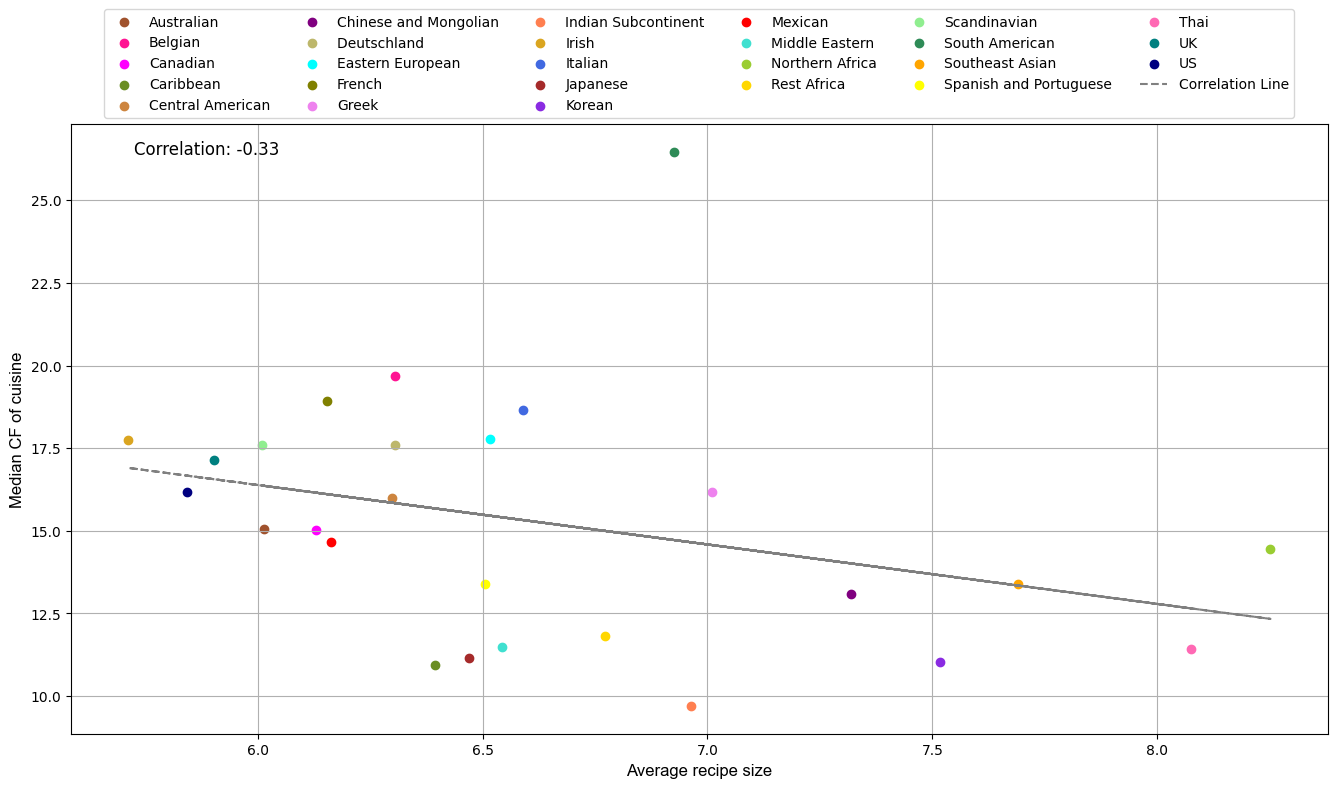

In [75]:
import matplotlib.pyplot as plt
import numpy as np

# alphabetically sorted
colors = ['sienna', 'deeppink', 'magenta', 'olivedrab', 'peru', 'purple', 'darkkhaki', 'aqua', 'olive', 'violet', 
           'coral', 'goldenrod', 'royalblue', 'brown',  'blueviolet', 'red', 'turquoise', 'yellowgreen',   
          'gold', 'lightgreen',  'seagreen',  'orange', 'yellow',  'hotpink', 'teal', 'navy']

plt.figure(figsize=(14, 8))

for idx, region in enumerate(corr_cui['Region'].unique()):
    region_data = corr_cui[corr_cui['Region'] == region]
    plt.scatter(region_data['Average Recipe Size'], region_data['Median_CF'],
                marker='o', color=colors[idx], label=region)

# Calculate correlation coefficient
correlation_coefficient = np.corrcoef(corr_cui['Average Recipe Size'], corr_cui['Median_CF'])[0, 1]

# Calculate the regression line
regression_line = np.polyfit(corr_cui['Average Recipe Size'], corr_cui['Median_CF'], 1)

# Plot the regression line
plt.plot(corr_cui['Average Recipe Size'], np.polyval(regression_line, corr_cui['Average Recipe Size']),
         color='grey', linestyle='--', label='Correlation Line')

# Set plot labels and grid
plt.xlabel('Average recipe size', fontsize=12, fontname="Arial")
plt.ylabel('Median CF of cuisine', fontsize=12, fontname="Arial")

plt.grid(True)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.2), ncol=6, fontsize=10)

# Display correlation coefficient on the plot
plt.text(0.05, 0.95, f'Correlation: {correlation_coefficient:.2f}', transform=plt.gca().transAxes, fontsize=12)

plt.tight_layout()

plt.savefig("D:/IIITD/Mansi_Thesis_Research/Foodprint/Carbon_Footprint_July23/Plots/Ingredient_analysis/Correlation_plot_avgsize_mediancf.jpeg", bbox_inches='tight', dpi=300)
plt.show()
